In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram,linkage
from warnings import filterwarnings
filterwarnings('ignore')

# Problem 1

## Basic Analysis
**Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.**

In [70]:
ads=pd.read_excel('Clustering Clean Ads_Data-2.xlsx')

In [808]:
ads.head().T

0            1            2            3  \
Timestamp              2020-9-2-17  2020-9-2-10  2020-9-1-22  2020-9-3-20   
InventoryType              Format1      Format1      Format1      Format1   
Ad - Length                    300          300          300          300   
Ad- Width                      250          250          250          250   
Ad Size                      75000        75000        75000        75000   
Ad Type                   Inter222     Inter227     Inter222     Inter228   
Platform                     Video          App        Video        Video   
Device Type                Desktop       Mobile      Desktop       Mobile   
Format                     Display        Video      Display        Video   
Available_Impressions         1806         1780         2727         2430   
Matched_Queries                325          285          356          497   
Impressions                    323          285          355          495   
Clicks                           1            1            1            1   
Spend                          0.0          0.0          0.0          0.0   
Fee                           0.35         0.35         0.35         0.35   
Revenue                        0.0          0.0          0.0          0.0   
CTR                           0.31         0.35         0.28          0.2   
CPM                            0.0          0.0          0.0          0.0   
CPC                            0.0          0.0          0.0          0.0   

                                 4  
Timestamp              2020-9-4-15  
InventoryType              Format1  
Ad - Length                    300  
Ad- Width                      250  
Ad Size                      75000  
Ad Type                   Inter217  
Platform                       Web  
Device Type                Desktop  
Format                       Video  
Available_Impressions         1218  
Matched_Queries                242  
Impressions                    242  
Clicks                           1  
Spend                          0.0  
Fee                           0.35  
Revenue                        0.0  
CTR                           0.41  
CPM                            0.0  
CPC                            0.0

In [72]:
ads.shape

(23066, 19)

In [73]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

Observations:
- Timestamp field has an object datatype. It needs to be converted to datetime
- Null values present in CTR,CPC,CPM, which need to be treated

In [74]:
ads.describe().T.round(2)

count        mean         std       min       25%  \
Ad - Length            23066.0      385.16      233.65    120.00    120.00   
Ad- Width              23066.0      337.90      203.09     70.00    250.00   
Ad Size                23066.0    96674.47    61538.33  33600.00  72000.00   
Available_Impressions  23066.0  2432043.67  4742887.76      1.00  33672.25   
Matched_Queries        23066.0  1295099.14  2512969.86      1.00  18282.50   
Impressions            23066.0  1241519.52  2429399.96      1.00   7990.50   
Clicks                 23066.0    10678.52    17353.41      1.00    710.00   
Spend                  23066.0     2706.63     4067.93      0.00     85.18   
Fee                    23066.0        0.34        0.03      0.21      0.33   
Revenue                23066.0     1924.25     3105.24      0.00     55.37   
CTR                    18330.0        0.07        0.08      0.00      0.00   
CPM                    18330.0        7.67        6.48      0.00      1.71   
CPC                    18330.0        0.35        0.34      0.00      0.09   

                             50%         75%          max  
Ad - Length               300.00      720.00       728.00  
Ad- Width                 300.00      600.00       600.00  
Ad Size                 72000.00    84000.00    216000.00  
Available_Impressions  483771.00  2527711.75  27592861.00  
Matched_Queries        258087.50  1180700.00  14702025.00  
Impressions            225290.00  1112428.50  14194774.00  
Clicks                   4425.00    12793.75    143049.00  
Spend                    1425.12     3121.40     26931.87  
Fee                         0.35        0.35         0.35  
Revenue                   926.34     2091.34     21276.18  
CTR                         0.08        0.13         1.00  
CPM                         7.66       12.51        81.56  
CPC                         0.16        0.57         7.26

Observations:
- High differences in standard deviations of various columns. Scaling needs to be done
- Spend field has a minimum value of 0. Does this mean that the amount spent for the ad is 0? Is that possible?
- Probable outliers in Impressions, matched queries, Available_Impressions and Clicks field on the lower end and higher end 
- Outliers probable in ad size, revenue on the upper end

In [75]:
ads.duplicated().value_counts()

False    23066
dtype: int64

Observations:
- No duplicates present

In [176]:
for i in ads.columns:
    print(ads[i].value_counts())

2020-11-13-22    13
2020-11-20-9     13
2020-11-14-23    13
2020-10-18-1     13
2020-9-23-15     13
                 ..
2020-9-2-5       10
2020-9-4-19      10
2020-9-2-11      10
2020-9-3-11       9
2020-9-1-16       2
Name: Timestamp, Length: 2018, dtype: int64
Format4    7165
Format5    4249
Format1    3814
Format3    3540
Format6    1850
Format2    1789
Format7     659
Name: InventoryType, dtype: int64
120    7165
300    4473
720    4249
480    3540
336    1850
728    1789
Name: Ad - Length, dtype: int64
600    7824
250    5664
300    4249
70     3540
90     1789
Name: Ad- Width, dtype: int64
72000     7165
216000    4249
75000     3814
33600     3540
84000     1850
65520     1789
180000     659
Name: Ad Size, dtype: int64
Inter224    1658
Inter217    1655
Inter223    1654
Inter219    1650
Inter221    1650
Inter222    1649
Inter229    1648
Inter227    1647
Inter218    1645
inter230    1644
Inter220    1644
Inter225    1643
Inter226    1640
Inter228    1639
Name: Ad Type, dtype: int

## Data Cleanup

### Missing Value treatment
**Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.**

In [77]:
def ctr(x):
    clicks=ads.Clicks
    imp=ads.Impressions
    res=(clicks/imp)*100
    res=res.round(2)
    return res
def cpm(x):
    spend=ads.Spend
    imp=ads.Impressions
    ans=(spend/imp)*1000
    ans=ans.round(2)
    return ans
def cpc(x):
    spend=ads.Spend
    clicks=ads.Clicks
    val=spend/clicks
    val=val.round(2)
    return val

ads['CTR']=ads[['CTR']].apply(lambda x:ctr(x))
ads['CPM']=ads[['CPM']].apply(lambda x:cpm(x))
ads['CPC']=ads[['CPC']].apply(lambda x:cpc(x))

In [78]:
ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23066 entries, 0 to 23065
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              23066 non-null  object 
 1   InventoryType          23066 non-null  object 
 2   Ad - Length            23066 non-null  int64  
 3   Ad- Width              23066 non-null  int64  
 4   Ad Size                23066 non-null  int64  
 5   Ad Type                23066 non-null  object 
 6   Platform               23066 non-null  object 
 7   Device Type            23066 non-null  object 
 8   Format                 23066 non-null  object 
 9   Available_Impressions  23066 non-null  int64  
 10  Matched_Queries        23066 non-null  int64  
 11  Impressions            23066 non-null  int64  
 12  Clicks                 23066 non-null  int64  
 13  Spend                  23066 non-null  float64
 14  Fee                    23066 non-null  float64
 15  Re

### Outlier treatment
**Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst)**

In [92]:
#categorizing columns into num and categorical
cat=ads.select_dtypes('object')
ads_cat=pd.DataFrame(cat)
num=ads.select_dtypes(['int64','float64'])
ads_num=pd.DataFrame(num)

In [93]:
ads_num

Ad - Length  Ad- Width  Ad Size  Available_Impressions  \
0              300        250    75000                   1806   
1              300        250    75000                   1780   
2              300        250    75000                   2727   
3              300        250    75000                   2430   
4              300        250    75000                   1218   
...            ...        ...      ...                    ...   
23061          720        300   216000                      1   
23062          720        300   216000                      3   
23063          720        300   216000                      2   
23064          120        600    72000                      7   
23065          720        300   216000                      2   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue     CTR  \
0                  325          323       1   0.00  0.35   0.0000    0.31   
1                  285          285       1   0.00  0.35   0.0000    0.35   
2                  356          355       1   0.00  0.35   0.0000    0.28   
3                  497          495       1   0.00  0.35   0.0000    0.20   
4                  242          242       1   0.00  0.35   0.0000    0.41   
...                ...          ...     ...    ...   ...      ...     ...   
23061                1            1       1   0.07  0.35   0.0455  100.00   
23062                2            2       1   0.04  0.35   0.0260   50.00   
23063                1            1       1   0.05  0.35   0.0325  100.00   
23064                1            1       1   0.07  0.35   0.0455  100.00   
23065                2            2       1   0.09  0.35   0.0585   50.00   

        CPM   CPC  
0       0.0  0.00  
1       0.0  0.00  
2       0.0  0.00  
3       0.0  0.00  
4       0.0  0.00  
...     ...   ...  
23061  70.0  0.07  
23062  20.0  0.04  
23063  50.0  0.05  
23064  70.0  0.07  
23065  45.0  0.09  

[23066 rows x 13 columns]

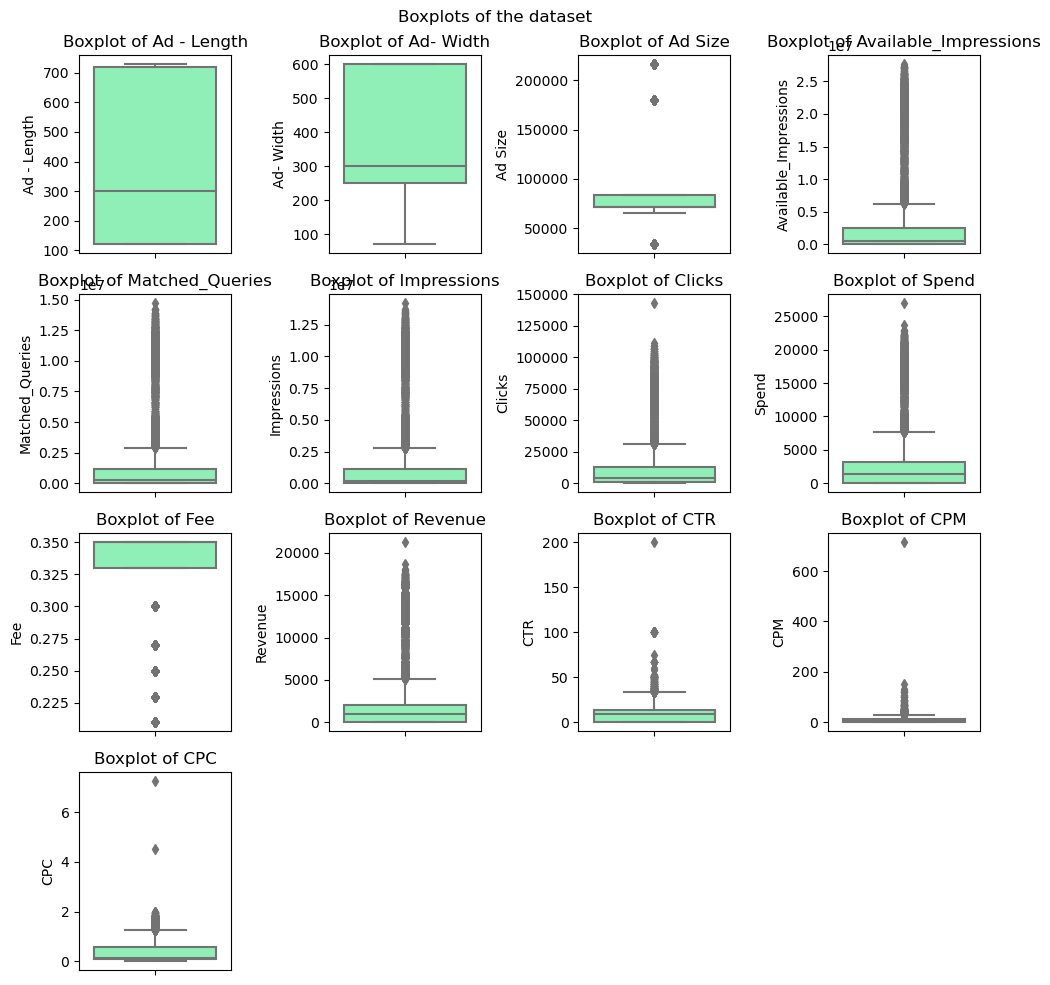

In [116]:
j=1
plt.figure(figsize=(10,10))
for i in ads_num.columns:
    plt.subplot(4,4,j)
    j=j+1
    sns.boxplot(y=ads_num[i],palette='rainbow')
    plt.title('Boxplot of {}'.format(i))
    plt.suptitle('Boxplots of the dataset')
    plt.tight_layout()

Observations:
- From the boxplots above, it can be seen that the fields Ad-Length and AD-Width do not have any outliers
- The columns Ad Size and Fee have a few outliers
- All other column have significant outliers
- Since the kmeans technique creates clusters based on distance, it is extremely outlier sensitive. Hence, the treatment of outliers is necessary
- Outlier treatment can be done on a given field by limiting the lower limit and upper limit as a function of the inter - quartile range and the first and the third quartiles of the data using the formula:
    - Lower limit= Q1-(1.5 * IQR)
    - Upper Limit= Q3+(1.5 * IQR)

In [119]:
Q1 = ads_num.quantile(0.25)
Q3 = ads_num.quantile(0.75)
IQR = Q3 - Q1
#The count of outliers in each column
((ads_num < (Q1 - 1.5 * IQR)) | (ads_num > (Q3 + 1.5 * IQR))).sum()

Ad - Length                 0
Ad- Width                   0
Ad Size                  8448
Available_Impressions    2378
Matched_Queries          3192
Impressions              3269
Clicks                   1691
Spend                    2081
Fee                      3517
Revenue                  2325
CTR                       275
CPM                       208
CPC                       569
dtype: int64

In [118]:
outlier_cols=[ 'Ad Size', 'Available_Impressions',
       'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue',
       'CTR', 'CPM', 'CPC']

In [126]:
def outlier_treatment(x):
    Q1=np.percentile(x,25)
    Q3=np.percentile(x,75)
  
    IQR=Q3-Q1
    ll=Q1-(1.5*IQR)
    ul=Q3+(1.5*IQR)
    
    return x.apply(lambda y:ll if y<ll else y).apply(lambda y:ul if y>ul else y)

In [127]:
for i in ads_num[outlier_cols]:
    ads_num[i]=outlier_treatment(ads_num[i])

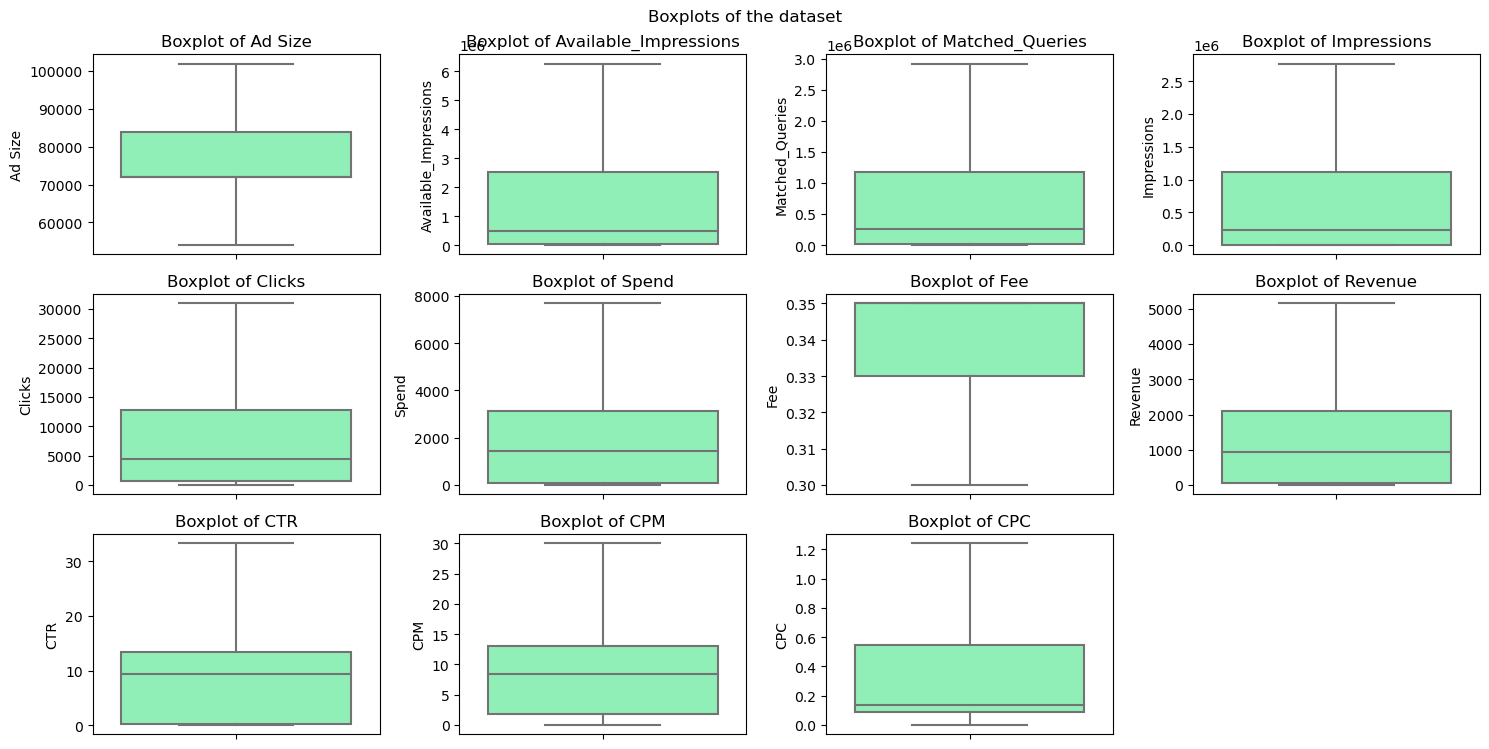

In [809]:
j=1
plt.figure(figsize=(15,10))
for i in ads_num[outlier_cols]:
    plt.subplot(4,4,j)
    j=j+1
    sns.boxplot(y=ads_num[i],palette='rainbow')
    plt.title('Boxplot of {}'.format(i))
    plt.suptitle('Boxplots of the dataset')
    plt.tight_layout()

## EDA

## Scaling

**Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.**

In [190]:
ads_num_scaled=pd.DataFrame(ads_num.apply(zscore))
ads_num_scaled

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0        -0.364496  -0.432797 -0.102518              -0.755333   
1        -0.364496  -0.432797 -0.102518              -0.755345   
2        -0.364496  -0.432797 -0.102518              -0.754900   
3        -0.364496  -0.432797 -0.102518              -0.755040   
4        -0.364496  -0.432797 -0.102518              -0.755610   
...            ...        ...       ...                    ...   
23061     1.433093  -0.186599  1.652896              -0.756182   
23062     1.433093  -0.186599  1.652896              -0.756181   
23063     1.433093  -0.186599  1.652896              -0.756182   
23064    -1.134891   1.290590 -0.297564              -0.756179   
23065     1.433093  -0.186599  1.652896              -0.756182   

       Matched_Queries  Impressions    Clicks     Spend       Fee   Revenue  \
0            -0.778949    -0.768478 -0.867488 -0.893170  0.535724 -0.880093   
1            -0.778988    -0.768516 -0.867488 -0.893170  0.535724 -0.880093   
2            -0.778919    -0.768445 -0.867488 -0.893170  0.535724 -0.880093   
3            -0.778781    -0.768302 -0.867488 -0.893170  0.535724 -0.880093   
4            -0.779030    -0.768560 -0.867488 -0.893170  0.535724 -0.880093   
...                ...          ...       ...       ...       ...       ...   
23061        -0.779265    -0.768806 -0.867488 -0.893141  0.535724 -0.880066   
23062        -0.779264    -0.768805 -0.867488 -0.893154  0.535724 -0.880078   
23063        -0.779265    -0.768806 -0.867488 -0.893150  0.535724 -0.880074   
23064        -0.779265    -0.768806 -0.867488 -0.893141  0.535724 -0.880066   
23065        -0.779264    -0.768805 -0.867488 -0.893133  0.535724 -0.880058   

            CTR       CPM       CPC  
0     -0.958813 -1.194521 -1.041011  
1     -0.953966 -1.194521 -1.041011  
2     -0.962448 -1.194521 -1.041011  
3     -0.972141 -1.194521 -1.041011  
4     -0.946696 -1.194521 -1.041011  
...         ...       ...       ...  
23061  3.034874  3.161879 -0.820343  
23062  3.034874  1.712168 -0.914915  
23063  3.034874  3.161879 -0.883391  
23064  3.034874  3.161879 -0.820343  
23065  3.034874  3.161879 -0.757295  

[23066 rows x 13 columns]

In [132]:
ads_num.describe().T.round(2)

count        mean         std       min       25%  \
Ad - Length            23066.0      385.16      233.65    120.00    120.00   
Ad- Width              23066.0      337.90      203.09     70.00    250.00   
Ad Size                23066.0    76576.84    15381.32  54000.00  72000.00   
Available_Impressions  23066.0  1607252.77  2125527.93      1.00  33672.25   
Matched_Queries        23066.0   799538.04  1026036.79      1.00  18282.50   
Impressions            23066.0   753611.99   980256.81      1.00   7990.50   
Clicks                 23066.0     8306.83     9574.78      1.00    710.00   
Spend                  23066.0     2166.06     2425.19      0.00     85.18   
Fee                    23066.0        0.34        0.02      0.30      0.33   
Revenue                23066.0     1449.39     1646.89      0.00     55.37   
CTR                    23066.0        8.22        8.25      0.01      0.27   
CPM                    23066.0        8.22        6.88      0.00      1.75   
CPC                    23066.0        0.33        0.32      0.00      0.09   

                             50%         75%         max  
Ad - Length               300.00      720.00      728.00  
Ad- Width                 300.00      600.00      600.00  
Ad Size                 72000.00    84000.00   102000.00  
Available_Impressions  483771.00  2527711.75  6268771.00  
Matched_Queries        258087.50  1180700.00  2924326.25  
Impressions            225290.00  1112428.50  2769085.50  
Clicks                   4425.00    12793.75    30919.38  
Spend                    1425.12     3121.40     7675.73  
Fee                         0.35        0.35        0.35  
Revenue                   926.34     2091.34     5145.30  
CTR                         9.39       13.47       33.27  
CPM                         8.37       13.04       29.98  
CPC                         0.14        0.55        1.24

In [133]:
ads_num_scaled.describe().T.round(2)

count  mean  std   min   25%   50%   75%   max
Ad - Length            23066.0  -0.0  1.0 -1.13 -1.13 -0.36  1.43  1.47
Ad- Width              23066.0   0.0  1.0 -1.32 -0.43 -0.19  1.29  1.29
Ad Size                23066.0  -0.0  1.0 -1.47 -0.30 -0.30  0.48  1.65
Available_Impressions  23066.0  -0.0  1.0 -0.76 -0.74 -0.53  0.43  2.19
Matched_Queries        23066.0   0.0  1.0 -0.78 -0.76 -0.53  0.37  2.07
Impressions            23066.0  -0.0  1.0 -0.77 -0.76 -0.54  0.37  2.06
Clicks                 23066.0   0.0  1.0 -0.87 -0.79 -0.41  0.47  2.36
Spend                  23066.0   0.0  1.0 -0.89 -0.86 -0.31  0.39  2.27
Fee                    23066.0  -0.0  1.0 -2.22 -0.57  0.54  0.54  0.54
Revenue                23066.0   0.0  1.0 -0.88 -0.85 -0.32  0.39  2.24
CTR                    23066.0   0.0  1.0 -1.00 -0.96  0.14  0.64  3.03
CPM                    23066.0   0.0  1.0 -1.19 -0.94  0.02  0.70  3.16
CPC                    23066.0   0.0  1.0 -1.04 -0.76 -0.60  0.69  2.87

Observations:
- After scaling, data has now been centered around 0, with standard deviation 1 for all the columns
- This will ensure that each of the columns carry the same weightage while performing clustering with a distance based algorithm, and ensures that the variables with a higher value do not dominate those with lower values
- In addition, scaling aids the rapid convergence of clusters, thereby improving the speed and efficiency of the algorithm

## Clustering

### Hierarchical Clustering

**Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.**

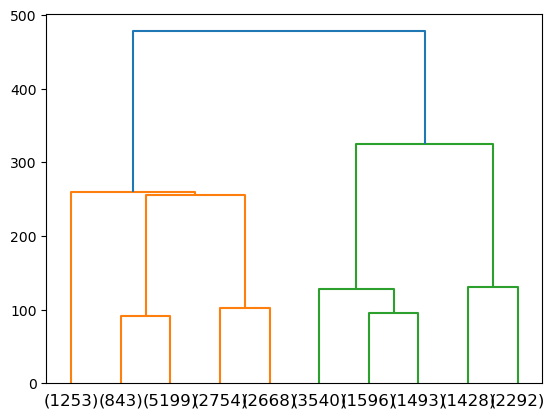

In [217]:
wardlink= linkage(ads_num_scaled,method='ward',metric='euclidean')
dend=dendrogram(wardlink,truncate_mode='lastp',p=10)


In [219]:
from scipy.cluster.hierarchy import fcluster

In [220]:
cluster=fcluster(wardlink,t=5,criterion='maxclust')
cluster

array([4, 4, 4, ..., 3, 2, 3], dtype=int32)

In [221]:
ads_hc=ads.copy()

In [222]:
ads_hc['hcluster']=cluster

In [223]:
ads_hc.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  Matched_Queries  \
0    Video     Desktop  Display                   1806              325   
1      App      Mobile    Video                   1780              285   
2    Video     Desktop  Display                   2727              356   
3    Video      Mobile    Video                   2430              497   
4      Web     Desktop    Video                   1218              242   

   Impressions  Clicks  Spend   Fee  Revenue   CTR  CPM  CPC  hcluster  
0          323       1    0.0  0.35      0.0  0.31  0.0  0.0         4  
1          285       1    0.0  0.35      0.0  0.35  0.0  0.0         4  
2          355       1    0.0  0.35      0.0  0.28  0.0  0.0         4  
3          495       1    0.0  0.35      0.0  0.20  0.0  0.0         4  
4          242       1    0.0  0.35      0.0  0.41  0.0  0.0         4

In [224]:
ads_hc.hcluster.value_counts().sort_index()

1    1253
2    6042
3    5422
4    6629
5    3720
Name: hcluster, dtype: int64

In [228]:
ads_hc.groupby('hcluster').Revenue.mean()

hcluster
1    5532.487799
2     253.184111
3     727.372455
4    1060.818592
5    6706.150202
Name: Revenue, dtype: float64

In [229]:
ads_hc.groupby('hcluster').Spend.mean()

hcluster
1    7645.819425
2     384.112655
3    1116.345603
4    1621.835126
5    9066.138933
Name: Spend, dtype: float64

In [230]:
ads_hc.groupby('hcluster').Clicks.mean()

hcluster
1    71556.263368
2     3501.669811
3    12799.152158
4     3326.810228
5    11839.569892
Name: Clicks, dtype: float64

In [811]:
num

Ad - Length  Ad- Width   Ad Size  Available_Impressions  \
0              300        250   75000.0                 1806.0   
1              300        250   75000.0                 1780.0   
2              300        250   75000.0                 2727.0   
3              300        250   75000.0                 2430.0   
4              300        250   75000.0                 1218.0   
...            ...        ...       ...                    ...   
23061          720        300  102000.0                    1.0   
23062          720        300  102000.0                    3.0   
23063          720        300  102000.0                    2.0   
23064          120        600   72000.0                    7.0   
23065          720        300  102000.0                    2.0   

       Matched_Queries  Impressions  Clicks  Spend   Fee  Revenue    CTR  \
0                325.0        323.0     1.0   0.00  0.35   0.0000   0.31   
1                285.0        285.0     1.0   0.00  0.35   0.0000   0.35   
2                356.0        355.0     1.0   0.00  0.35   0.0000   0.28   
3                497.0        495.0     1.0   0.00  0.35   0.0000   0.20   
4                242.0        242.0     1.0   0.00  0.35   0.0000   0.41   
...                ...          ...     ...    ...   ...      ...    ...   
23061              1.0          1.0     1.0   0.07  0.35   0.0455  33.27   
23062              2.0          2.0     1.0   0.04  0.35   0.0260  33.27   
23063              1.0          1.0     1.0   0.05  0.35   0.0325  33.27   
23064              1.0          1.0     1.0   0.07  0.35   0.0455  33.27   
23065              2.0          2.0     1.0   0.09  0.35   0.0585  33.27   

          CPM   CPC  
0       0.000  0.00  
1       0.000  0.00  
2       0.000  0.00  
3       0.000  0.00  
4       0.000  0.00  
...       ...   ...  
23061  29.975  0.07  
23062  20.000  0.04  
23063  29.975  0.05  
23064  29.975  0.07  
23065  29.975  0.09  

[23066 rows x 13 columns]

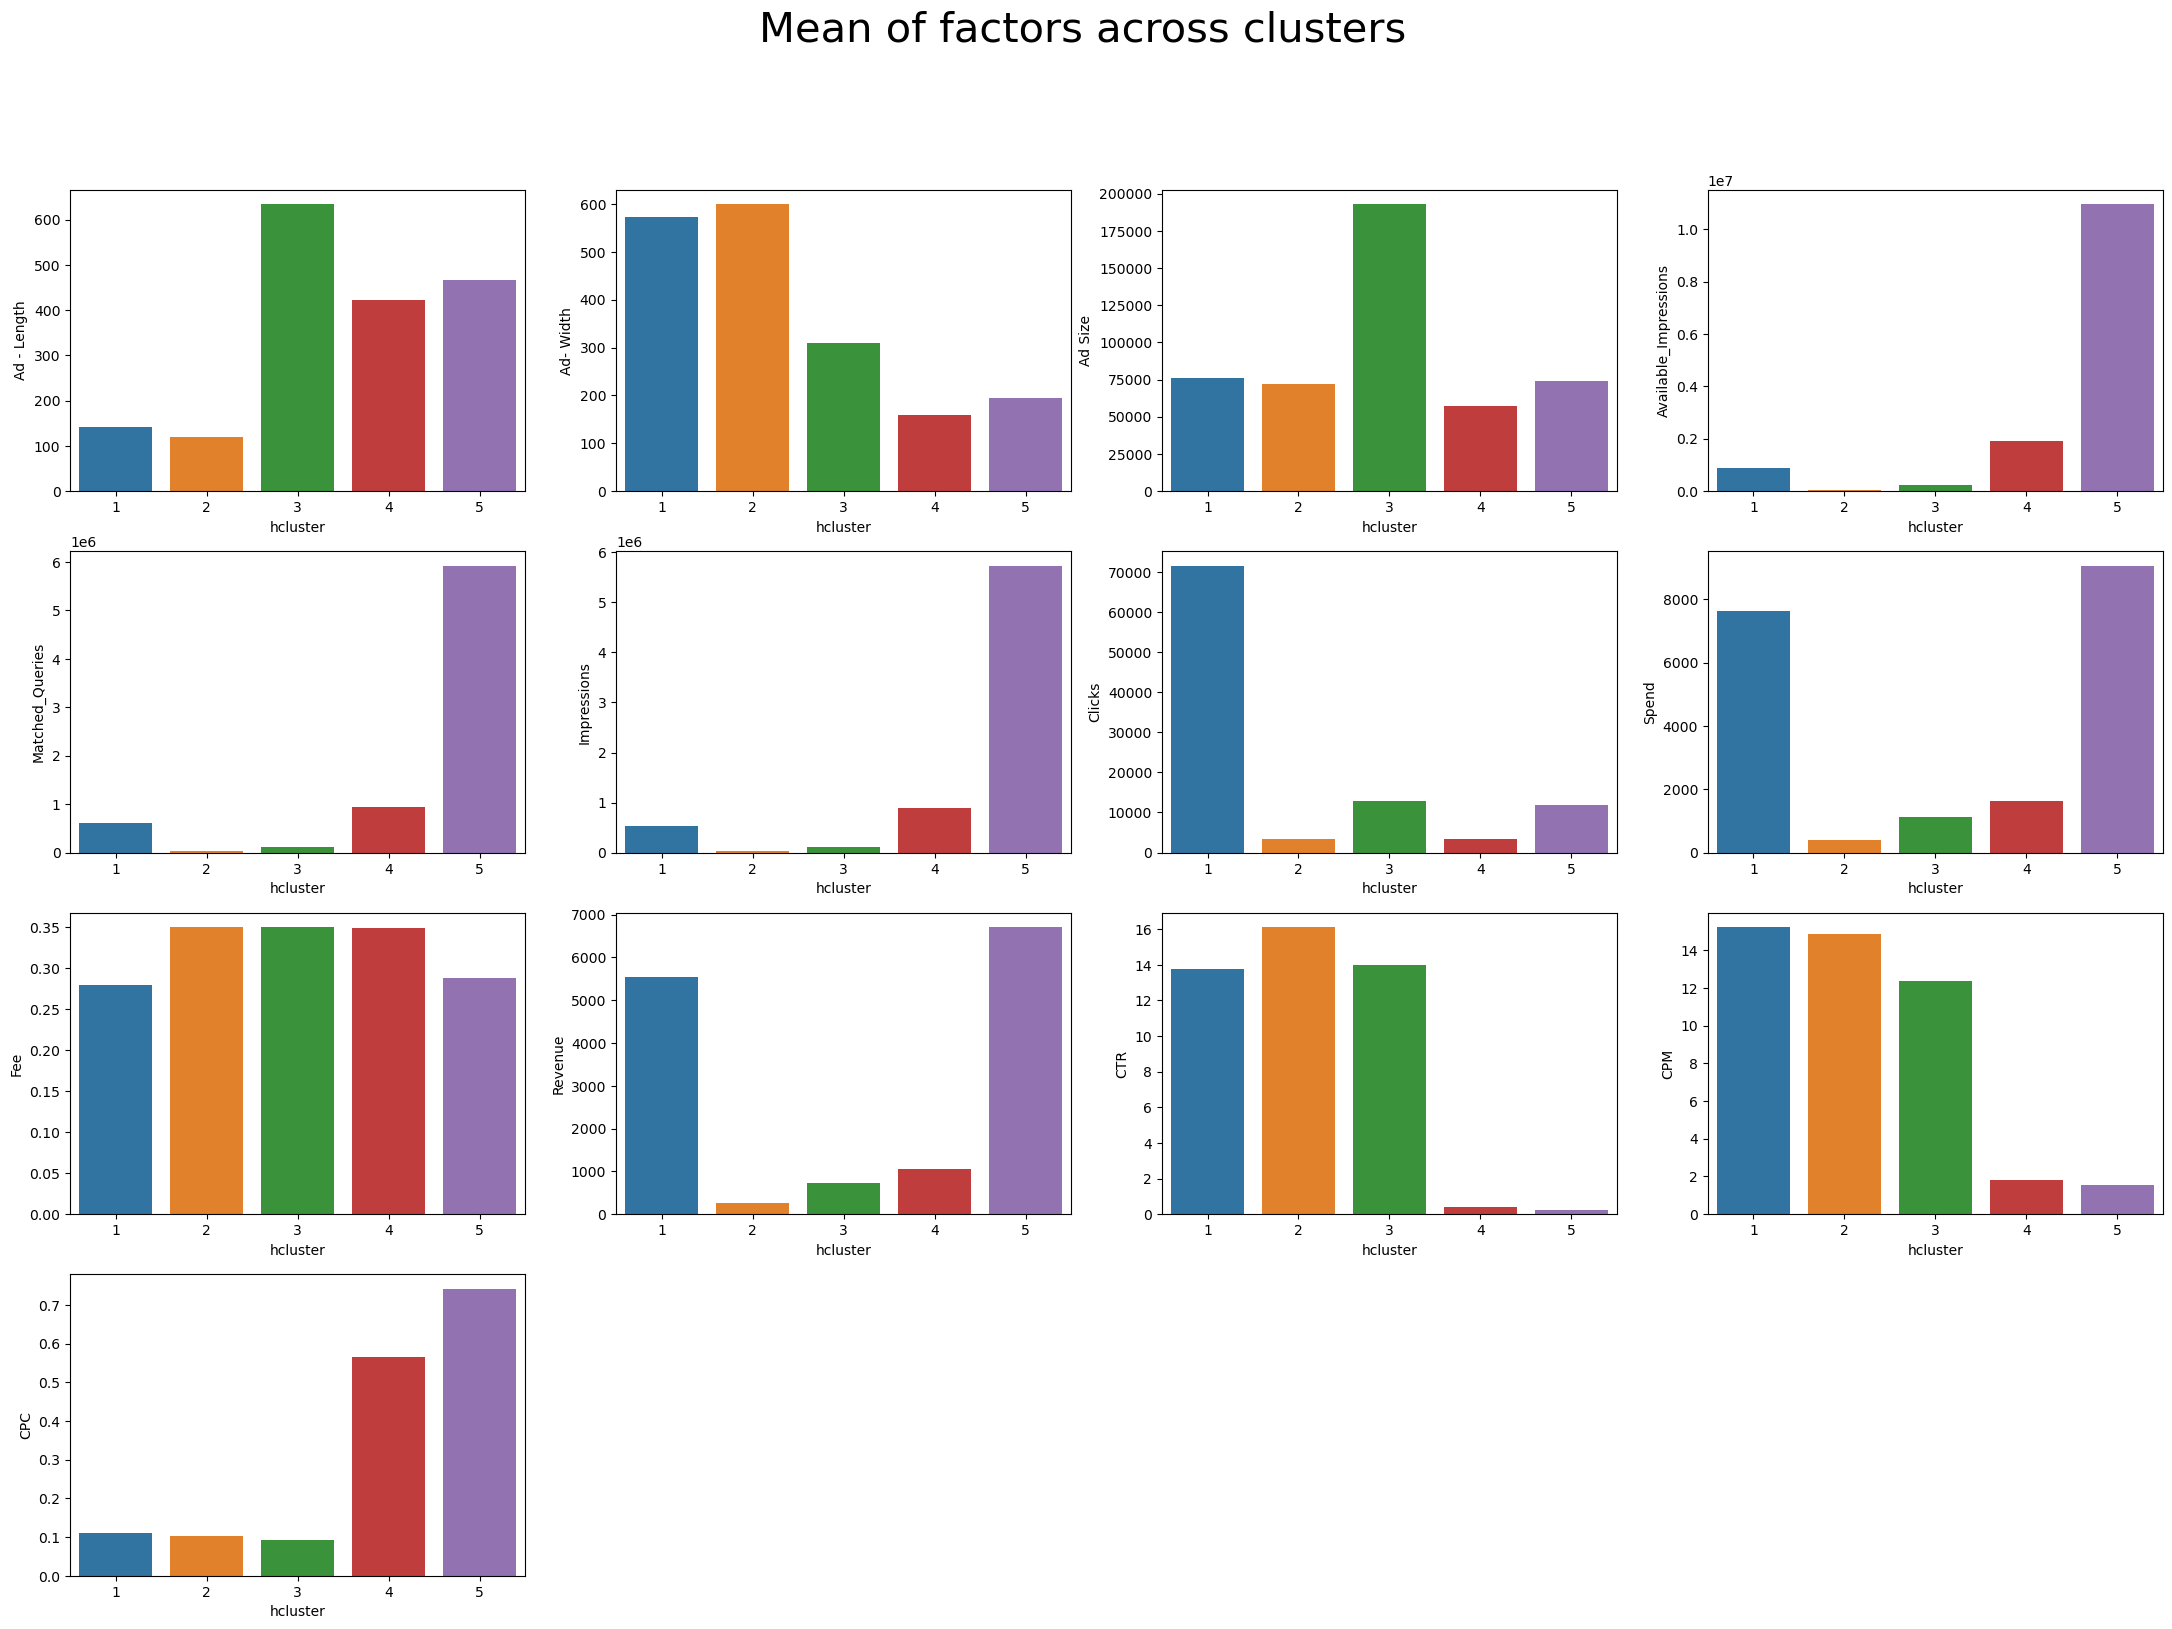

In [846]:
grouphc1=ads_hc.groupby('hcluster').mean().reset_index()
j=1
plt.figure(figsize=(27,18));
for i in num.columns :
    plt.subplot(4,4,j)
    j=j+1
    sns.barplot(x=grouphc1['hcluster'],y=grouphc1[i]);
plt.suptitle('Mean of factors across clusters',fontsize=30);

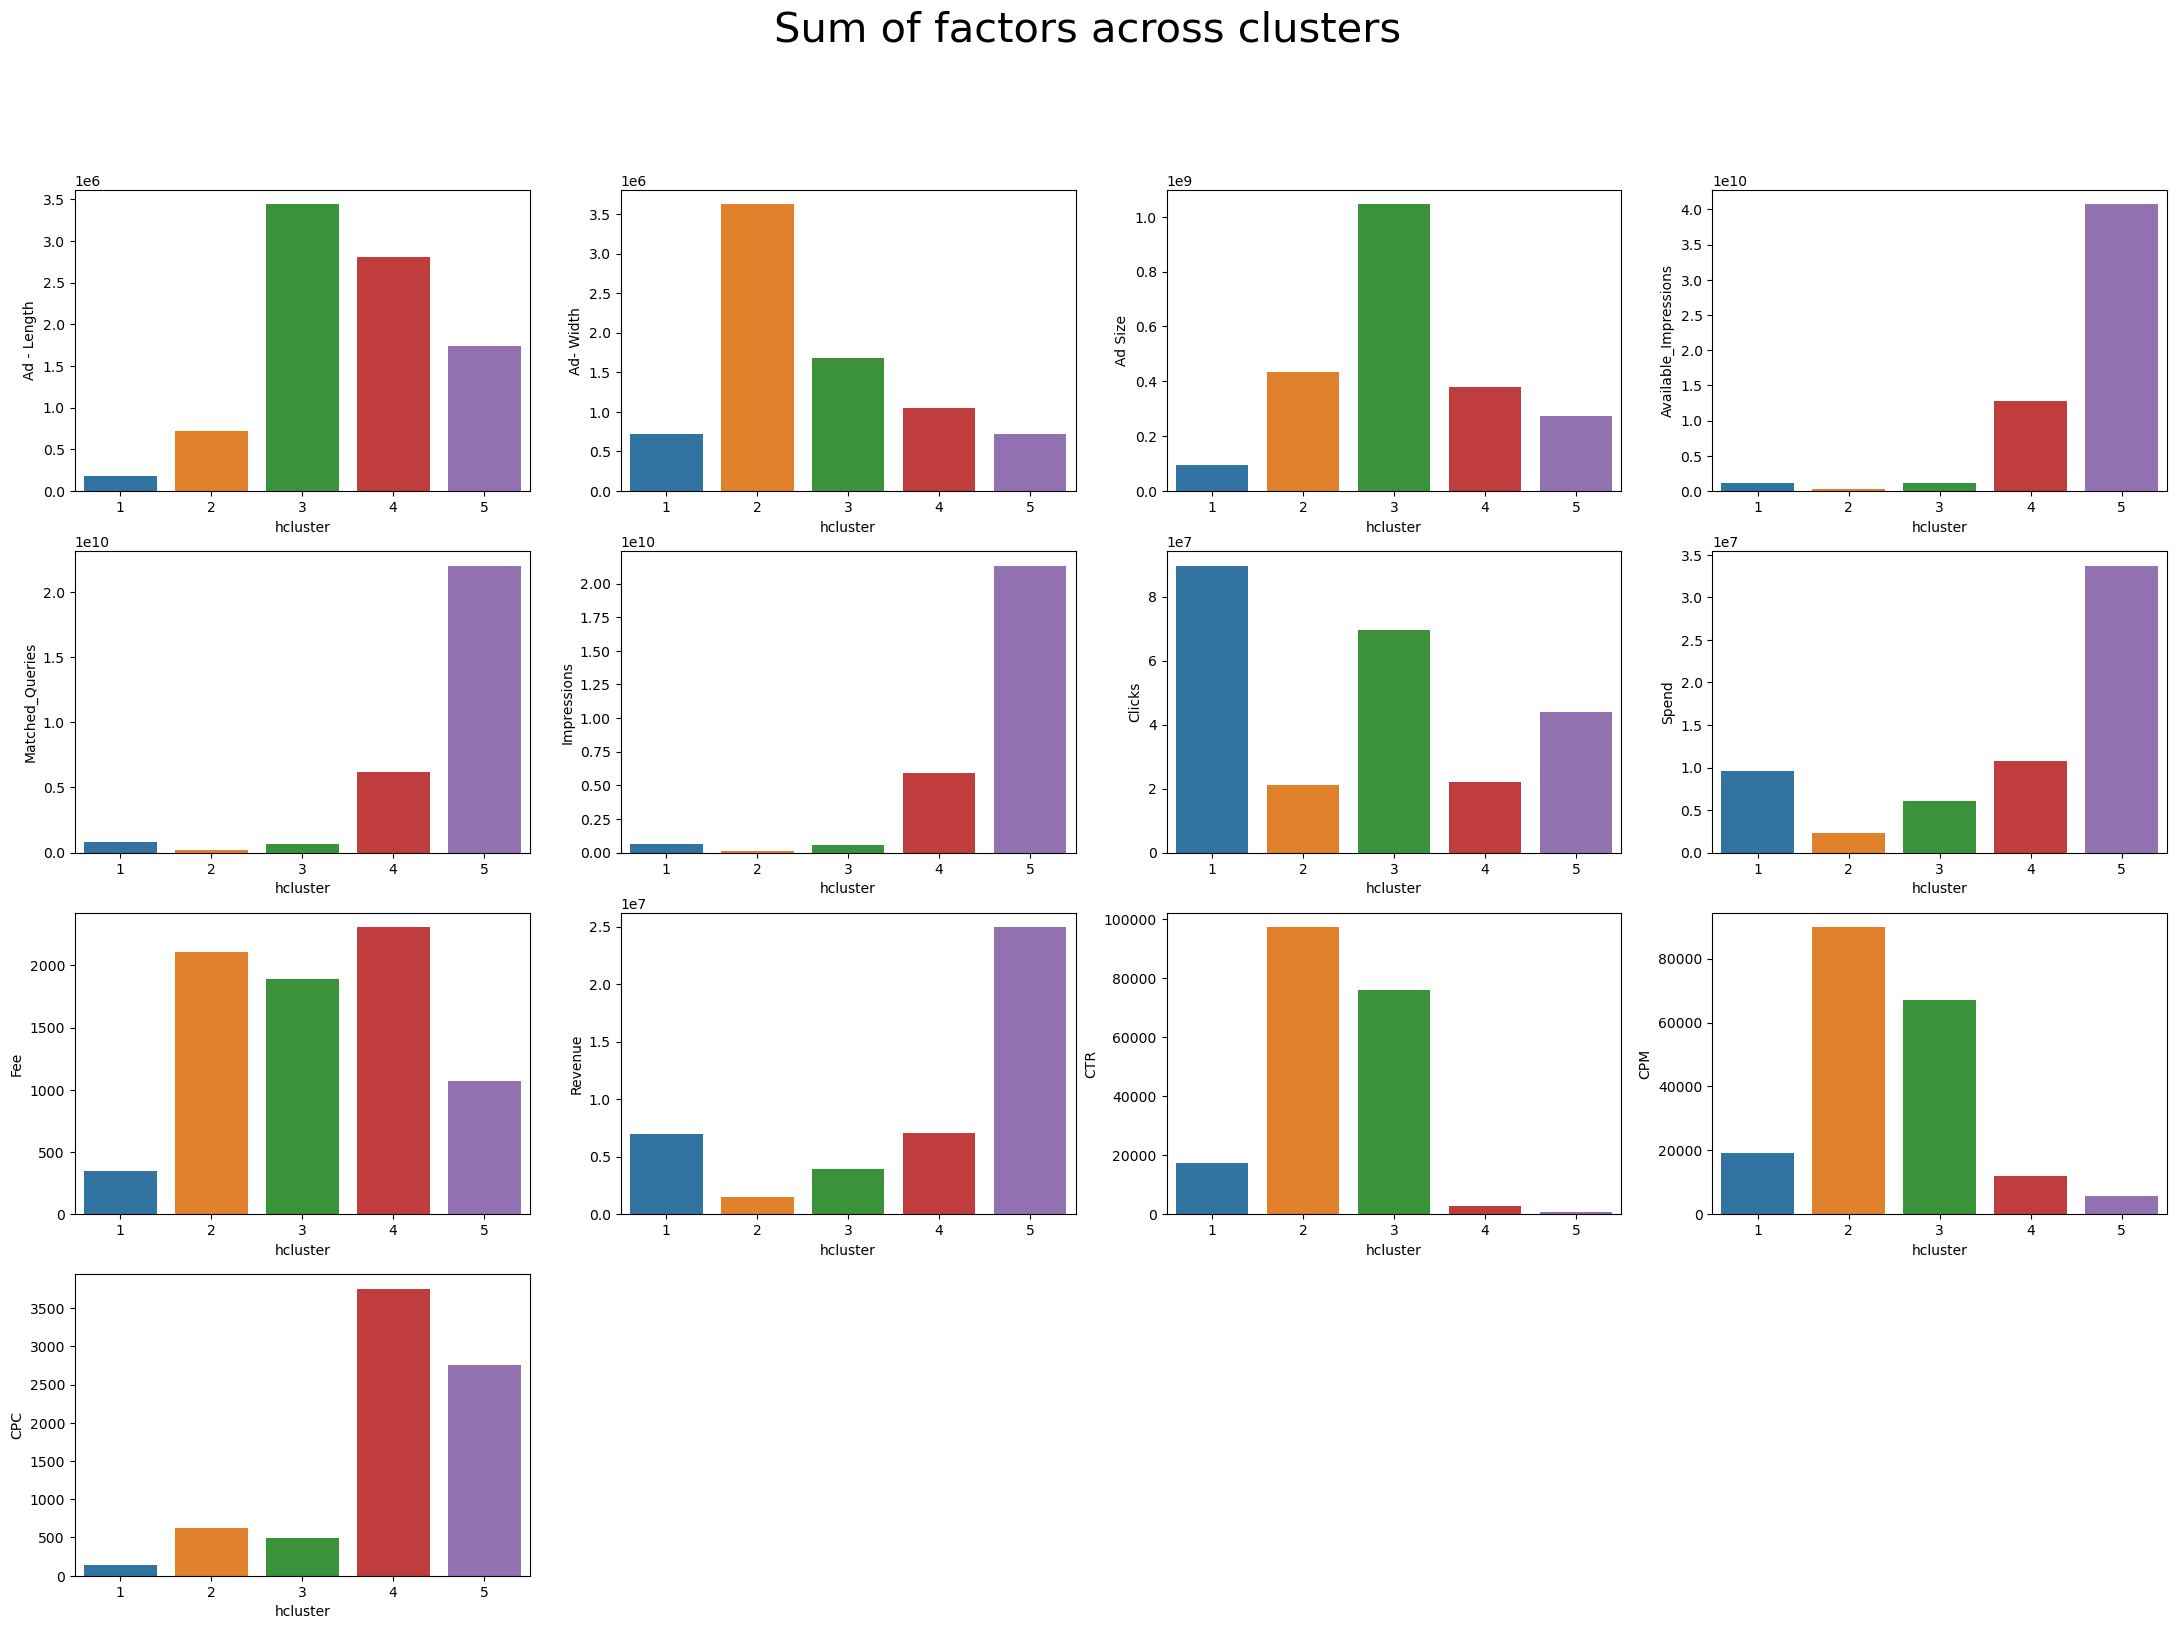

In [845]:
grouphc2=ads_hc.groupby('hcluster').sum().reset_index()
j=1
plt.figure(figsize=(27,18));
for i in num.columns :
    plt.subplot(4,4,j)
    j=j+1
    sns.barplot(x=grouphc2['hcluster'],y=grouphc2[i]);
plt.suptitle('Sum of factors across clusters',fontsize=30);

In [234]:
ads_hc.to_csv('ads_hc.csv')

### K-means clustering

#### **Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.**

In [235]:
wss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,random_state=123)
    km.fit(ads_num_scaled)
    wss.append(km.inertia_)

In [236]:
wss

[299858.0000000003,
 183381.4410614827,
 130912.09769942713,
 95167.53837512585,
 61573.13590698444,
 51710.81553050205,
 44628.78471205264,
 39628.44812994235,
 36111.54310938907,
 33650.8313824072]

Text(0.5, 1.0, 'Elbow plot to identify optimum number of clusters')

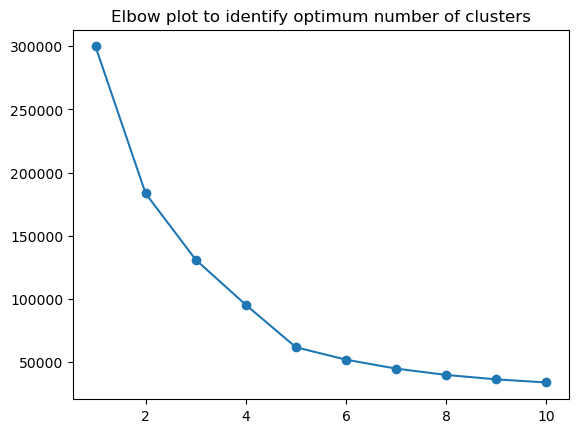

In [848]:
plt.plot(range(1,11),wss,marker='o')
plt.title('Elbow plot to identify optimum number of clusters')

Observations:
- From the above elbow plot, the optimum number of clusters is 5

#### Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [240]:
ss=[]
for i in range (1,11):
    km=KMeans(n_clusters=i,random_state=123)
    km.fit(ads_num_scaled)
    l=km.labels_
    if i > 1:
        ssc=silhouette_score(ads_num_scaled,l)
        ss.append(ssc)

In [241]:
print('Silhoutte scores for 2 to 10 clusters :', ss)

Silhoutte scores for 2 to 10 clusters : [0.38563243892114524, 0.3824397416745965, 0.4452509118782309, 0.5240238007237571, 0.5220833406497346, 0.516542969590082, 0.4797128672086253, 0.4367410164049805, 0.4448161952779515]


Observations:
- From the above array of silhoutte scores, we find that the same is the highest when the number of clusters is 5.
- This is also in tune with the optimum number of clusters determined from the elbow plot.
- Hence, we can proceed with n_clusters=5

#### Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

In [242]:
k_means=KMeans(n_clusters=5,random_state=100)
k_means.fit(ads_num_scaled)
labels=k_means.labels_

In [243]:
labels

array([3, 3, 3, ..., 0, 2, 0])

In [244]:
ads_km=ads.copy()

In [245]:
from sklearn.metrics import silhouette_samples,silhouette_score
ss=silhouette_score(ads_num_scaled,labels)
ssamp=silhouette_samples(ads_num_scaled,labels)

In [246]:
ss

0.5240238007237571

In [247]:
ssamp

array([0.14295364, 0.14234291, 0.14343898, ..., 0.12856441, 0.3859719 ,
       0.12863441])

In [248]:
ads_km['Cluster_km']=labels
ads_km['SSamp']=ssamp

In [249]:
ads_km.head()

Timestamp InventoryType  Ad - Length  Ad- Width  Ad Size   Ad Type  \
0  2020-9-2-17       Format1          300        250    75000  Inter222   
1  2020-9-2-10       Format1          300        250    75000  Inter227   
2  2020-9-1-22       Format1          300        250    75000  Inter222   
3  2020-9-3-20       Format1          300        250    75000  Inter228   
4  2020-9-4-15       Format1          300        250    75000  Inter217   

  Platform Device Type   Format  Available_Impressions  ...  Impressions  \
0    Video     Desktop  Display                   1806  ...          323   
1      App      Mobile    Video                   1780  ...          285   
2    Video     Desktop  Display                   2727  ...          355   
3    Video      Mobile    Video                   2430  ...          495   
4      Web     Desktop    Video                   1218  ...          242   

   Clicks  Spend   Fee  Revenue   CTR  CPM  CPC  Cluster_km     SSamp  
0       1    0.0  0.35      0.0  0.31  0.0  0.0           3  0.142954  
1       1    0.0  0.35      0.0  0.35  0.0  0.0           3  0.142343  
2       1    0.0  0.35      0.0  0.28  0.0  0.0           3  0.143439  
3       1    0.0  0.35      0.0  0.20  0.0  0.0           3  0.144624  
4       1    0.0  0.35      0.0  0.41  0.0  0.0           3  0.141394  

[5 rows x 21 columns]

In [251]:
ads_km.Cluster_km.value_counts().sort_index()

0    4675
1    4054
2    6525
3    6275
4    1537
Name: Cluster_km, dtype: int64

In [294]:
ads_km.to_csv('ads_km.csv')

In [297]:
y=ads_km.groupby('Cluster_km')['Clicks'].mean()


Cluster_km
0    14408.788877
1    11245.754810
2     1914.254253
3     3263.649721
4    65315.176318
Name: Clicks, dtype: float64

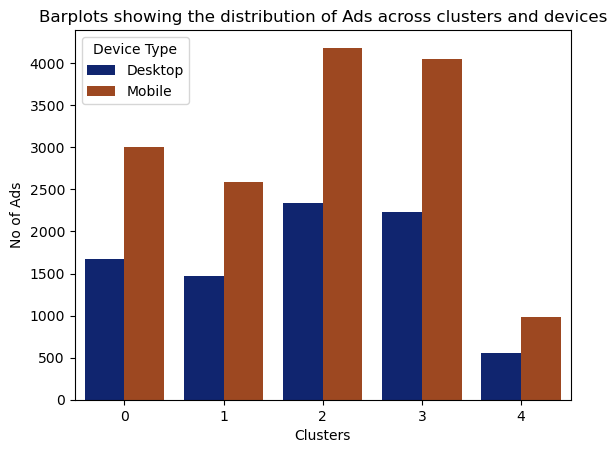

In [282]:
sns.countplot(x=ads_km['Cluster_km'],hue=ads_km['Device Type'],palette='dark');
plt.title('Barplots showing the distribution of Ads across clusters and devices')
plt.ylabel('No of Ads')
plt.xlabel('Clusters');

Observations:
- As seen from the above bar plot, the mobiles stream more ads than desktops across all the clusters. 
- The number of ads is the highest in cluster 2, closely followed by cluster 3
- We can observe the trends of the Clicks, Spend and revenue for these clusters

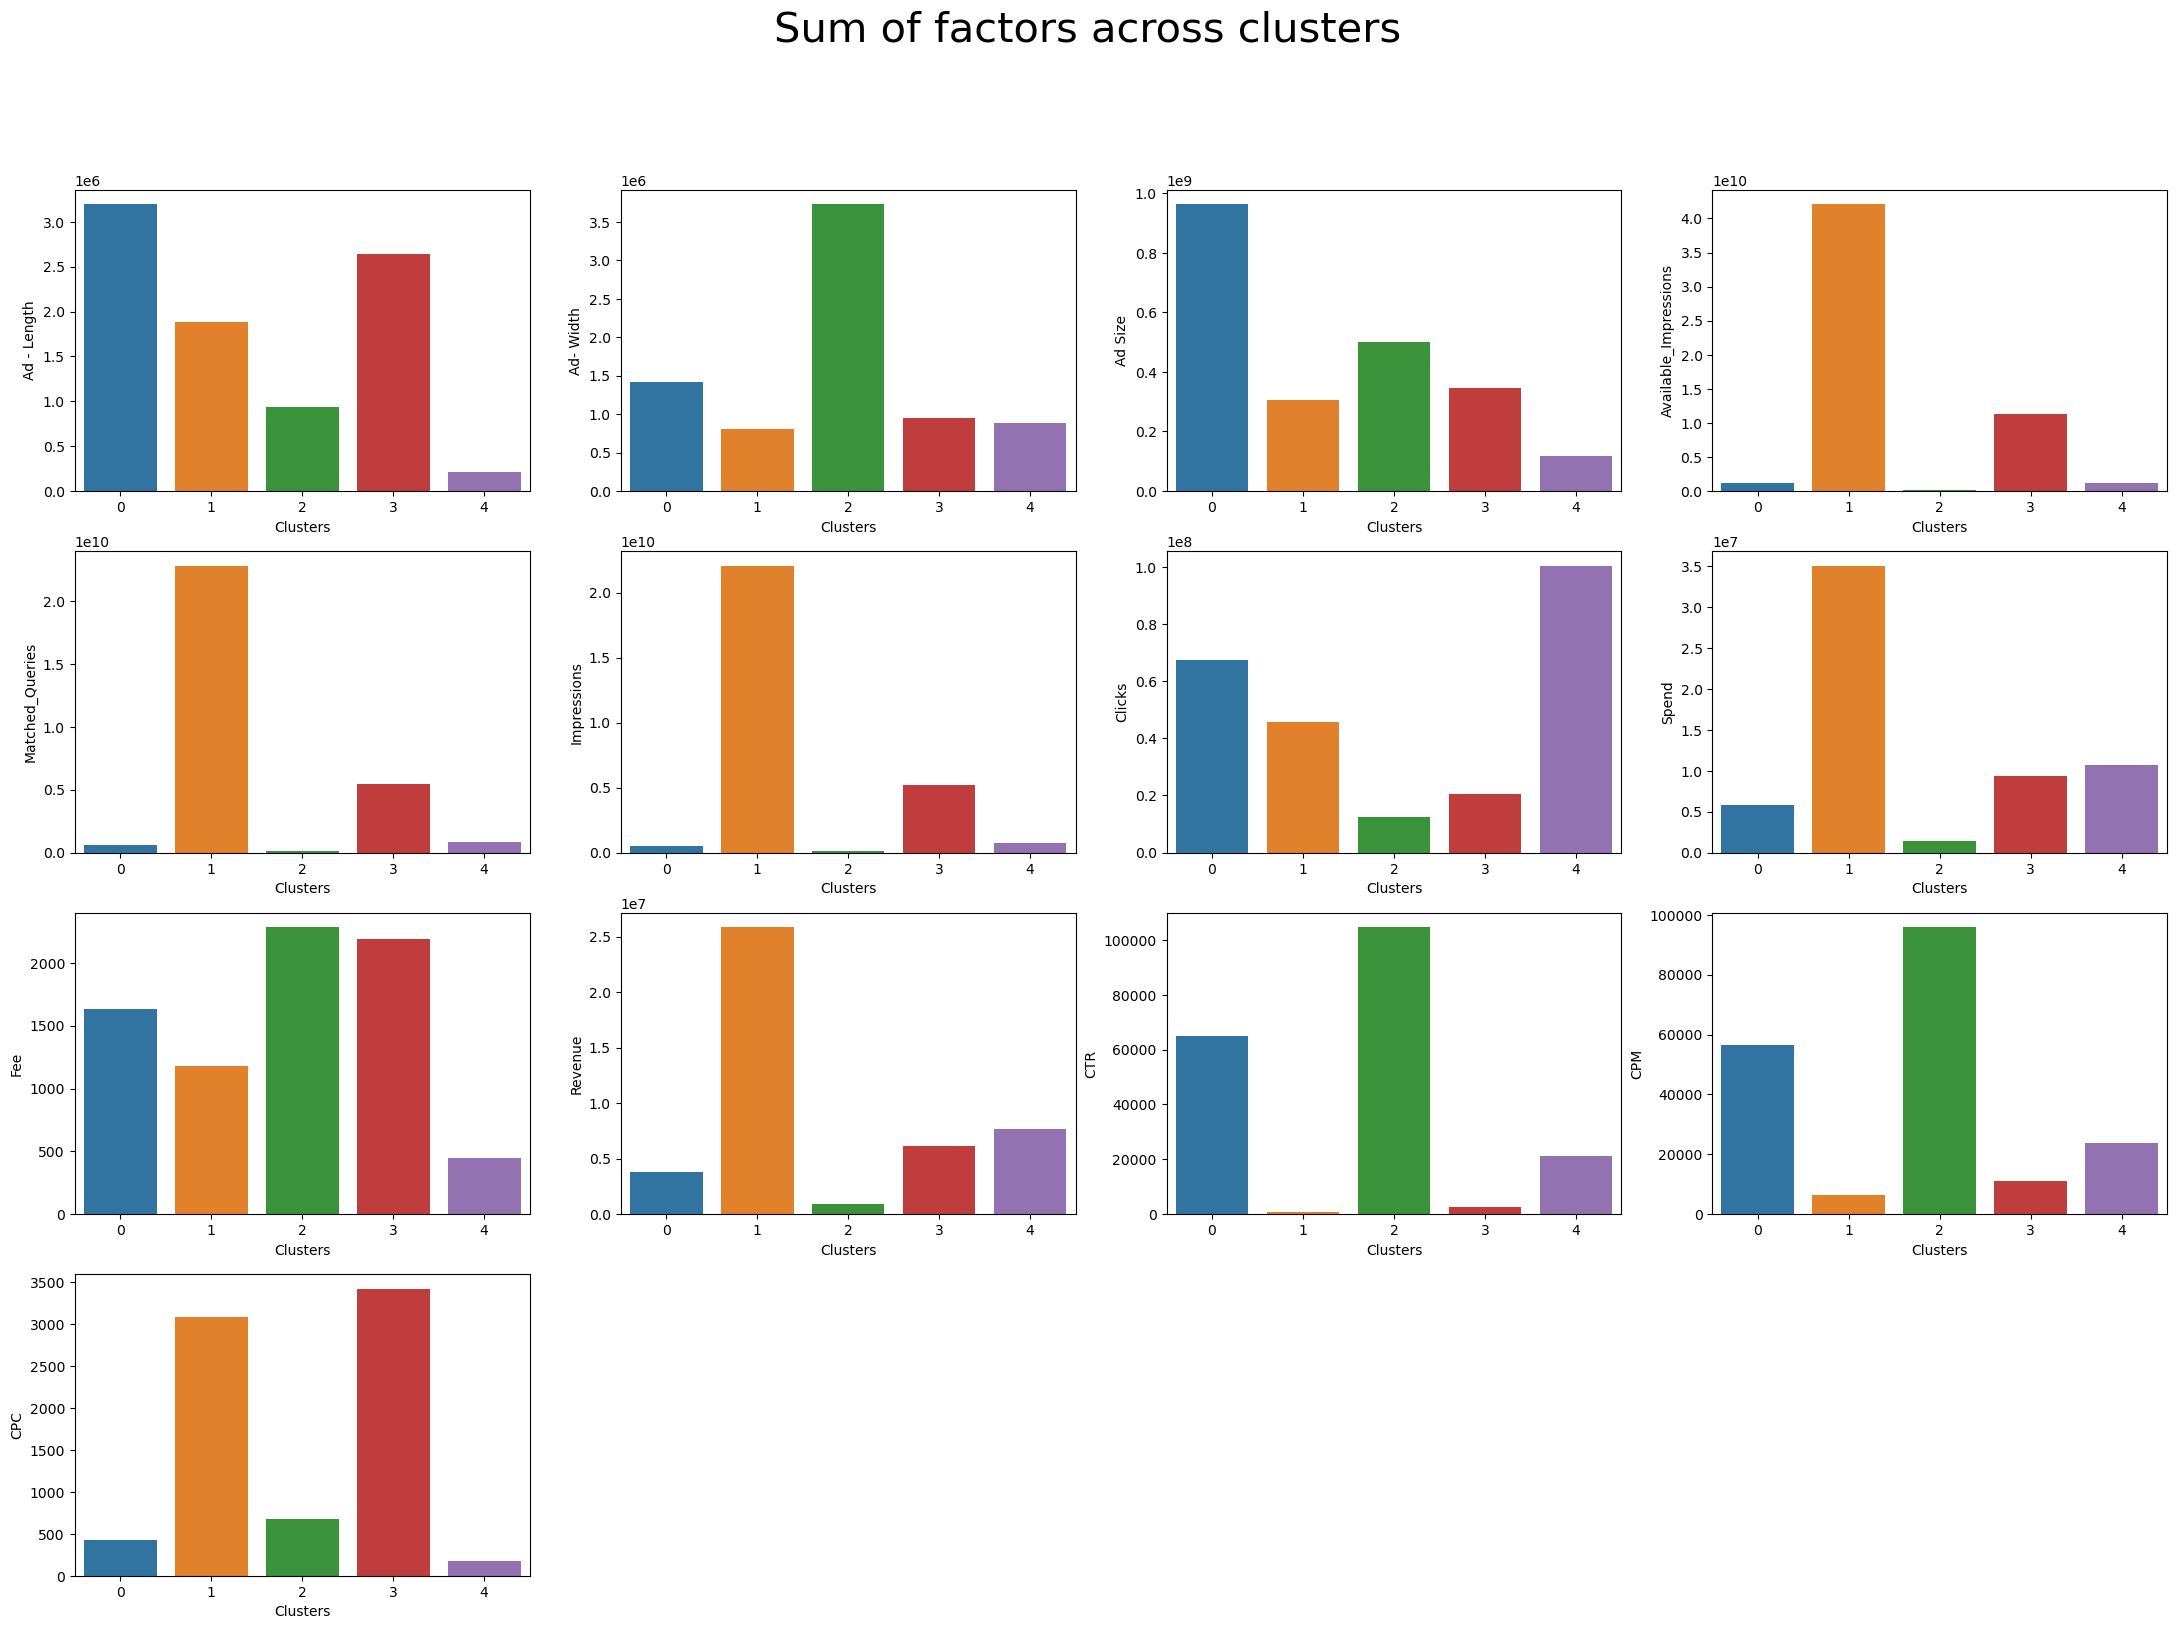

In [850]:
groupkm1=ads_km.groupby('Cluster_km').sum().reset_index()
j=1
plt.figure(figsize=(27,18));
for i in num.columns :
    plt.subplot(4,4,j)
    j=j+1
    sns.barplot(x=groupkm1['Cluster_km'],y=groupkm1[i]);
    plt.xlabel('Clusters')
plt.suptitle('Sum of factors across clusters',fontsize=30);

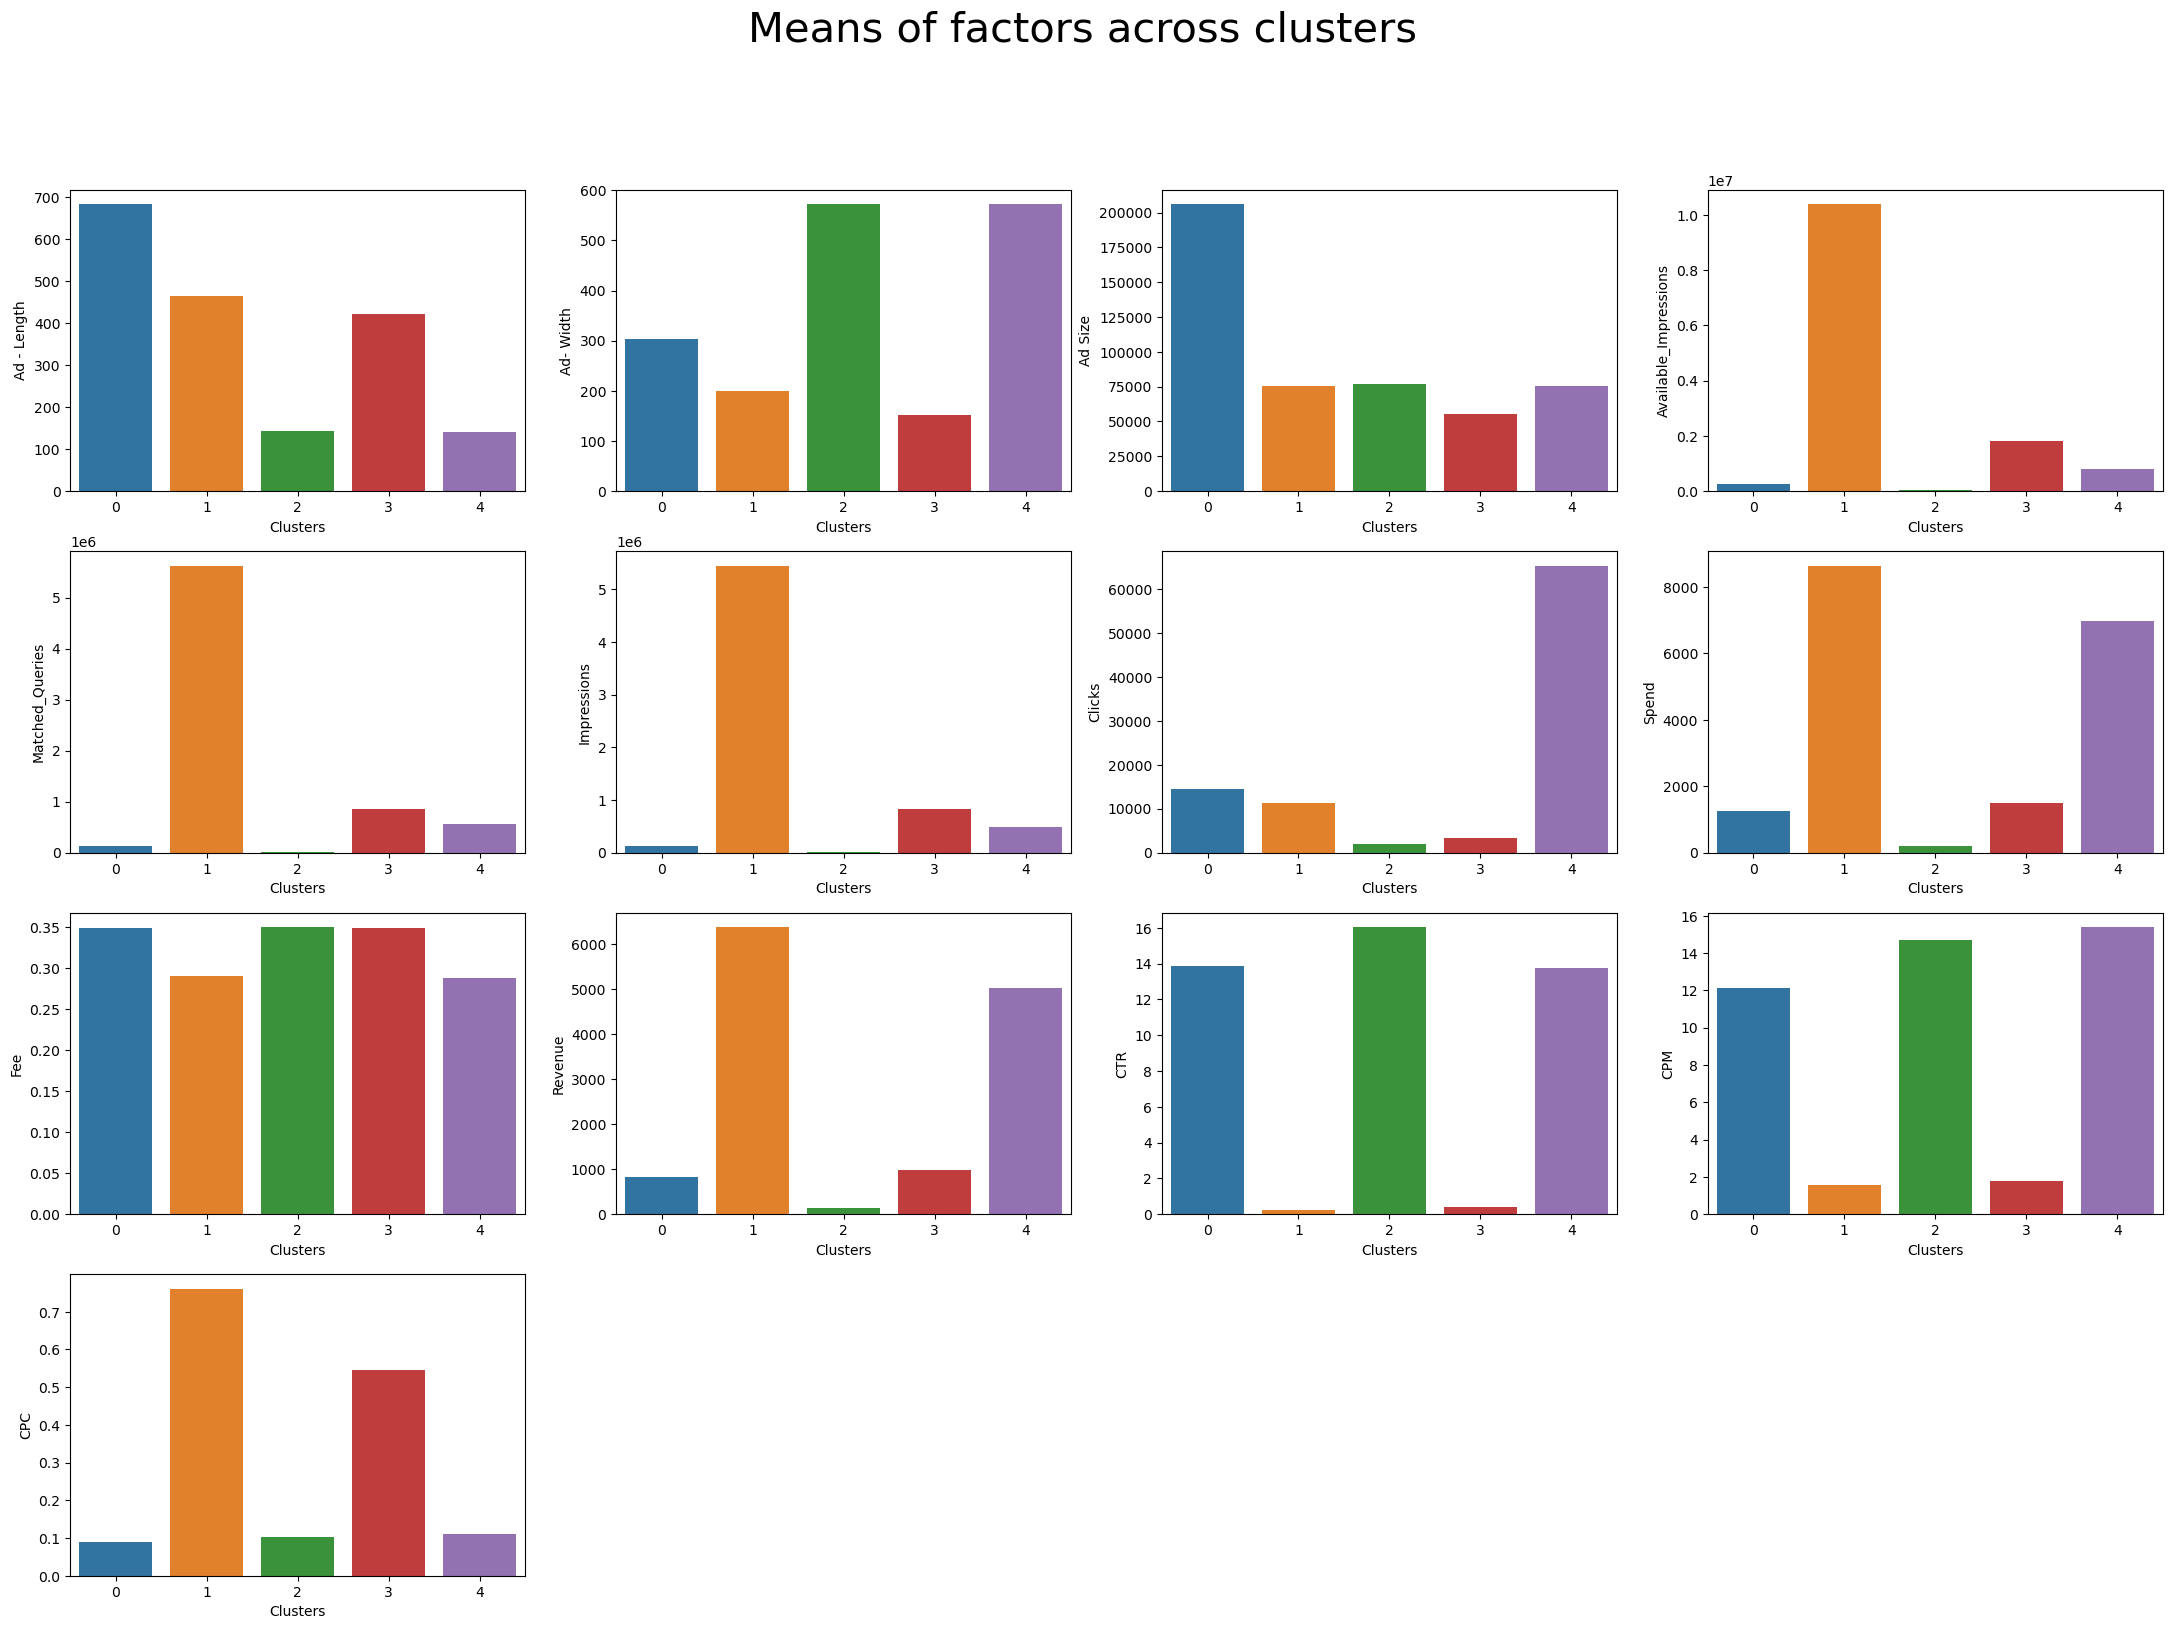

In [851]:
groupkm2=ads_km.groupby('Cluster_km').mean().reset_index()
j=1
plt.figure(figsize=(27,18));
for i in num.columns :
    plt.subplot(4,4,j)
    j=j+1
    sns.barplot(x=groupkm2['Cluster_km'],y=groupkm2[i]);
    plt.xlabel('Clusters')
plt.suptitle('Means of factors across clusters',fontsize=30);

In [360]:
grouped = ads_km.groupby(['Cluster_km', 'Device Type']).sum().reset_index()

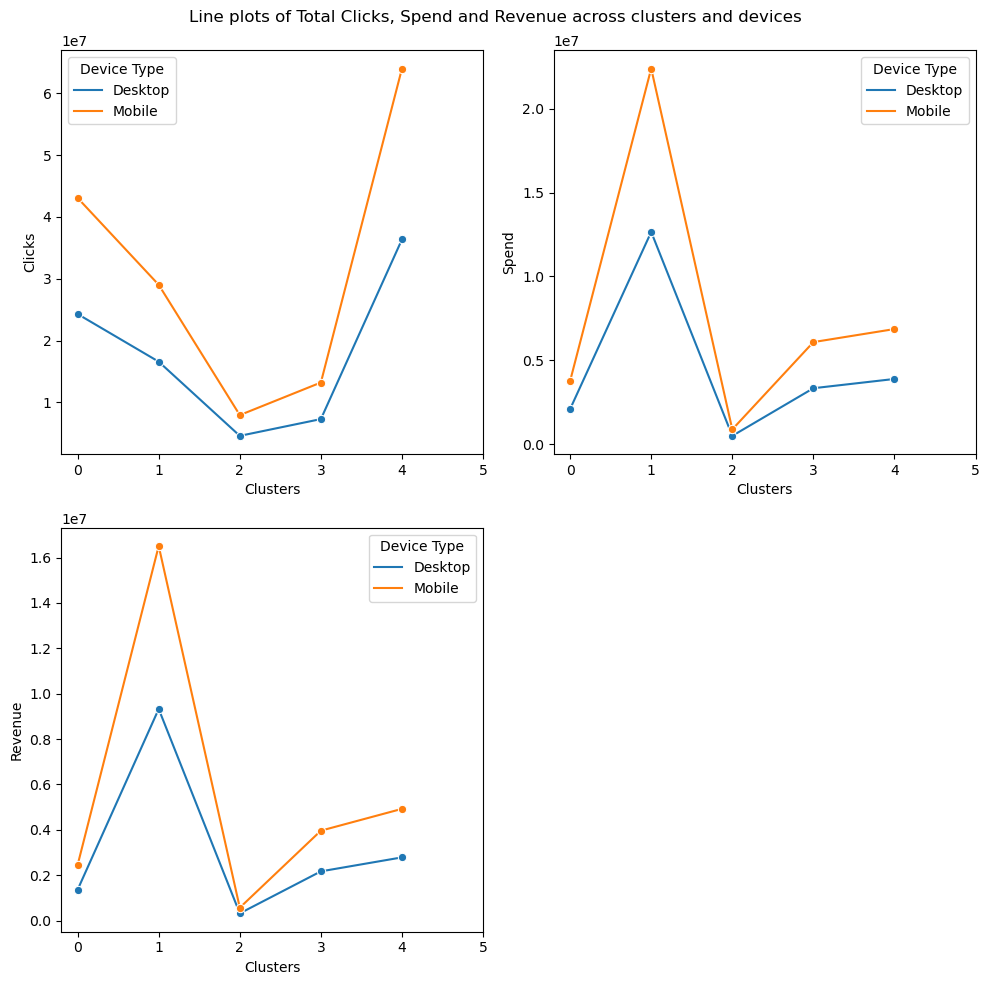

In [364]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.lineplot(x=grouped['Cluster_km'],y=grouped['Clicks'],hue=grouped['Device Type'],marker='o')
plt.xlabel('Clusters')
plt.xticks(np.arange(0,6,1))
plt.subplot(2,2,2)
sns.lineplot(x=grouped['Cluster_km'],y=grouped['Spend'],hue=grouped['Device Type'],marker='o')
plt.xlabel('Clusters')
plt.xticks(np.arange(0,6,1))
plt.subplot(2,2,3)
sns.lineplot(x=grouped['Cluster_km'],y=grouped['Revenue'],hue=grouped['Device Type'],marker='o')
plt.xlabel('Clusters')
plt.xticks(np.arange(0,6,1))
plt.suptitle('Line plots of Total Clicks, Spend and Revenue across clusters and devices')
plt.tight_layout()

Observations:
- The line plots of total Spend and Revenue are identical.
- The total number of clicks is the highest for the fourth cluster ,followed bu the 0th cluster
- The total revenue generated is directly proportional to the total spend across clusters

In [365]:
group1_avg= ads_km.groupby(['Cluster_km', 'Device Type']).mean().reset_index()
group1_avg

Cluster_km Device Type  Ad - Length   Ad- Width        Ad Size  \
0           0     Desktop   685.085030  304.161677  206658.682635   
1           0      Mobile   683.253245  303.477537  205892.845258   
2           1     Desktop   463.317406  199.228669   74982.225256   
3           1      Mobile   467.176516  199.103901   75286.535342   
4           2     Desktop   144.020504  571.144810   76722.340880   
5           2      Mobile   142.904398  572.645793   76551.625239   
6           3     Desktop   422.223619  151.908397   55042.281096   
7           3      Mobile   421.406126  152.052866   54990.444664   
8           4     Desktop   143.590664  568.581688   75597.845601   
9           4      Mobile   140.240816  574.642857   75624.489796   

   Available_Impressions  Matched_Queries   Impressions        Clicks  \
0           2.545487e+05     1.382438e+05  1.174109e+05  14541.243713   
1           2.491872e+05     1.369818e+05  1.162388e+05  14335.178369   
2           1.046944e+07     5.652794e+06  5.474058e+06  11312.535836   
3           1.034225e+07     5.610538e+06  5.432174e+06  11207.966396   
4           3.282498e+04     1.998006e+04  1.382276e+04   1950.121743   
5           3.182261e+04     1.948626e+04  1.336617e+04   1894.185946   
6           1.790350e+06     8.579398e+05  8.201751e+05   3268.903009   
7           1.821491e+06     8.678429e+05  8.296429e+05   3260.759634   
8           8.021278e+05     5.653970e+05  4.770268e+05  65285.184919   
9           8.087159e+05     5.676979e+05  4.787861e+05  65332.222449   

         Spend       Fee      Revenue        CTR        CPM       CPC  \
0  1251.027671  0.349545   814.675848  13.823353  12.069814  0.089425   
1  1253.005884  0.349534   816.037423  13.880436  12.117441  0.090203   
2  8637.451242  0.290853  6366.972127   0.217481   1.561836  0.754662   
3  8651.852032  0.290205  6377.444079   0.217068   1.579656  0.764411   
4   209.338402  0.349983   136.122091  16.046835  14.508518  0.103041   
5   209.090363  0.349990   135.938327  16.029120  14.793695  0.102689   
6  1495.848294  0.349300   974.556377   0.408226   1.789870  0.540687   
7  1502.639363  0.349244   979.141571   0.402433   1.788323  0.546712   
8  6972.607522  0.288474  5002.676306  13.793160  15.431724  0.111885   
9  7000.451337  0.288204  5025.985350  13.729582  15.359571  0.111908   

      SSamp  
0  0.527514  
1  0.523867  
2  0.488008  
3  0.489730  
4  0.543539  
5  0.545329  
6  0.485055  
7  0.486976  
8  0.678367  
9  0.679276

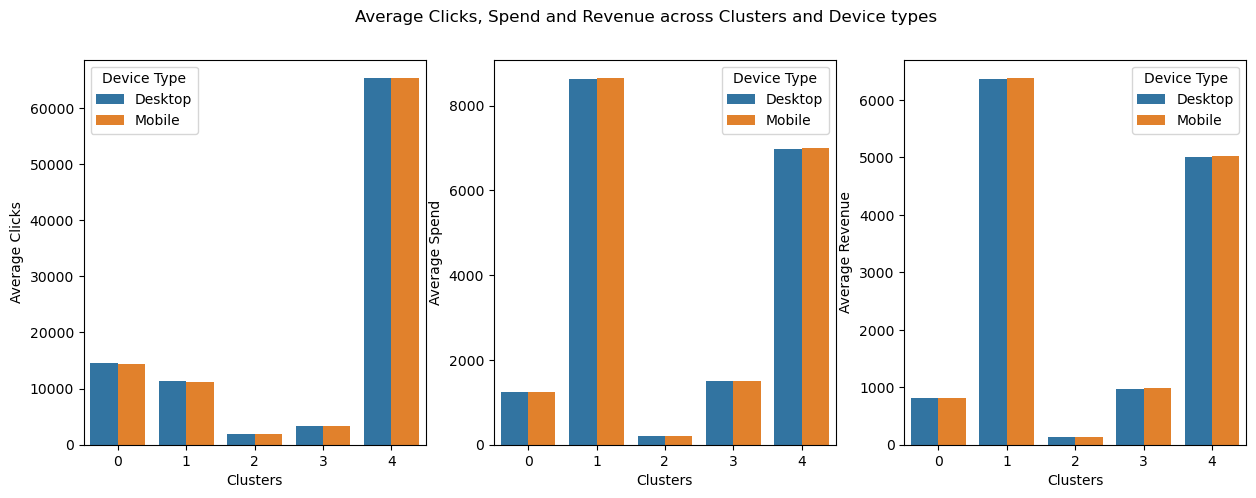

In [406]:
fig, axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.barplot(x=group1_avg['Cluster_km'], y=group1_avg['Clicks'], hue=group1_avg['Device Type'], ax=axes[0]);
axes[0].set_ylabel('Average Clicks')
axes[0].set_xlabel('Clusters')
sns.barplot(x=group1_avg['Cluster_km'], y=group1_avg['Spend'], hue=group1_avg['Device Type'], ax=axes[1])
axes[1].set_ylabel('Average Spend')
axes[1].set_xlabel('Clusters')
sns.barplot(x=group1_avg['Cluster_km'], y=group1_avg['Revenue'], hue=group1_avg['Device Type'], ax=axes[2])
axes[2].set_ylabel('Average Revenue')
axes[2].set_xlabel('Clusters')
plt.suptitle('Average Clicks, Spend and Revenue across Clusters and Device types');

Observations:
- We observe that eventhough the total Clicks, spend, and revenue is higher from mobiles than desktops, the average of all these parameters across clusters remains the same for both types of devices.

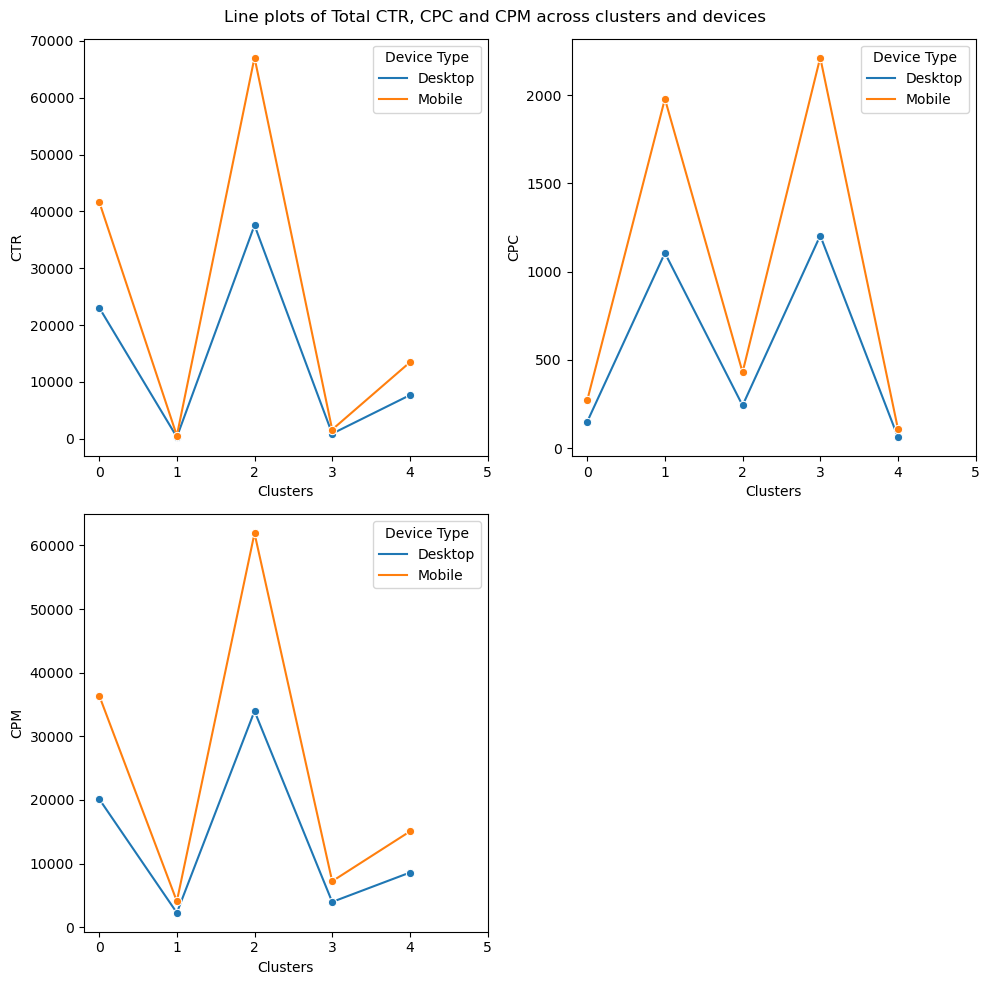

In [407]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.lineplot(x=grouped['Cluster_km'],y=grouped['CTR'],hue=grouped['Device Type'],marker='o')
plt.xlabel('Clusters')
plt.xticks(np.arange(0,6,1))
plt.subplot(2,2,2)
sns.lineplot(x=grouped['Cluster_km'],y=grouped['CPC'],hue=grouped['Device Type'],marker='o')
plt.xlabel('Clusters')
plt.xticks(np.arange(0,6,1))
plt.subplot(2,2,3)
sns.lineplot(x=grouped['Cluster_km'],y=grouped['CPM'],hue=grouped['Device Type'],marker='o')
plt.xlabel('Clusters')
plt.xticks(np.arange(0,6,1))
plt.suptitle('Line plots of Total CTR, CPC and CPM across clusters and devices')
plt.tight_layout()

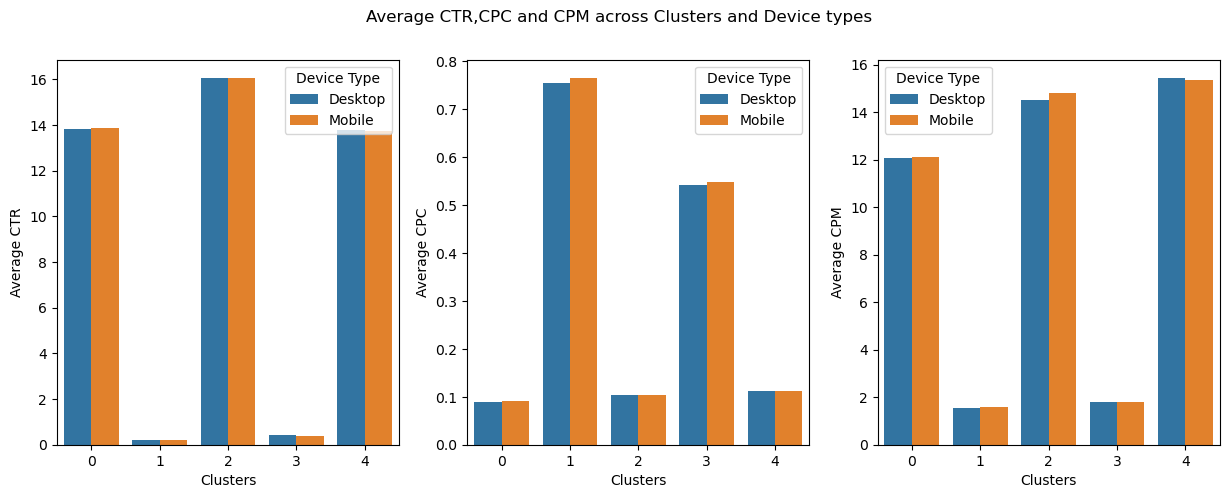

In [408]:
fig, axes=plt.subplots(nrows=1,ncols=3,figsize=(15,5))
sns.barplot(x=group1_avg['Cluster_km'], y=group1_avg['CTR'], hue=group1_avg['Device Type'], ax=axes[0]);
axes[0].set_ylabel('Average CTR')
axes[0].set_xlabel('Clusters')
sns.barplot(x=group1_avg['Cluster_km'], y=group1_avg['CPC'], hue=group1_avg['Device Type'], ax=axes[1])
axes[1].set_ylabel('Average CPC')
axes[1].set_xlabel('Clusters')
sns.barplot(x=group1_avg['Cluster_km'], y=group1_avg['CPM'], hue=group1_avg['Device Type'], ax=axes[2])
axes[2].set_ylabel('Average CPM')
axes[2].set_xlabel('Clusters')
plt.suptitle('Average CTR,CPC and CPM across Clusters and Device types');

Observations:

#### Part 1 - Clustering: Conclude the project by providing summary of your learnings.

# Problem 2

## Basic Analysis

#### Part 2 - PCA: Read the data and perform basic checks like checking head, info, summary, nulls, and duplicates, etc.

In [410]:
census=pd.read_excel('PCA India Data_Census.xlsx')

In [853]:
census.head()

State Code  Dist.Code            State    Area Name  No_HH  TOT_M  TOT_F  \
0           1          1  Jammu & Kashmir      Kupwara   7707  23388  29796   
1           1          2  Jammu & Kashmir       Badgam   6218  19585  23102   
2           1          3  Jammu & Kashmir  Leh(Ladakh)   4452   6546  10964   
3           1          4  Jammu & Kashmir       Kargil   1320   2784   4206   
4           1          5  Jammu & Kashmir        Punch  11654  20591  29981   

   M_06  F_06  M_SC  ...  MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  \
0  5862  6196     3  ...           1150            749            180   
1  4482  3733     7  ...            525            715            123   
2  1082  1018     3  ...            114            188             44   
3   563   677     0  ...            194            247             61   
4  5157  4587    20  ...            874           1928            465   

   MARG_AL_0_3_F  MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  \
0            237            680            252             32             46   
1            229            186            148             76            178   
2             89              3             34              0              4   
3            128             13             50              4             10   
4           1043            205            302             24            105   

   NON_WORK_M  NON_WORK_F  
0         258         214  
1         140         160  
2          67          61  
3         116          59  
4         180         478  

[5 rows x 61 columns]

In [413]:
census.shape

(640, 61)

In [856]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

Observations:
- The given dataset has 640 data points, and 61 fields containing elaborate details of various areas, including gender, population, literacy, occupation etc.
- There are no null values present in the given dataset


In [858]:
census.describe().T.round(2)

count       mean        std    min       25%      50%  \
State Code      640.0      17.11       9.43    1.0      9.00     18.0   
Dist.Code       640.0     320.50     184.90    1.0    160.75    320.5   
No_HH           640.0   51222.87   48135.41  350.0  19484.00  35837.0   
TOT_M           640.0   79940.58   73384.51  391.0  30228.00  58339.0   
TOT_F           640.0  122372.08  113600.72  698.0  46517.75  87724.5   
M_06            640.0   12309.10   11500.91   56.0   4733.75   9159.0   
F_06            640.0   11942.30   11326.29   56.0   4672.25   8663.0   
M_SC            640.0   13820.95   14426.37    0.0   3466.25   9591.5   
F_SC            640.0   20778.39   21727.89    0.0   5603.25  13709.0   
M_ST            640.0    6191.81    9912.67    0.0    293.75   2333.5   
F_ST            640.0   10155.64   15875.70    0.0    429.50   3834.5   
M_LIT           640.0   57967.98   55910.28  286.0  21298.00  42693.5   
F_LIT           640.0   66359.57   75037.86  371.0  20932.00  43796.5   
M_ILL           640.0   21972.60   19825.61  105.0   8590.00  15767.5   
F_ILL           640.0   56012.52   47116.69  327.0  22367.00  42386.0   
TOT_WORK_M      640.0   37992.41   36419.54  100.0  13753.50  27936.5   
TOT_WORK_F      640.0   41295.76   37192.36  357.0  16097.75  30588.5   
MAINWORK_M      640.0   30204.45   31480.92   65.0   9787.00  21250.5   
MAINWORK_F      640.0   28198.85   29998.26  240.0   9502.25  18484.0   
MAIN_CL_M       640.0    5424.34    4739.16    0.0   2023.50   4160.5   
MAIN_CL_F       640.0    5486.04    5326.36    0.0   1920.25   3908.5   
MAIN_AL_M       640.0    5849.11    6399.51    0.0   1070.25   3936.5   
MAIN_AL_F       640.0    8926.00   12864.29    0.0   1408.75   3933.5   
MAIN_HH_M       640.0     883.89    1278.64    0.0    187.50    498.5   
MAIN_HH_F       640.0    1380.77    3179.41    0.0    248.75    540.5   
MAIN_OT_M       640.0   18047.10   26068.48   36.0   3997.50   9598.0   
MAIN_OT_F       640.0   12406.04   18972.20  153.0   3142.50   6380.5   
MARGWORK_M      640.0    7787.96    7410.79   35.0   2937.50   5627.0   
MARGWORK_F      640.0   13096.91   10996.47  117.0   5424.50  10175.0   
MARG_CL_M       640.0    1040.74    1311.55    0.0    311.75    606.5   
MARG_CL_F       640.0    2307.68    3564.63    0.0    630.25   1226.0   
MARG_AL_M       640.0    3304.33    3781.56    0.0    873.50   2062.0   
MARG_AL_F       640.0    6463.28    6773.88    0.0   1402.50   4020.5   
MARG_HH_M       640.0     316.74     462.66    0.0     71.75    166.0   
MARG_HH_F       640.0     786.63    1198.72    0.0    171.75    429.0   
MARG_OT_M       640.0    3126.15    3609.39    7.0    935.50   2036.0   
MARG_OT_F       640.0    3539.32    4115.19   19.0   1071.75   2349.5   
MARGWORK_3_6_M  640.0   41948.17   39045.32  291.0  16208.25  30315.0   
MARGWORK_3_6_F  640.0   81076.32   82970.41  341.0  26619.50  56793.0   
MARG_CL_3_6_M   640.0    6394.99    6019.81   27.0   2372.00   4630.0   
MARG_CL_3_6_F   640.0   10339.86    8467.47   85.0   4351.50   8295.0   
MARG_AL_3_6_M   640.0     789.85     905.64    0.0    235.50    480.5   
MARG_AL_3_6_F   640.0    1749.58    2496.54    0.0    497.25    985.5   
MARG_HH_3_6_M   640.0    2743.64    3059.59    0.0    718.75   1714.5   
MARG_HH_3_6_F   640.0    5169.85    5335.64    0.0   1113.75   3294.0   
MARG_OT_3_6_M   640.0     245.36     358.73    0.0     58.00    129.5   
MARG_OT_3_6_F   640.0     585.88     900.03    0.0    127.75    320.5   
MARGWORK_0_3_M  640.0    2616.14    3036.96    7.0    755.00   1681.5   
MARGWORK_0_3_F  640.0    2834.55    3327.84   14.0    833.50   1834.5   
MARG_CL_0_3_M   640.0    1392.97    1489.71    4.0    489.50    949.0   
MARG_CL_0_3_F   640.0    2757.05    2788.78   30.0    957.25   1928.0   
MARG_AL_0_3_M   640.0     250.89     453.34    0.0     47.00    114.5   
MARG_AL_0_3_F   640.0     558.10    1117.64    0.0    109.00    247.5   
MARG_HH_0_3_M   640.0     560.69     762.58    0.0    136.50    308.0   
M

Observations:
- The data magnitudes varies across fields. Scaling is required
- Few fields have a minimum value of 0, which seem plausible
- Most of the distributions are not normal
- Few occupation related fields may have outliers

In [416]:
census.State.value_counts()

Uttar Pradesh               71
Madhya Pradesh              50
Bihar                       38
Maharashtra                 35
Rajasthan                   33
Tamil Nadu                  32
Karnataka                   30
Odisha                      30
Assam                       27
Gujarat                     26
Jharkhand                   24
Andhra Pradesh              23
Jammu & Kashmir             22
Haryana                     21
Punjab                      20
West Bengal                 19
Chhattisgarh                18
Arunachal Pradesh           16
Kerala                      14
Uttarakhand                 13
Himachal Pradesh            12
Nagaland                    11
Manipur                      9
NCT of Delhi                 9
Mizoram                      8
Meghalaya                    7
Tripura                      4
Sikkim                       4
Puducherry                   4
Andaman & Nicobar Island     3
Goa                          2
Daman & Diu                  2
Lakshadw

In [418]:
census['Area Name'].unique()

array(['Kupwara', 'Badgam', 'Leh(Ladakh)', 'Kargil', 'Punch', 'Rajouri',
       'Kathua', 'Baramula', 'Bandipore', 'Srinagar', 'Ganderbal',
       'Pulwama', 'Shupiyan', 'Anantnag', 'Kulgam', 'Doda', 'Ramban',
       'Kishtwar', 'Udhampur', 'Reasi', 'Jammu', 'Samba', 'Chamba',
       'Kangra', 'Lahul & Spiti', 'Kullu', 'Mandi', 'Hamirpur', 'Una',
       'Bilaspur', 'Solan', 'Sirmaur', 'Shimla', 'Kinnaur', 'Gurdaspur',
       'Kapurthala ', 'Jalandhar', 'Hoshiarpur',
       'Shahid Bhagat Singh Nagar ', 'Fatehgarh Sahib', 'Ludhiana',
       'Moga', 'Firozpur', 'Muktsar', 'Faridkot', 'Bathinda', 'Mansa',
       'Patiala', 'Amritsar ', 'Tarn Taran', 'Rupnagar',
       'Sahibzada Ajit Singh Nagar', 'Sangrur', 'Barnala', 'Chandigarh',
       'Uttarkashi', 'Chamoli', 'Rudraprayag', 'Tehri Garhwal',
       'Dehradun', 'Garhwal', 'Pithoragarh', 'Bageshwar', 'Almora\n',
       'Champawat', 'Nainital', 'Udham Singh Nagar', 'Hardwar',
       'Panchkula', 'Ambala', 'Yamunanagar', 'Kurukshetra', 'K

Observations:
- The categorical fields look fine. No need of any cleanup

In [420]:
census.duplicated().sum()

0

## EDA

### Part 2 - PCA: Perform detailed Exploratory analysis by creating certain questions like (i) Which state has highest gender ratio and which has the lowest? (ii) Which district has the highest & lowest gender ratio? (Example Questions). Pick 5 variables out of the given 24 variables below for EDA: No_HH, TOT_M, TOT_F, M_06, F_06, M_SC, F_SC, M_ST, F_ST, M_LIT, F_LIT, M_ILL, F_ILL, TOT_WORK_M, TOT_WORK_F, MAINWORK_M, MAINWORK_F, MAIN_CL_M, MAIN_CL_F, MAIN_AL_M, MAIN_AL_F, MAIN_HH_M, MAIN_HH_F, MAIN_OT_M, MAIN_OT_F

#### Univariate Analysis

In [430]:
census_num=census.iloc[:,4:62]

In [431]:
census_num

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST   F_ST  M_LIT  ...  \
0     7707  23388  29796  5862  6196     3     0  1999   2598  13381  ...   
1     6218  19585  23102  4482  3733     7     6   427    517  10513  ...   
2     4452   6546  10964  1082  1018     3     6  5806   9723   4534  ...   
3     1320   2784   4206   563   677     0     0  2666   3968   1842  ...   
4    11654  20591  29981  5157  4587    20    33  7670  10843  13243  ...   
..     ...    ...    ...   ...   ...   ...   ...   ...    ...    ...  ...   
635   3333   8154  11781  1146  1203    21    30     0      0   6916  ...   
636  10612  12346  21691  1544  1533  2234  4155     0      0  10292  ...   
637   1275   1549   2630   227   225     0     0  1012   1750   1187  ...   
638   3762   5200   8012   723   664     0     0    28     50   4206  ...   
639   7975  11977  18049  1470  1358     0     0   161    264  10095  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
0             1150            749            180            237   
1              525            715            123            229   
2              114            188             44             89   
3              194            247             61            128   
4              874           1928            465           1043   
..             ...            ...            ...            ...   
635             32             47              0              0   
636            155            337              3             14   
637            104            134              9              4   
638            136            172             24             44   
639            173            122              6              2   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
0              680            252             32             46         258   
1              186            148             76            178         140   
2                3             34              0              4          67   
3               13             50              4             10         116   
4              205            302             24            105         180   
..             ...            ...            ...            ...         ...   
635              0              0              0              0          32   
636             38            130              4             23         110   
637              2              6             17             47          76   
638             11             21              1              4         100   
639             17             17              2              4         148   

     NON_WORK_F  
0           214  
1           160  
2            61  
3            59  
4           478  
..          ...  
635          47  
636         170  
637          77  
638         103  
639          99  

[640 rows x 57 columns]

In [428]:
census_cat=census.iloc[:,2:4]

In [429]:
census_cat

State                Area Name
0             Jammu & Kashmir                  Kupwara
1             Jammu & Kashmir                   Badgam
2             Jammu & Kashmir              Leh(Ladakh)
3             Jammu & Kashmir                   Kargil
4             Jammu & Kashmir                    Punch
..                        ...                      ...
635                Puducherry                     Mahe
636                Puducherry                 Karaikal
637  Andaman & Nicobar Island                 Nicobars
638  Andaman & Nicobar Island  North  & Middle Andaman
639  Andaman & Nicobar Island            South Andaman

[640 rows x 2 columns]

In [859]:
def univar_analysis_num(col):
    plt.figure(figsize=(10,2))
    plt.suptitle('Histogram and boxplot distribution of {}'.format(col))
    plt.subplot(1,2,1)
    sns.histplot(x=census_num[col],kde=True,color='steelblue')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.subplot(1,2,2)
    sns.boxplot(x=census_num[col],color='steelblue')
    plt.xticks(rotation=90)
    plt.xlabel(col)
    plt.show()

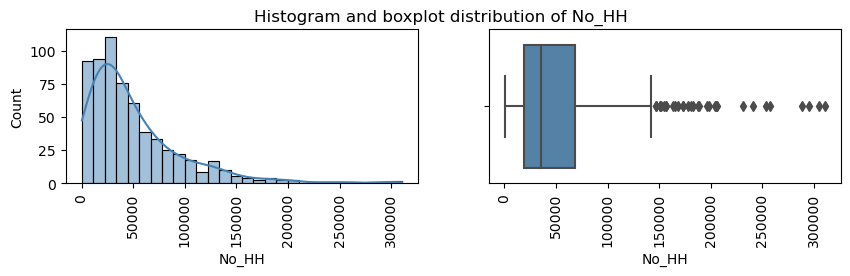

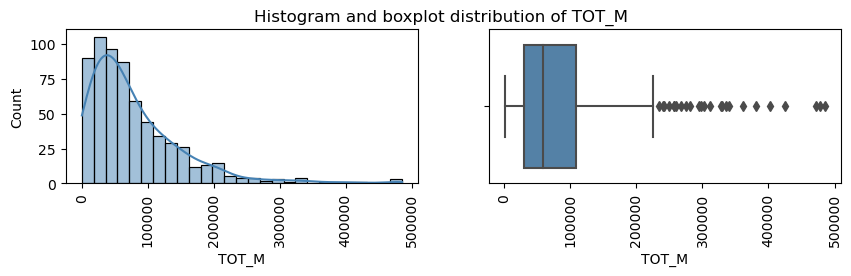

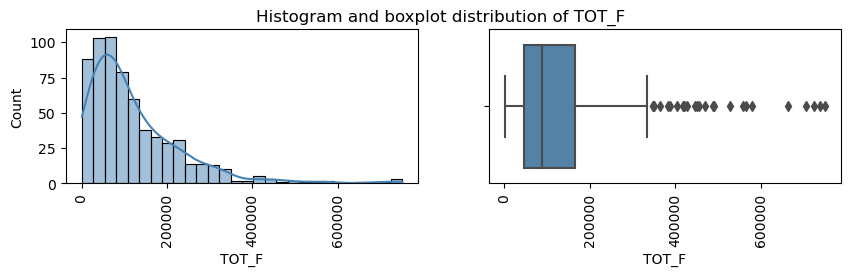

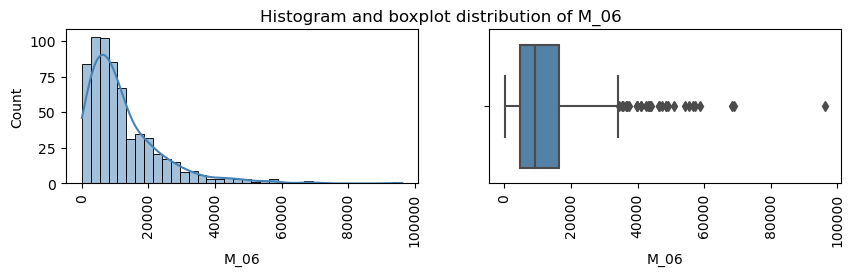

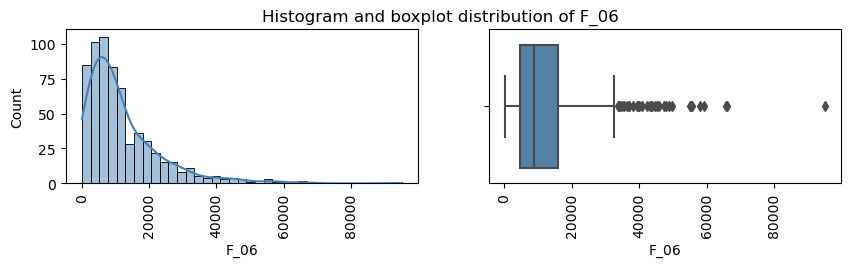

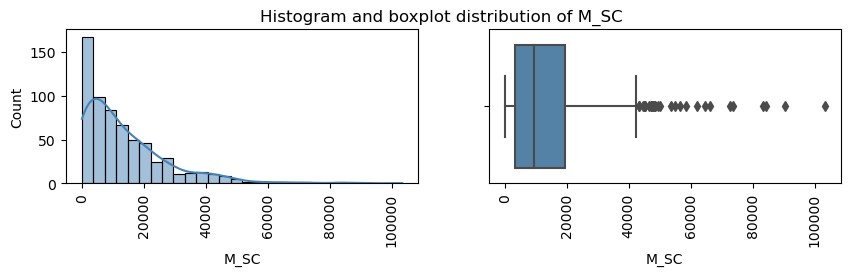

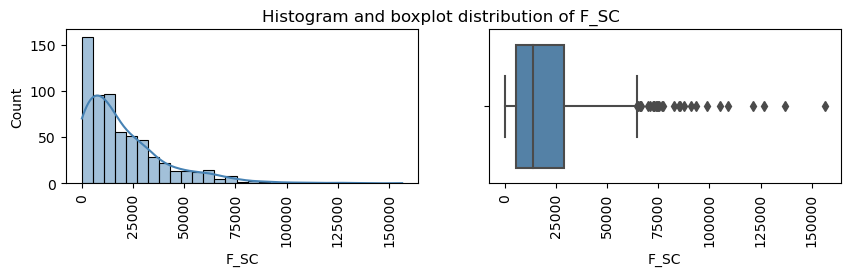

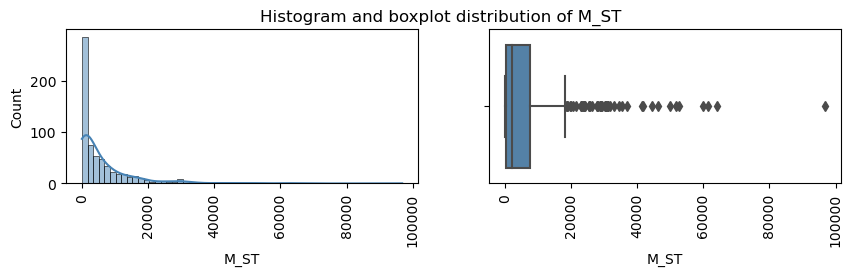

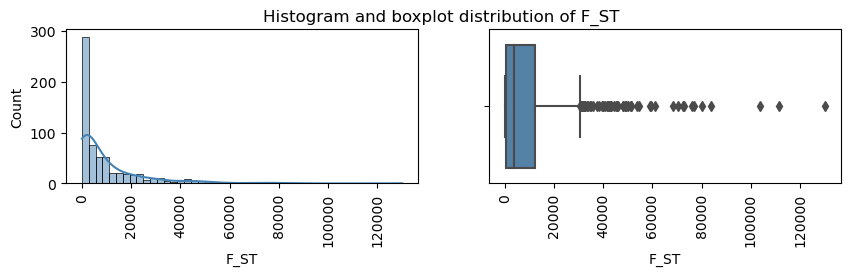

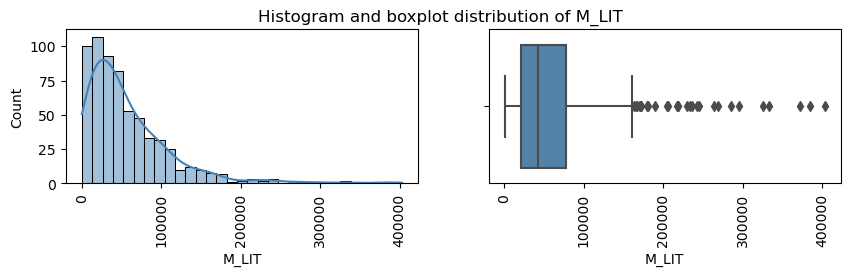

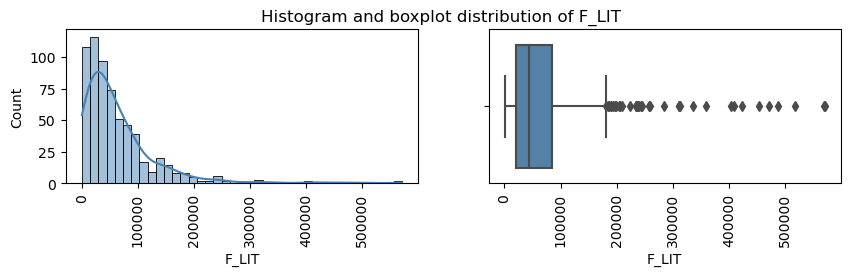

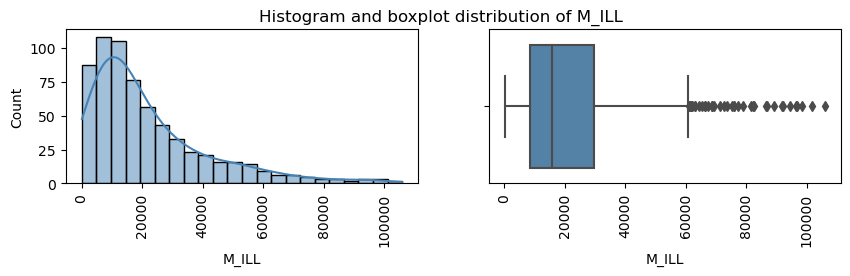

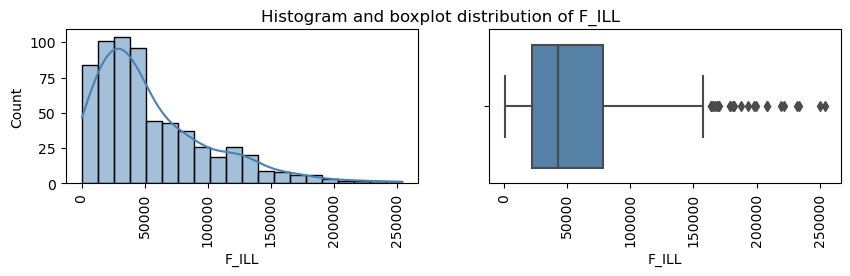

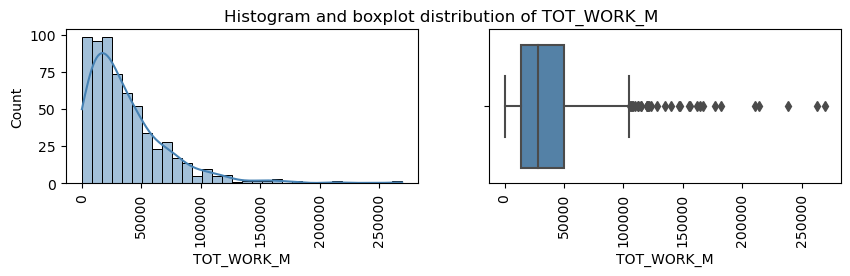

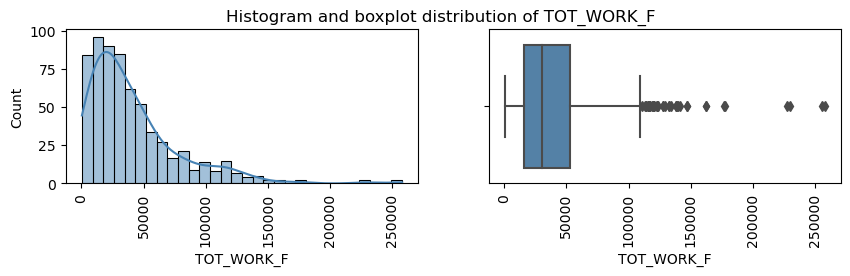

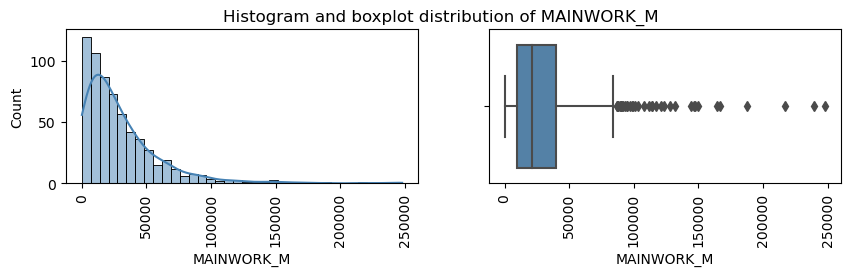

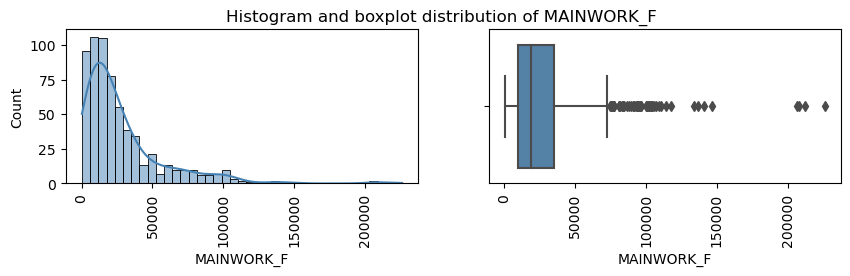

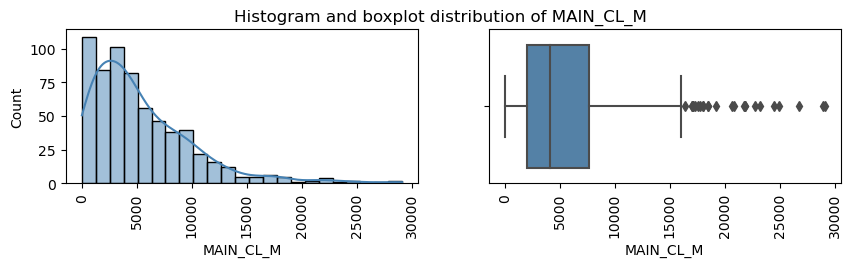

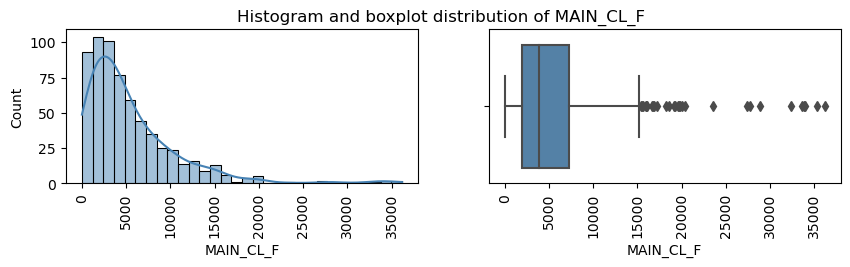

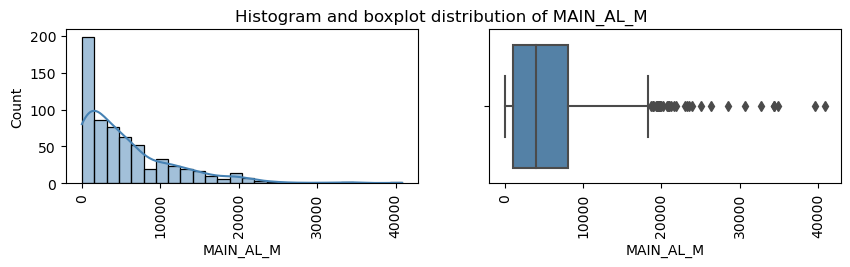

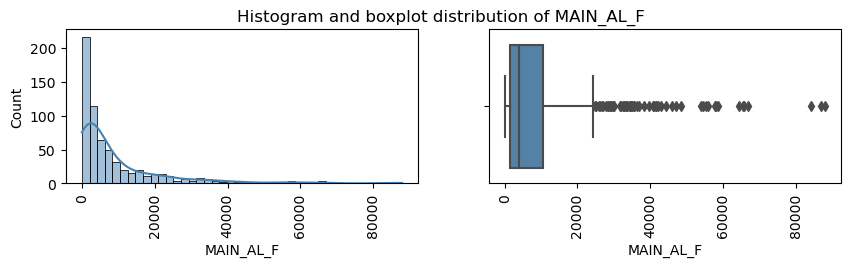

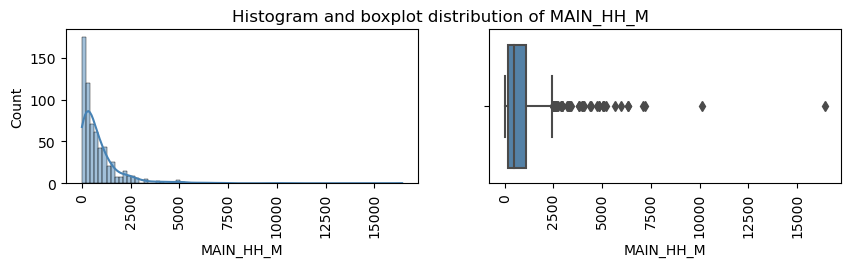

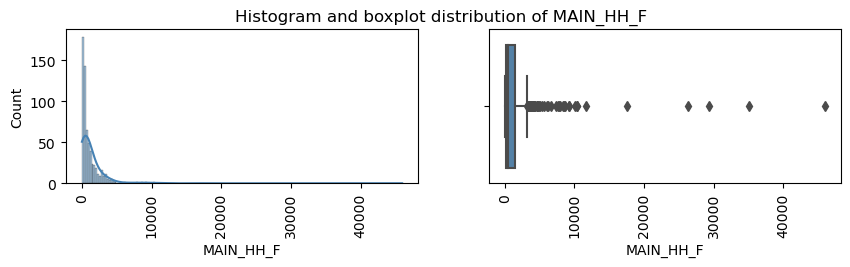

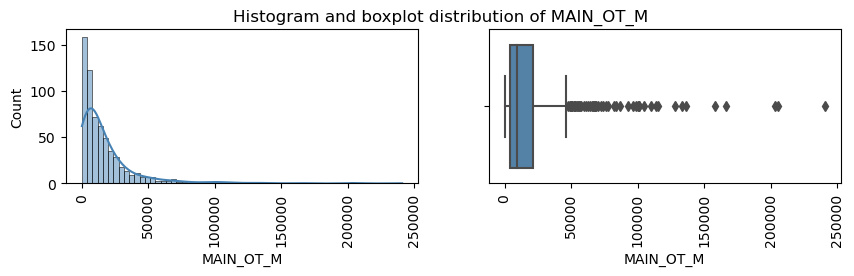

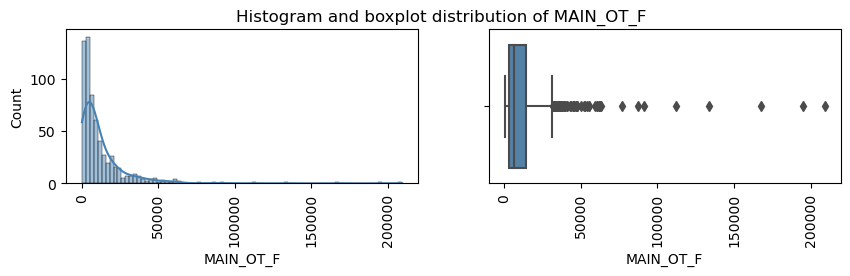

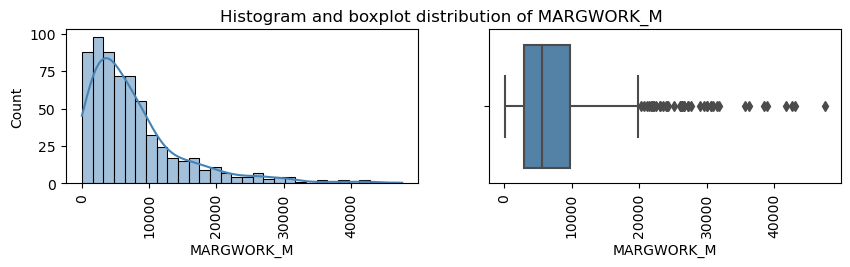

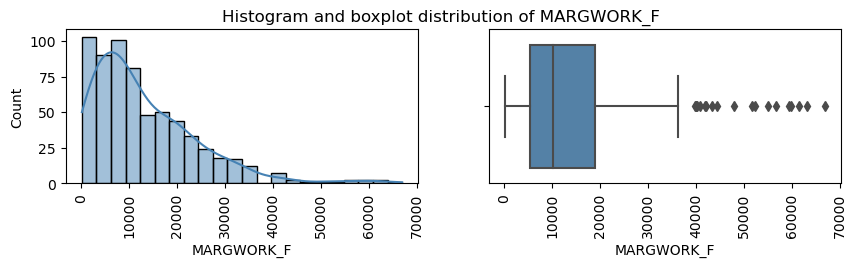

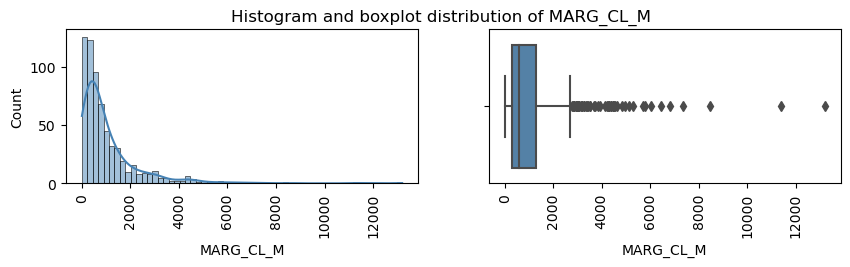

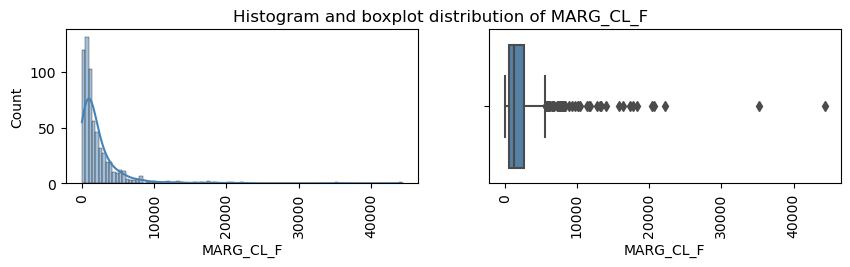

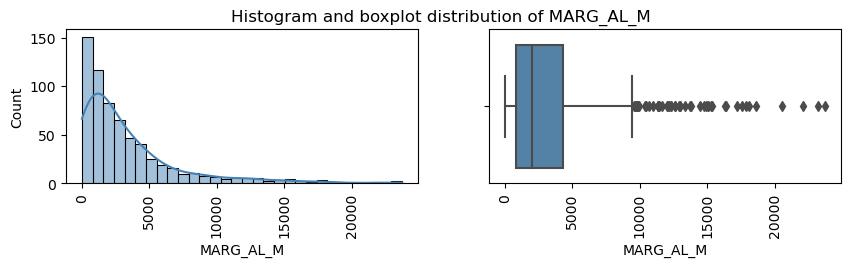

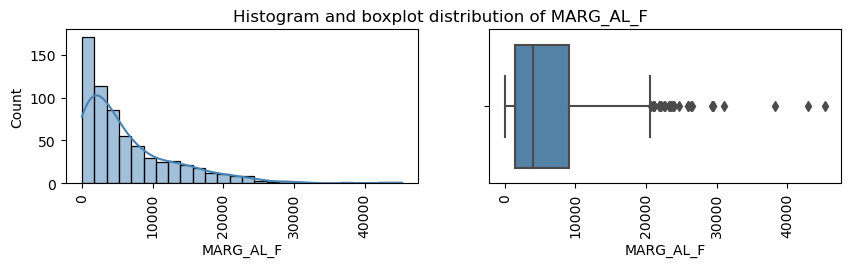

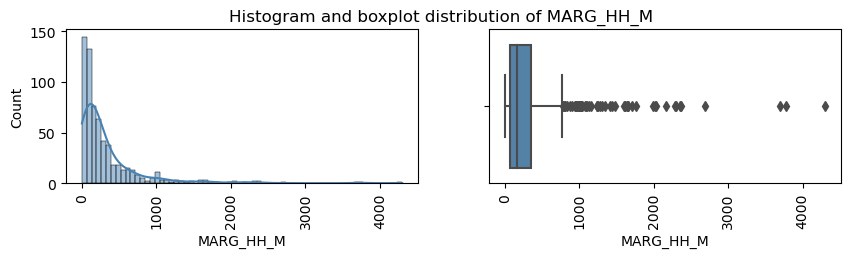

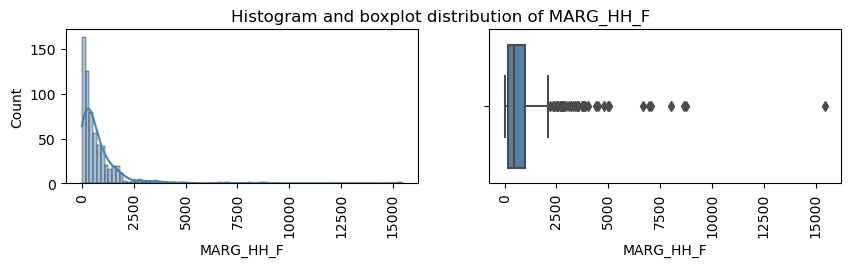

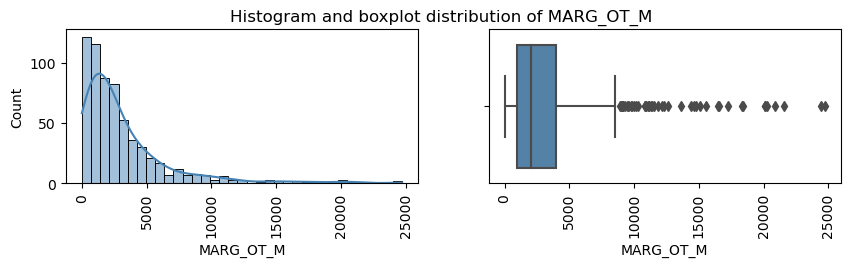

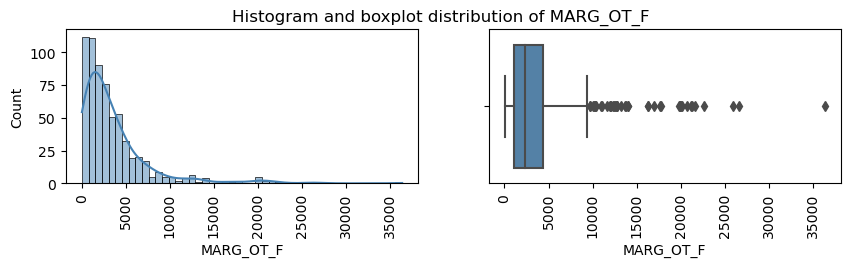

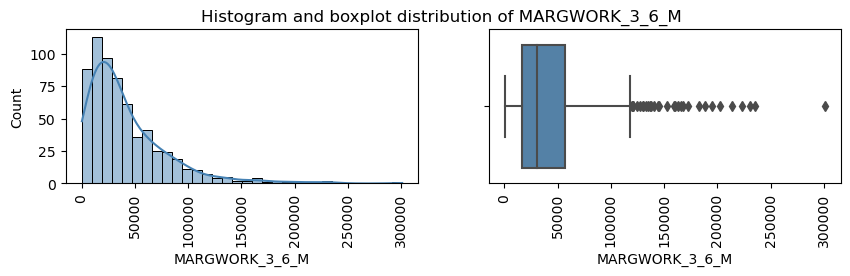

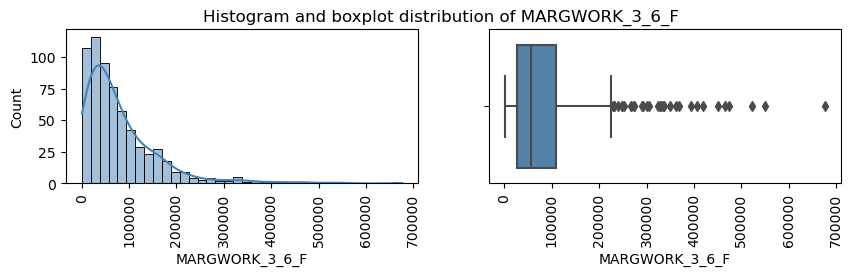

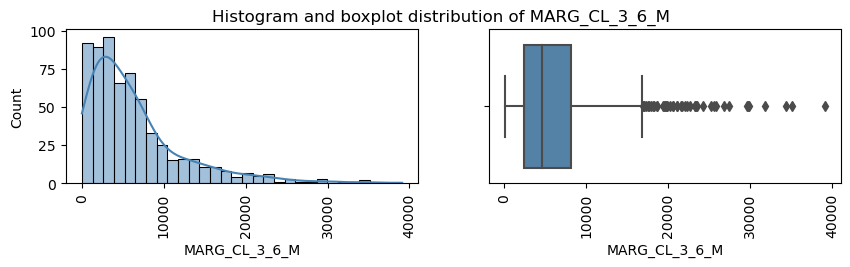

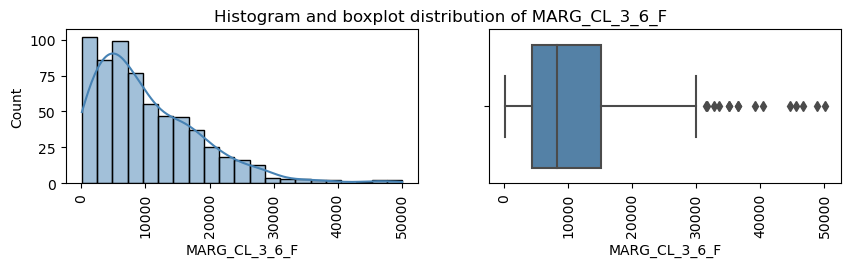

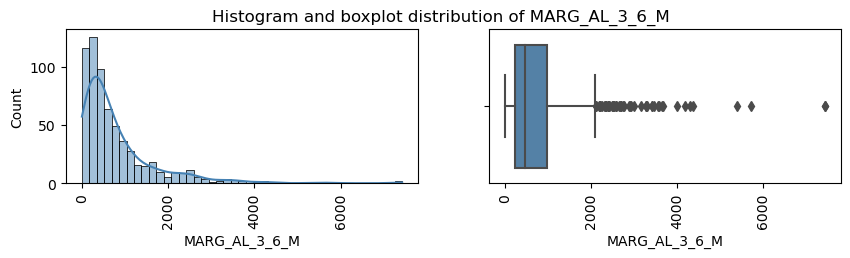

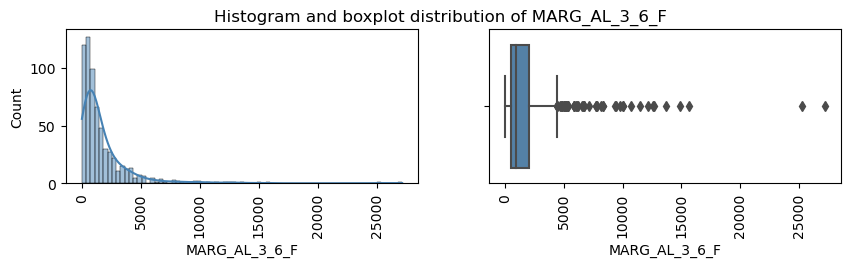

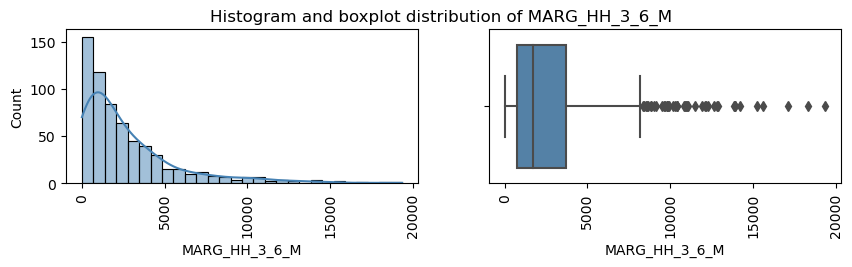

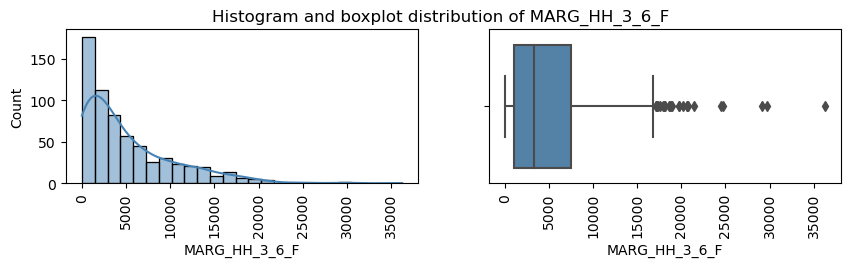

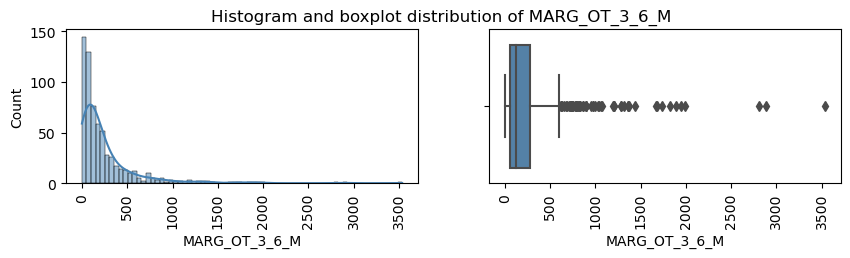

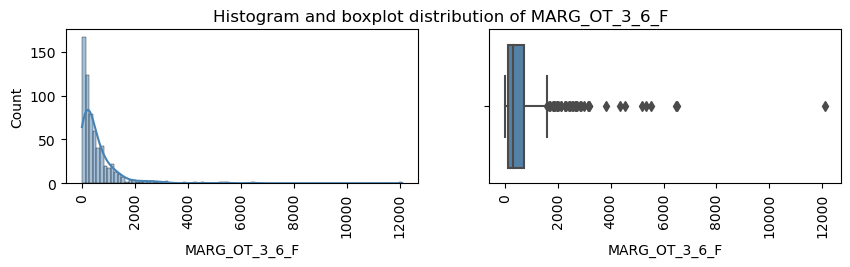

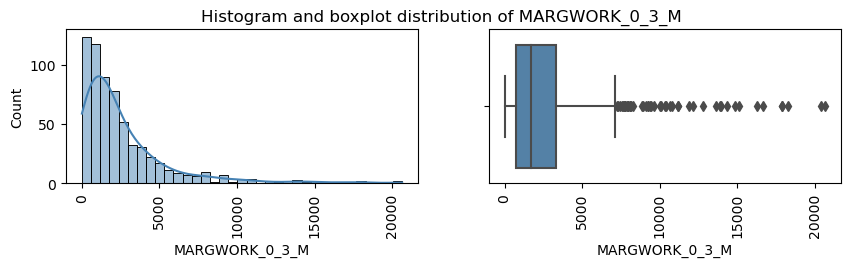

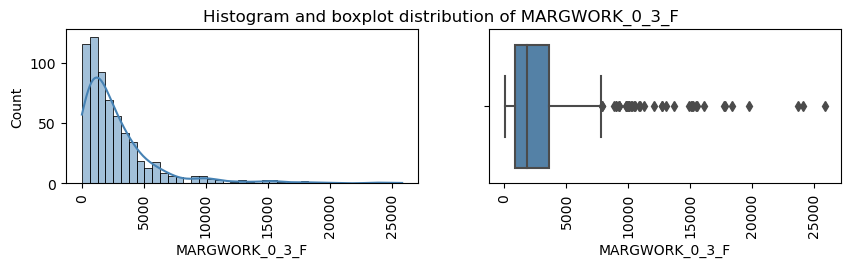

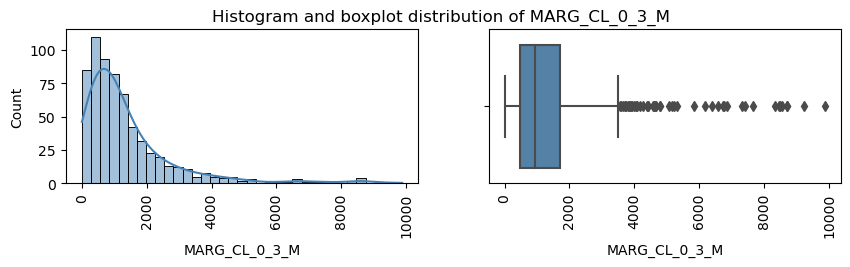

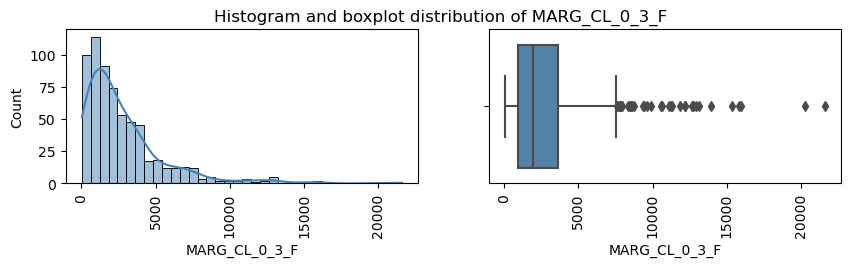

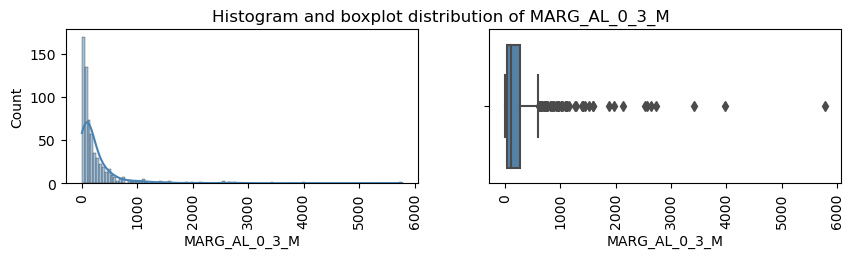

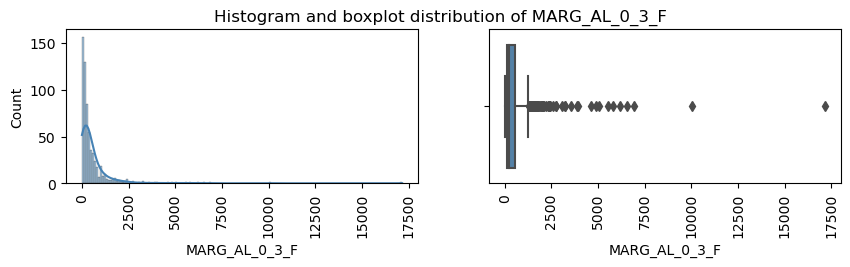

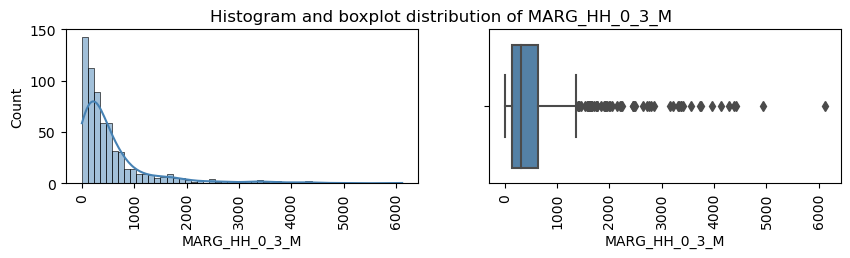

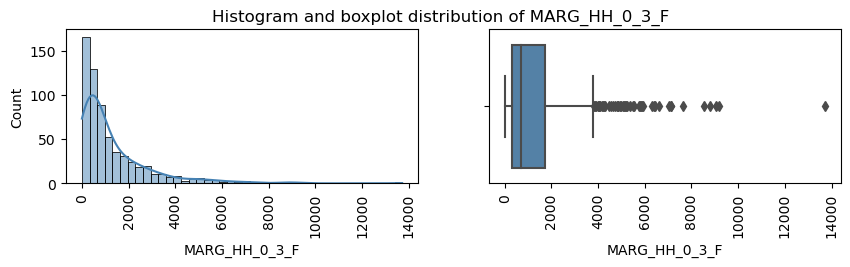

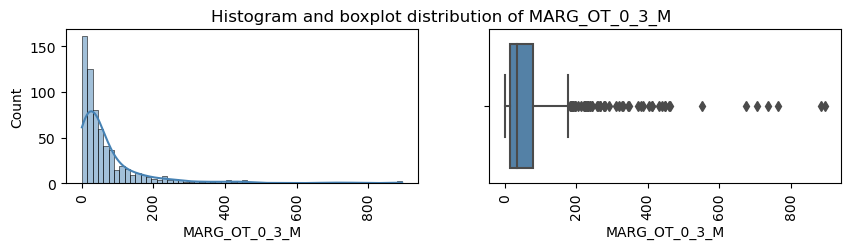

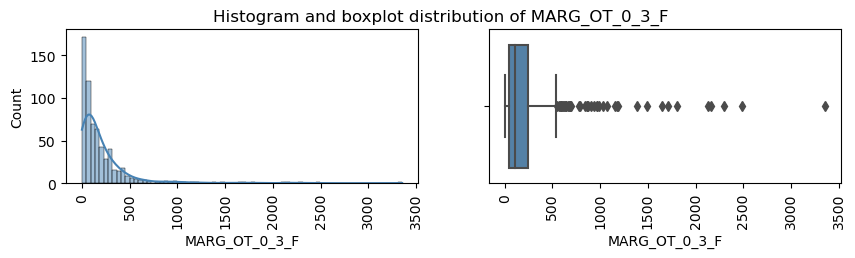

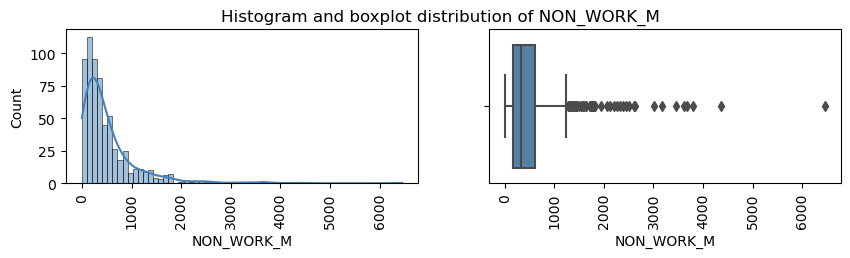

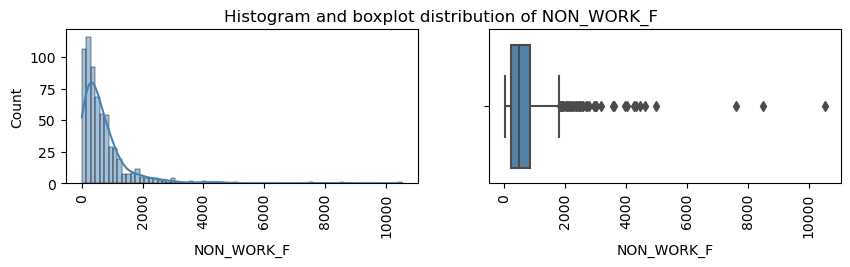

In [860]:
for col in census_num:
    univar_analysis_num(col)

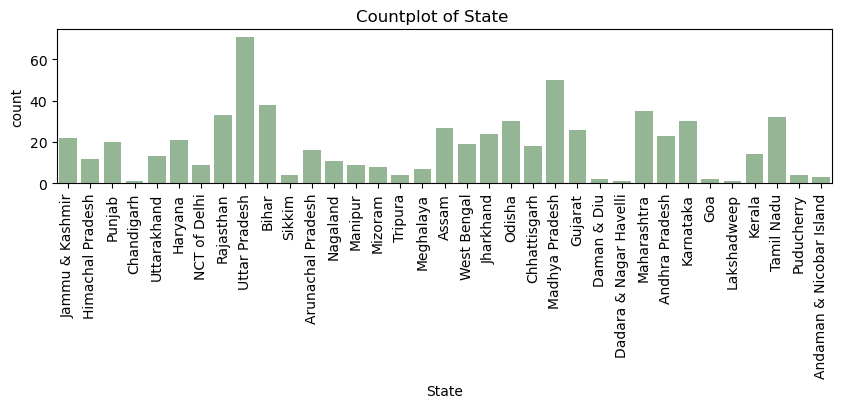

In [861]:
plt.figure(figsize=(10,2))
plt.suptitle('Countplot of State')
sns.countplot(x=census_cat['State'],color='darkseagreen')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.show()

#### Bivariate Analysis

In [459]:
cor=census_num.corr()

<AxesSubplot:>

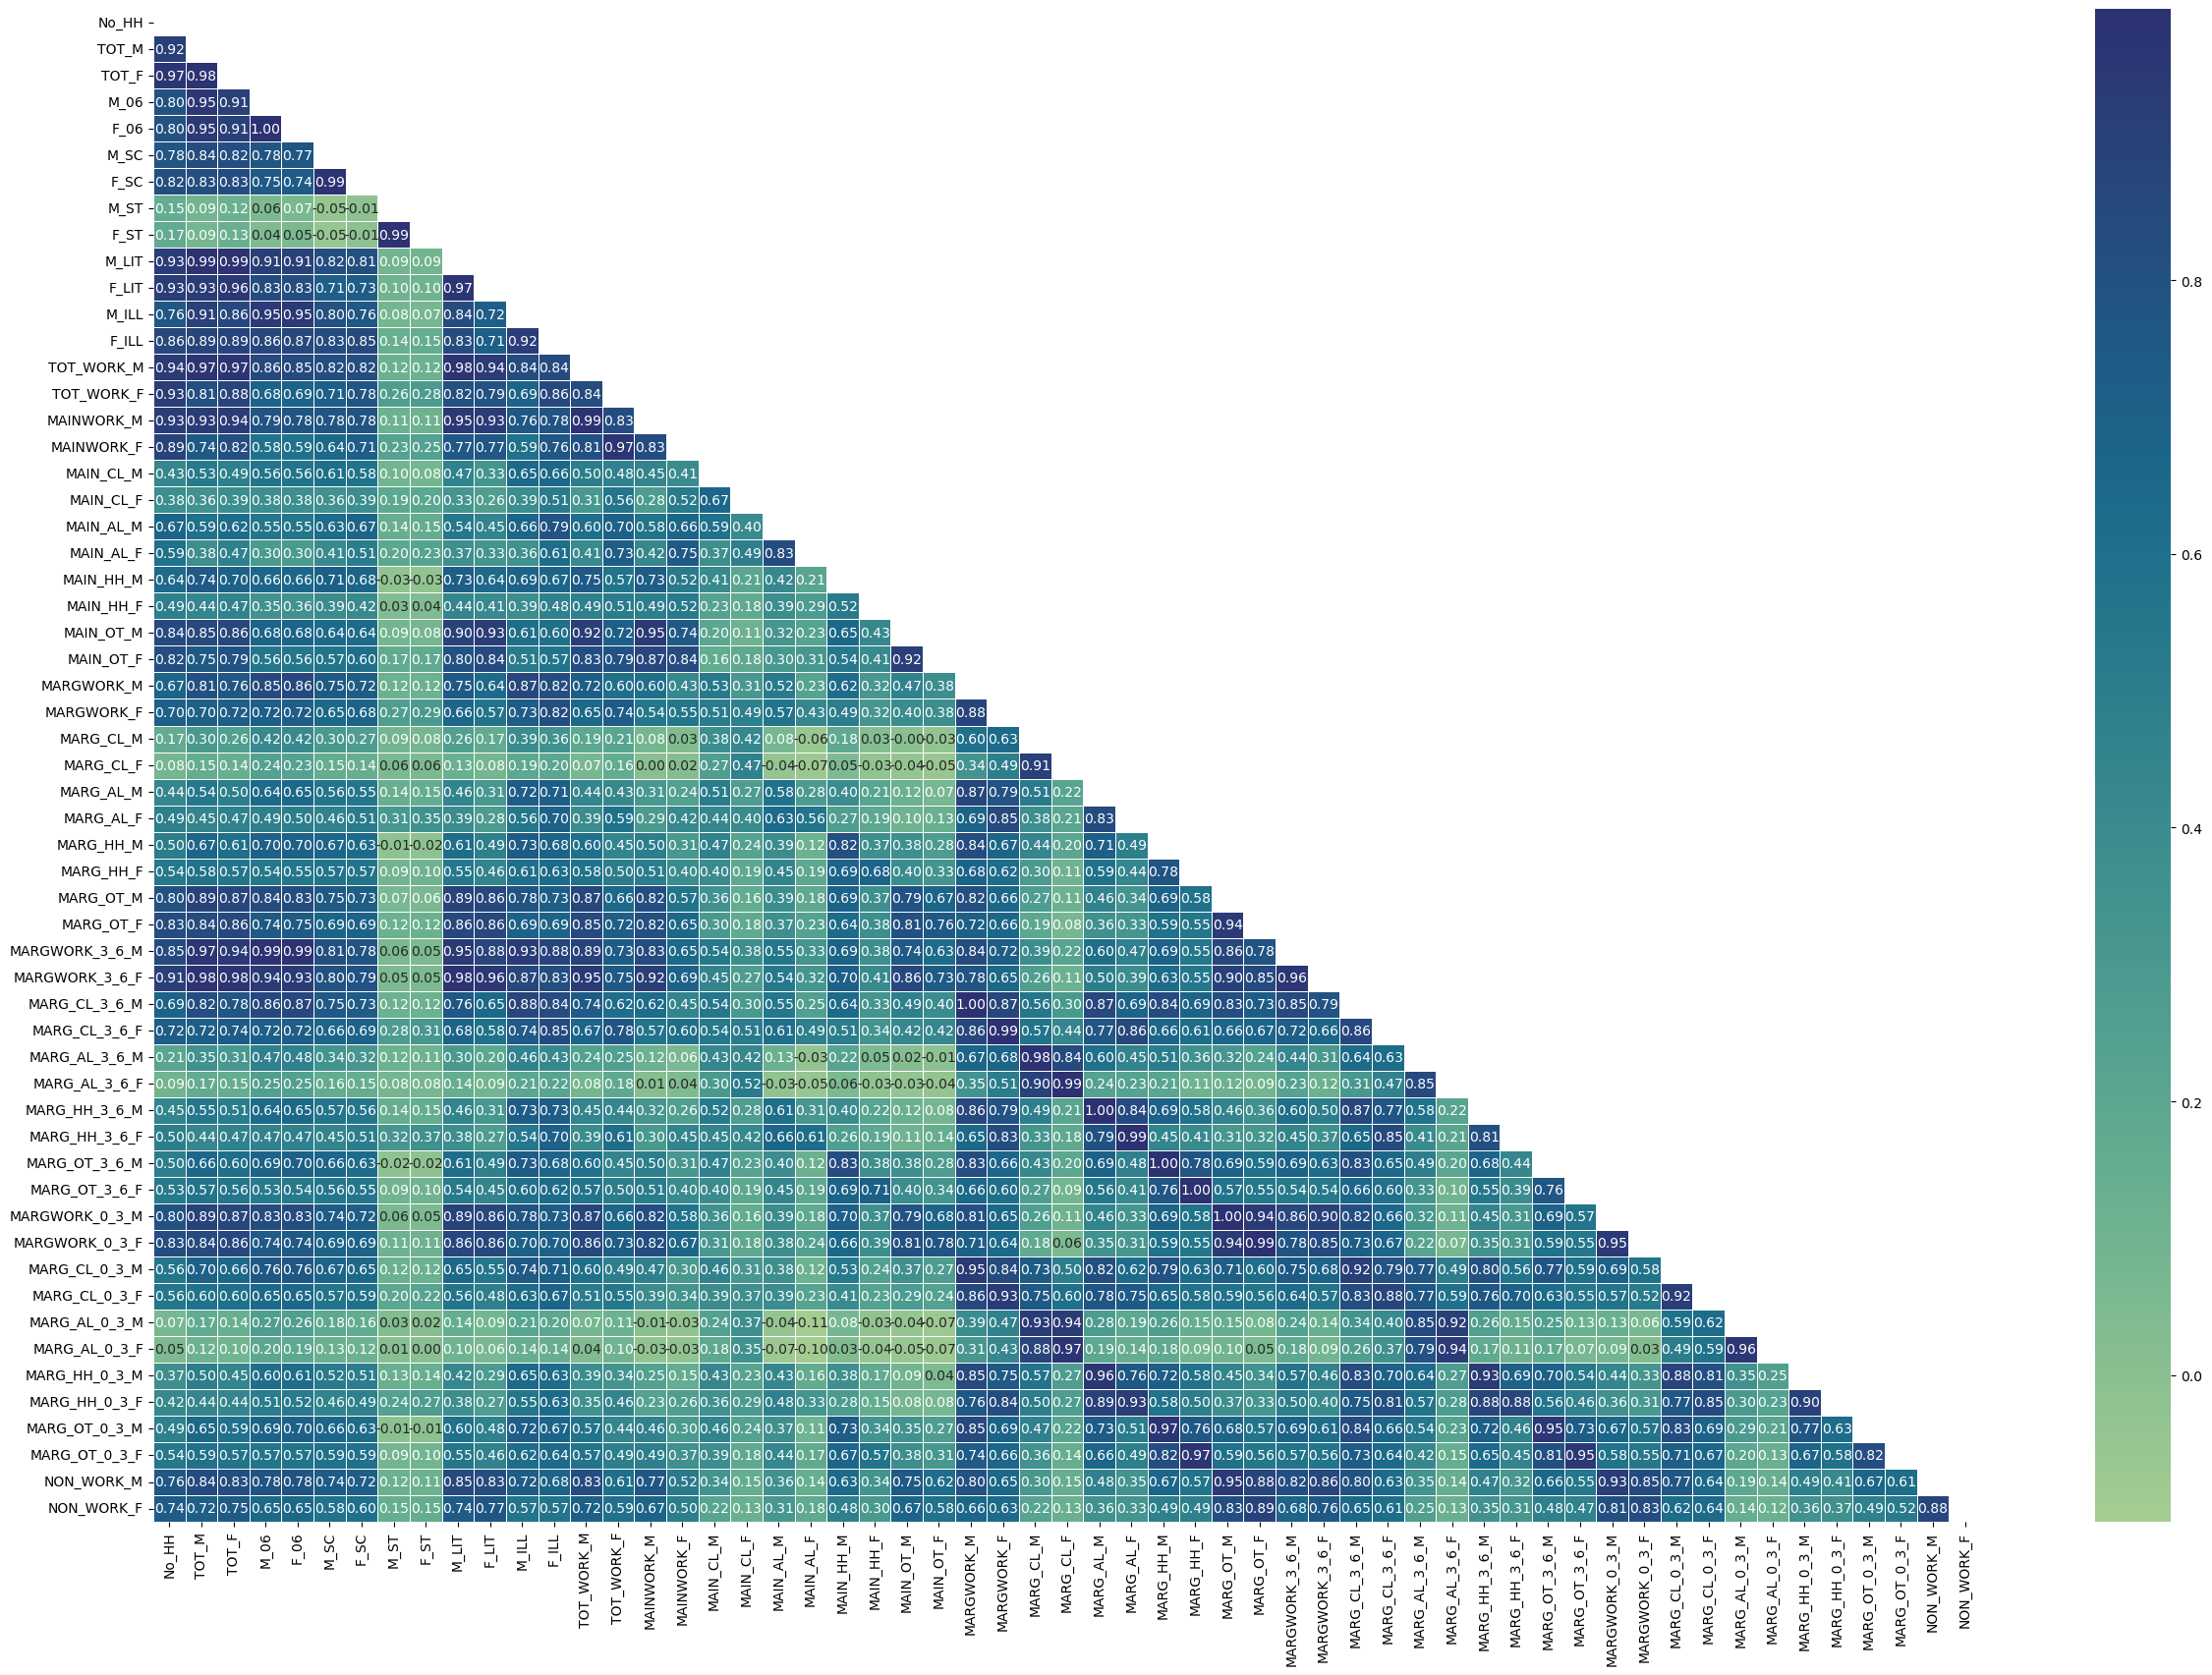

In [469]:
mask=np.triu(np.ones_like(cor,dtype=bool))
plt.figure(figsize=(30,20))
sns.heatmap(cor,annot=True,fmt='.2f',mask=mask,cmap='crest',linewidths=0.5)

Observations:
- A lot of variables are highly correlated, as indicated by the dark blue areas of the above heatmap
- For example, margwork_hh_m and marg_ot_3-6m,  marg_ot_m, margword_0-3_m etc

In [472]:
df=census.copy()

In [598]:
df['Population']=df['TOT_F']+df['TOT_M']-(df['M_06']+df['F_06'])
df['Lit']=df['M_LIT']+df['F_LIT']
df['Illiterate']=df['M_ILL']+df['F_ILL']
df['Working']=df['TOT_WORK_F']+df['TOT_WORK_M']
df['Non_work']=df['NON_WORK_F']+df['NON_WORK_M']
df['Mainwork']=df['MAINWORK_F']+df['MAINWORK_M']
df['Cultivator']=df['MAIN_CL_M']+df['MAIN_CL_F']
df['Agriculture_labourer']=df['MAIN_AL_F']+df['MAIN_AL_M']
df['Agri_related']=df['Cultivator']+df['Agriculture_labourer']
df['Household']=df['MAIN_HH_F']+df['MAIN_HH_M']
df['other']=df['MAIN_OT_F']+df['MAIN_OT_M']
df['SC/ST']=df['M_SC']+df['F_SC']+df['M_ST']+df['F_ST']
df['Tot_pop']=df['TOT_F']+df['TOT_M']

In [608]:
df['Gender_ratio']=df['TOT_F']/df['TOT_M']
df['Illiteracy ratio']=df['Illiterate']/df['Population']
df['Literacy ratio']=df['Lit']/df['Population']
df['Agri_ratio']=df['Agri_related']/df['Mainwork']
df['Working_ratio']=df['Working']/df['Population']
df['Female Literacy']=df['F_LIT']/df['TOT_F']
df['Male Literacy']=df['M_LIT']/df['TOT_M']
df['Female Working']=df['TOT_WORK_F']/df['TOT_F']
df['Female Illiteracy']=df['F_ILL']/df['TOT_F']
df['Minority ratio']=df['SC/ST']/df['Tot_pop']
df['Children_gender_ratio']=df['F_06']/df['M_06']

##### Gender Related

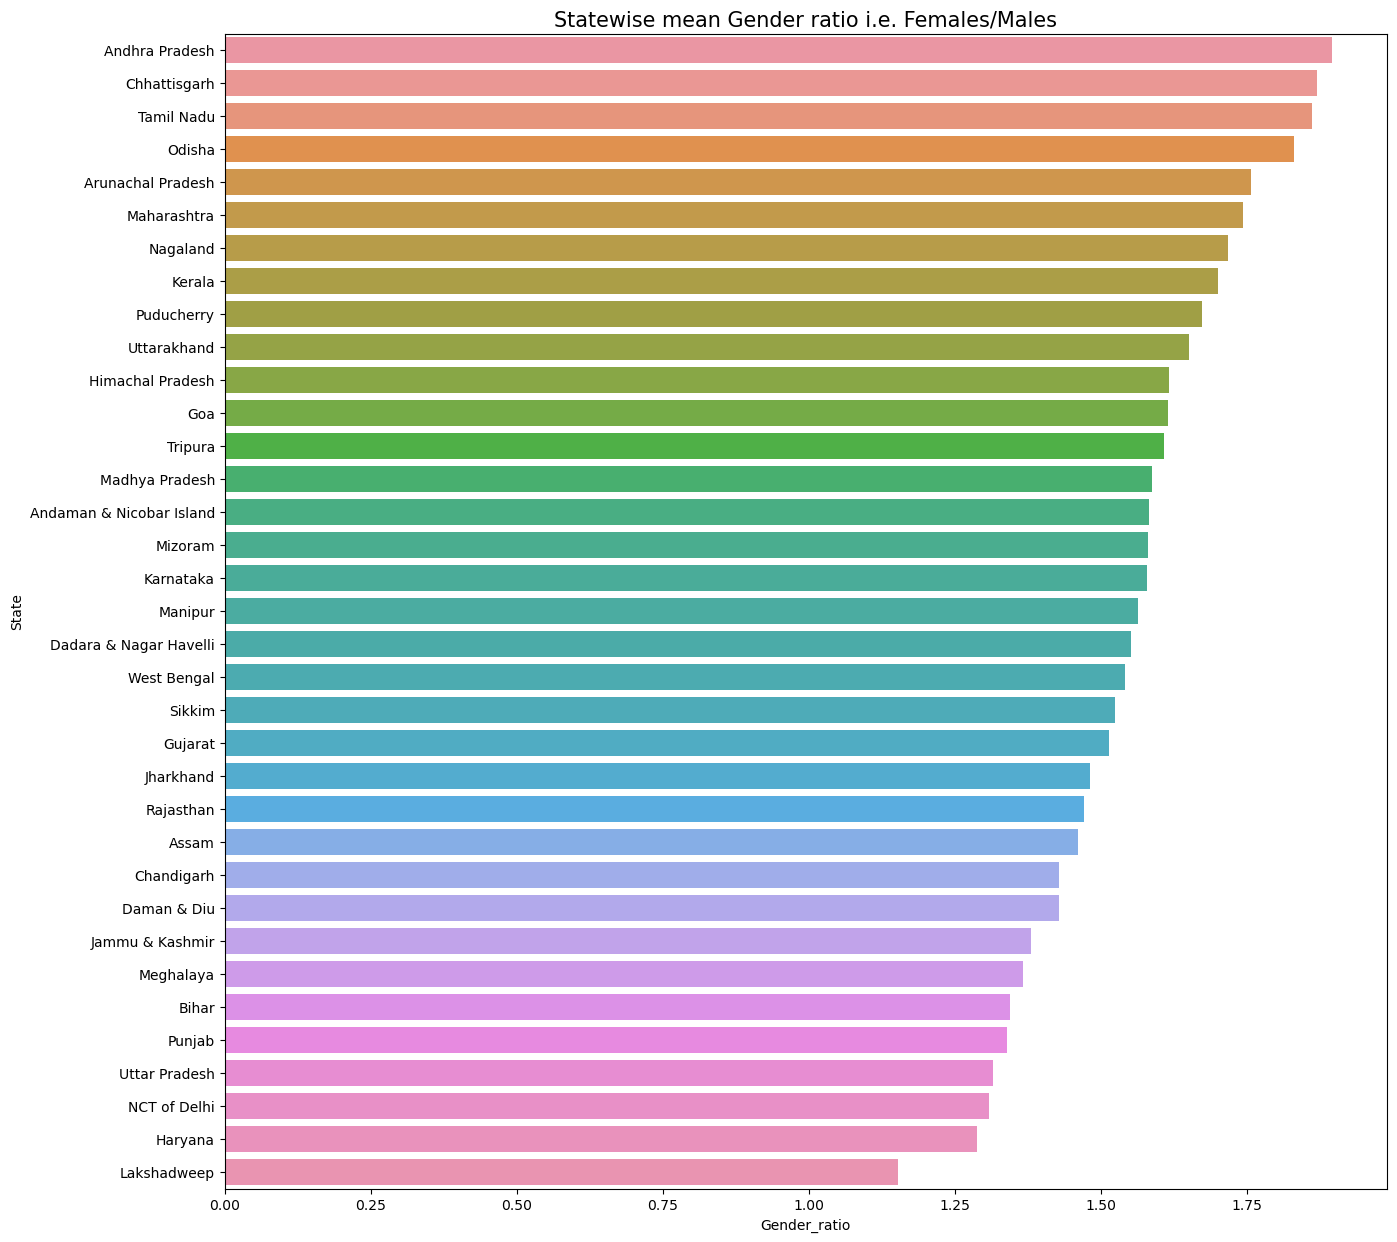

In [536]:
#Which state has the highest and lowest mean gender ratio?
ind=df.groupby('State')['Gender_ratio'].mean().sort_values(ascending=False).index
grp1=df.groupby('State')['Gender_ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp1['Gender_ratio'],y=grp1['State'],order=ind)
plt.title('Statewise mean Gender ratio i.e. Females/Males',fontsize=15);

Observations:
- Andhra Pradesh has the highest mean ratio of females to males and Lakshadweep has the lowest

In [528]:
#Which district has the highest and lowest gender ratio?
max_g=df['Gender_ratio'].max()
print('The District with the highest gender ratio is :\n',df[df['Gender_ratio']==max_g]['Area Name'])

The District with the highest gender ratio is :
 546    Krishna
Name: Area Name, dtype: object


In [529]:
min_g=df['Gender_ratio'].min()
print('The District with the lowest gender ratio is :\n',df[df['Gender_ratio']==max_g]['Area Name'])

The District with the lowest gender ratio is :
 546    Krishna
Name: Area Name, dtype: object


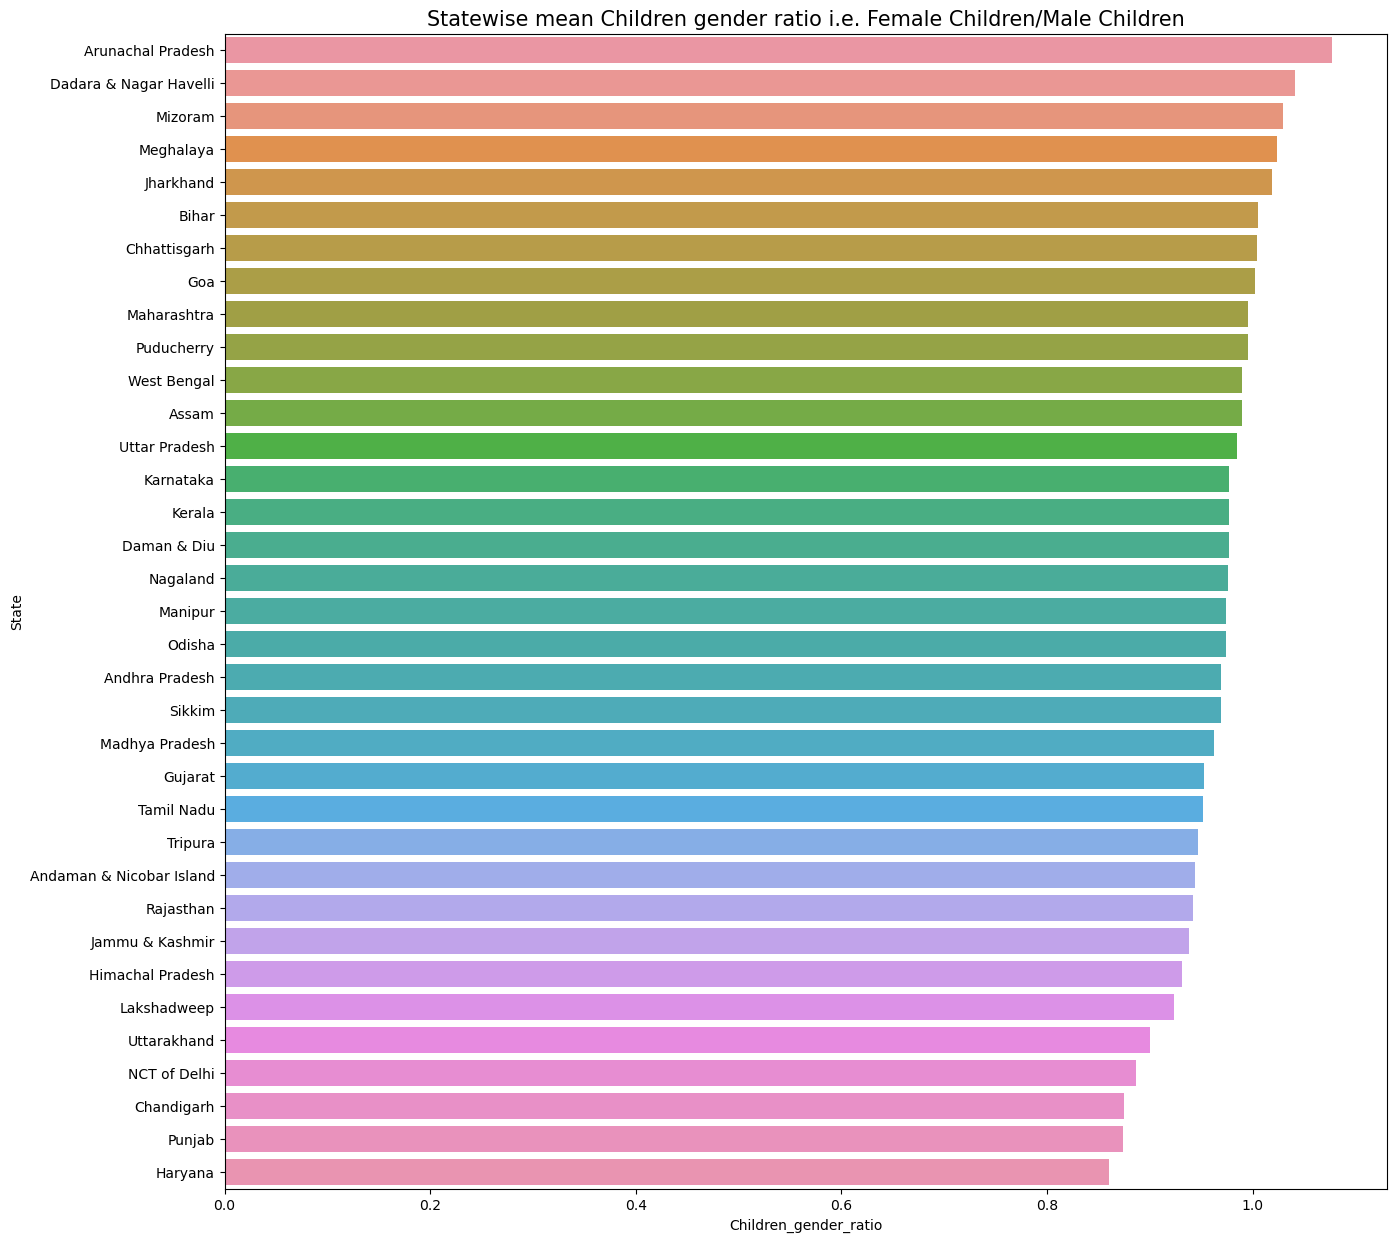

In [563]:
#Gender ratio among childern
#Which state has the highest and lowest mean child gender ratio?
ind=df.groupby('State')['Children_gender_ratio'].mean().sort_values(ascending=False).index
grp4=df.groupby('State')['Children_gender_ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp4['Children_gender_ratio'],y=grp4['State'],order=ind)
plt.title('Statewise mean Children gender ratio i.e. Female Children/Male Children',fontsize=15);

Observations:
- States like Meghalaya, Bihar, Uttar Pradesh etc, which had lower Adult gender ratios as compared to other states, have improved gender ratios among children w.r.t. other states.
- However, on the whole, the mean children gender ratio is lower than the adult mean gender ratio

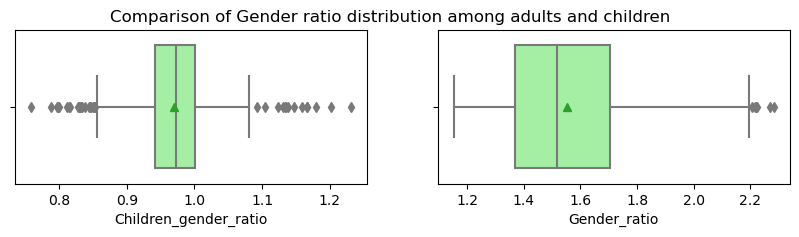

In [565]:
#Boxplot distribution of Gender ratio among adults and children(below 6 yrs of age)
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.boxplot(x=df['Children_gender_ratio'],color='palegreen',showmeans=True)
plt.subplot(1,2,2)
sns.boxplot(x=df['Gender_ratio'],color='palegreen',showmeans=True)
plt.suptitle('Comparison of Gender ratio distribution among adults and children');

##### Literacy related

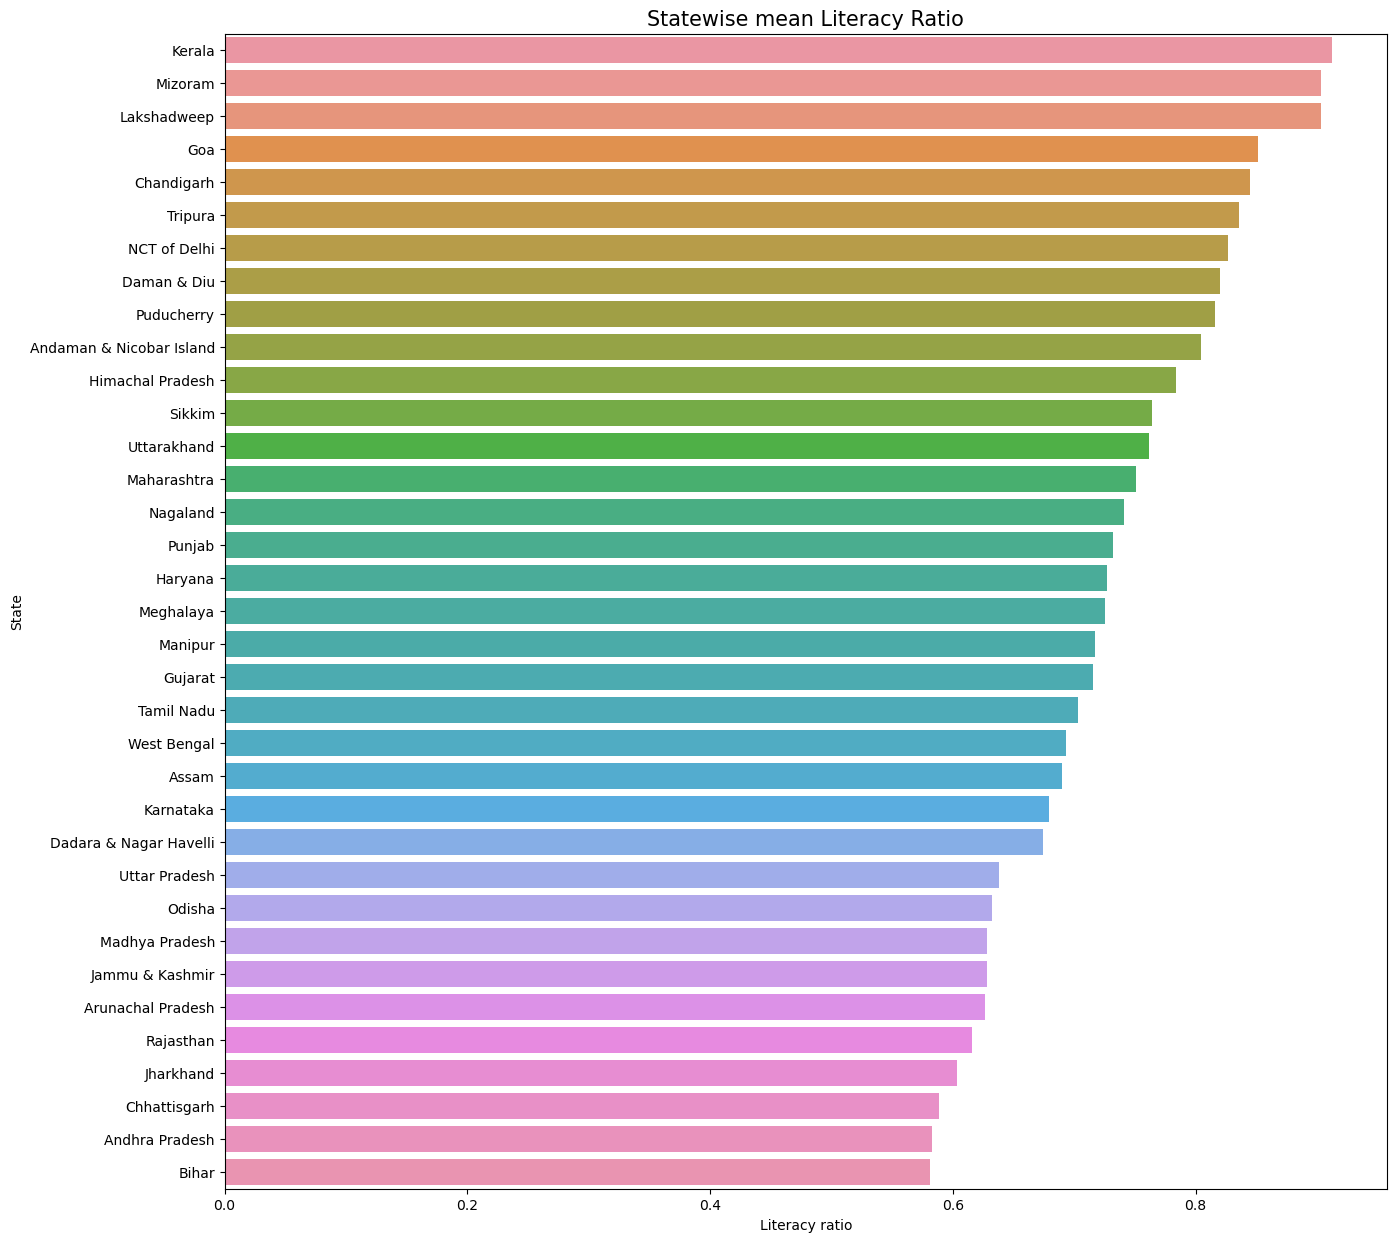

In [534]:
#Which state has the highest and lowest mean literacy rate?
ind=df.groupby('State')['Literacy ratio'].mean().sort_values(ascending=False).index
grp2=df.groupby('State')['Literacy ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp2['Literacy ratio'],y=grp2['State'],order=ind)
plt.title('Statewise mean Literacy Ratio',fontsize=15);

Observations:
- Kerala has the highest and Bihar has the lowest literacy ratio   

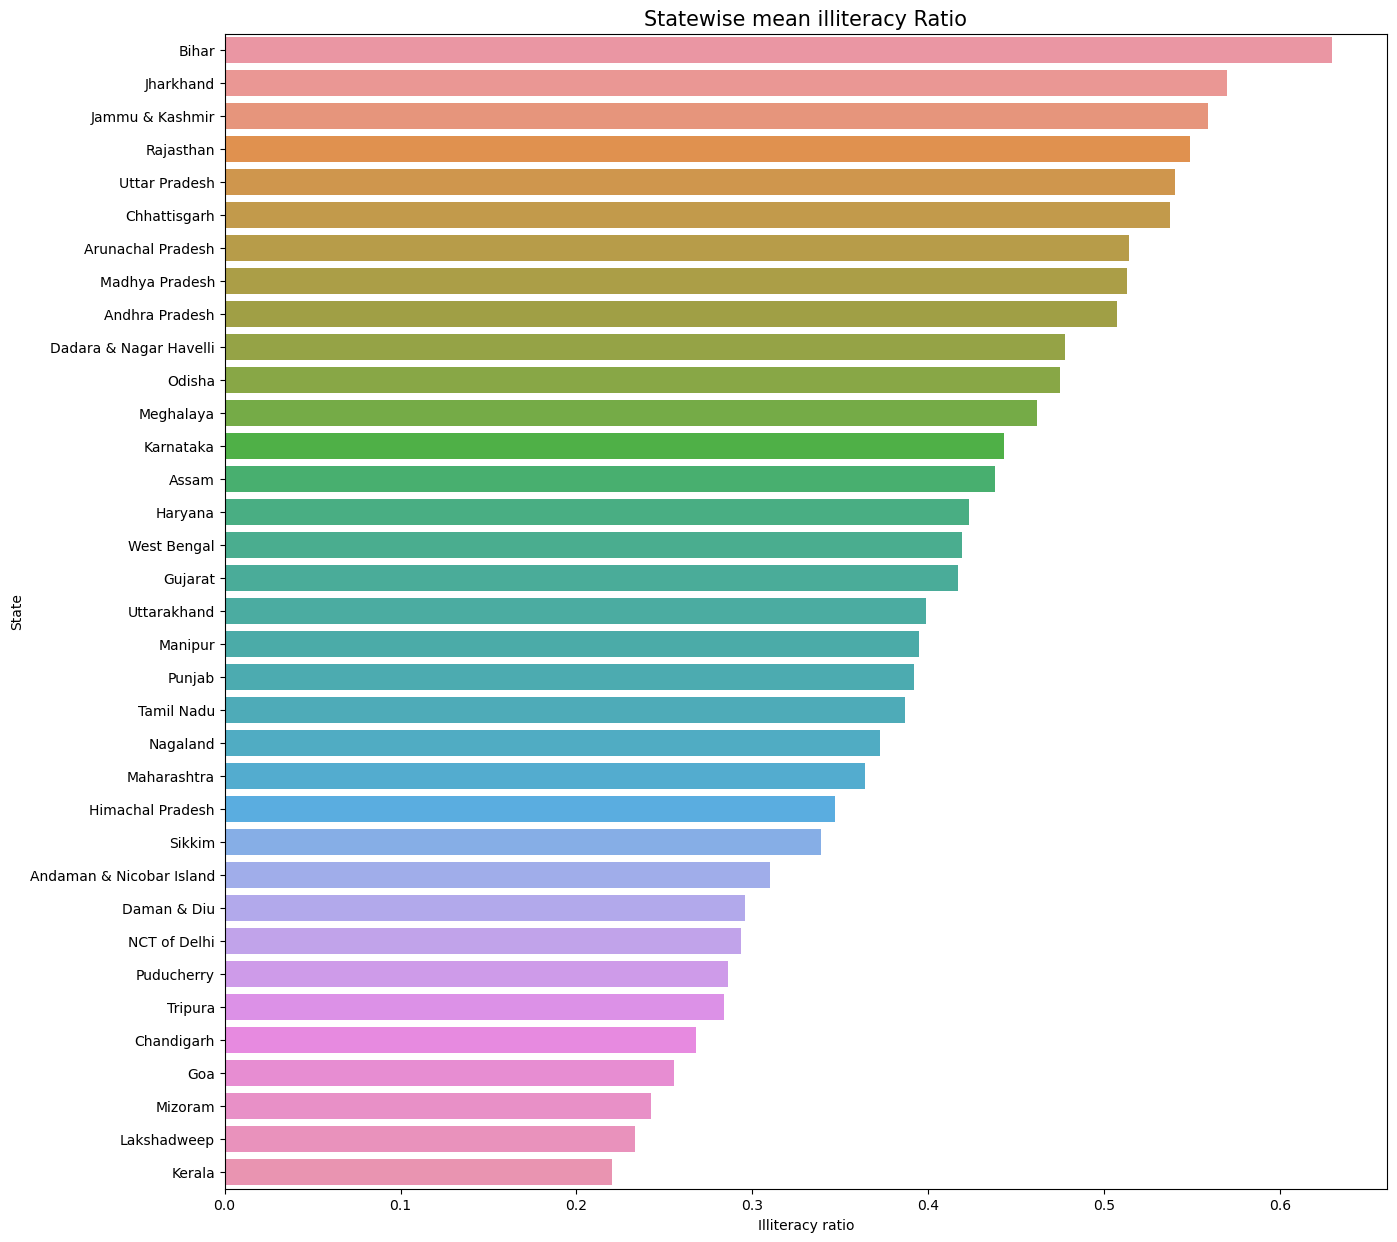

In [607]:
#Which state has the highest and lowest mean illiteracy rate?
ind=df.groupby('State')['Illiteracy ratio'].mean().sort_values(ascending=False).index
grp8=df.groupby('State')['Illiteracy ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp8['Illiteracy ratio'],y=grp8['State'],order=ind)
plt.title('Statewise mean illiteracy Ratio',fontsize=15);

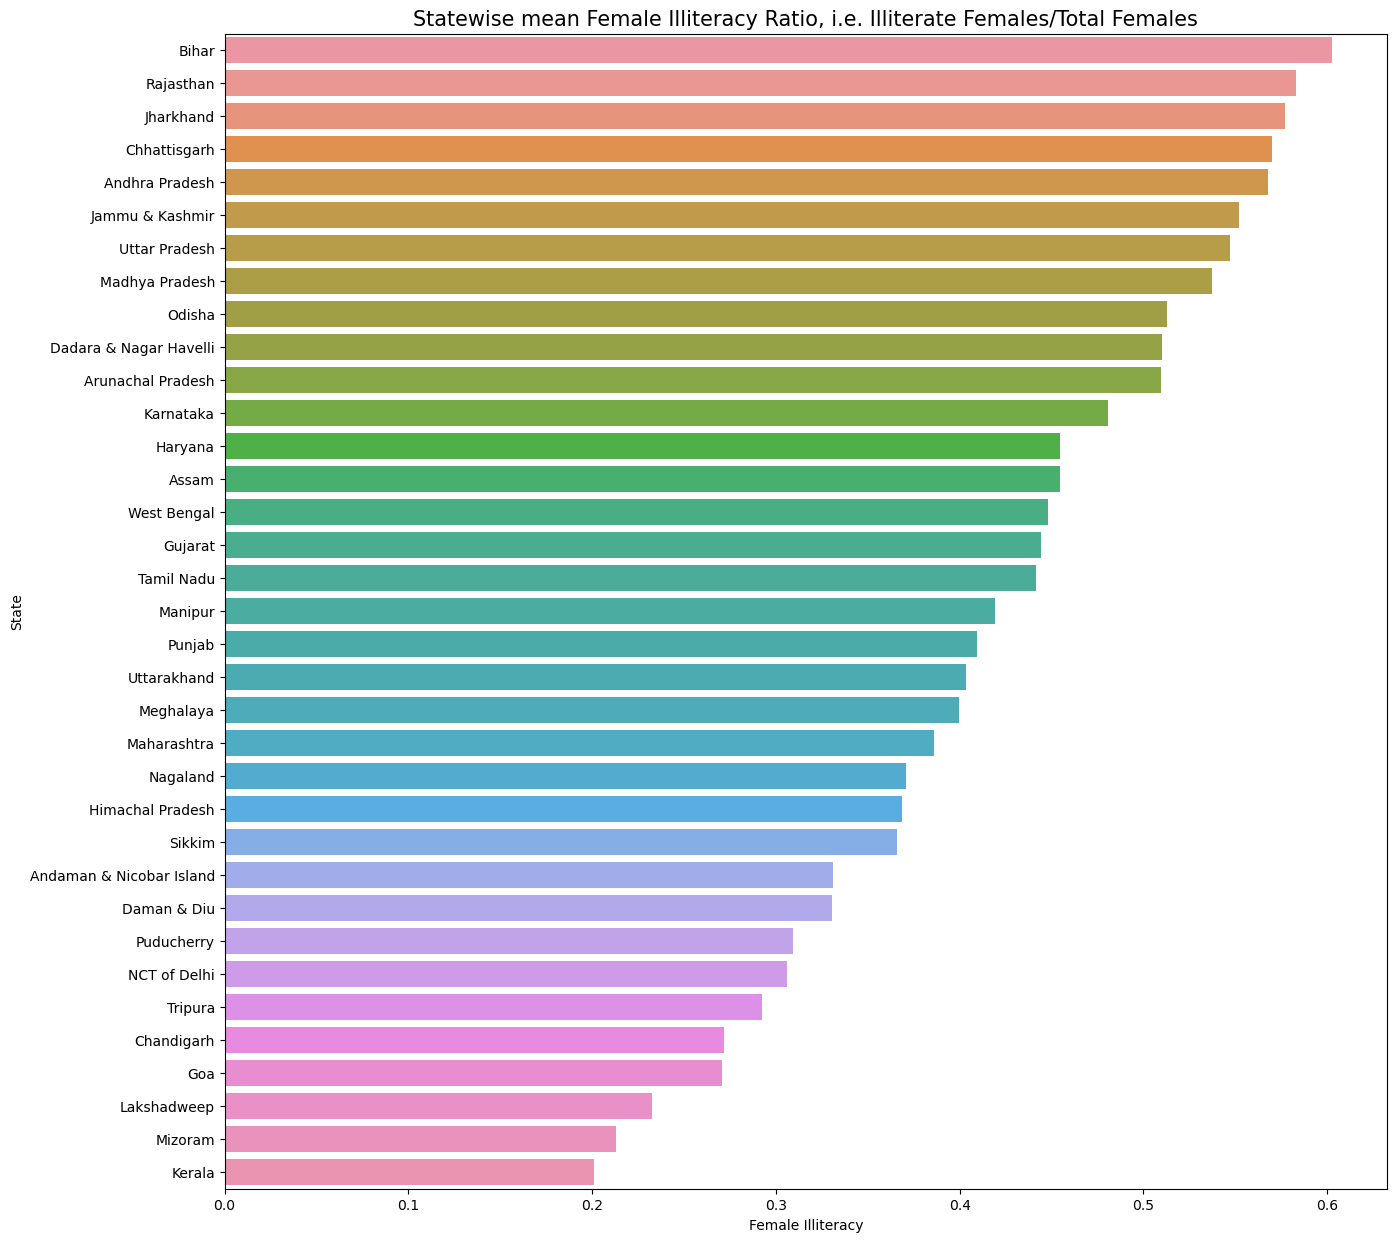

In [540]:
#Which state has the highest and lowest mean female illiteracy rate?
ind=df.groupby('State')['Female Illiteracy'].mean().sort_values(ascending=False).index
grp3=df.groupby('State')['Female Illiteracy'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp3['Female Illiteracy'],y=grp3['State'],order=ind)
plt.title('Statewise mean Female Illiteracy Ratio, i.e. Illiterate Females/Total Females',fontsize=15);

Observations:
- Bihar has the highest illiteracy rate among females, close to 60%
- Kerala has the lowest, close to 20%

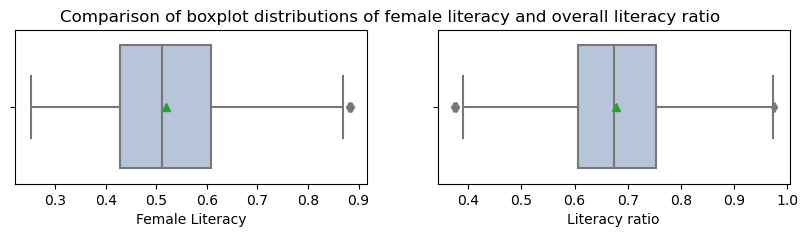

In [566]:
#Boxplot distribution of female literacy
plt.figure(figsize=(10,2))
plt.subplot(1,2,1)
sns.boxplot(x=df['Female Literacy'],color='lightsteelblue',showmeans=True)
plt.subplot(1,2,2)
sns.boxplot(x=df['Literacy ratio'],color='lightsteelblue',showmeans=True)
plt.suptitle('Comparison of boxplot distributions of female literacy and overall literacy ratio');

Observations:
- While the mean literacy ratio is close to 68%, the mean female literacy ratio is just above 50%
- This indicates that a large number of States still have high percentage of female illiteracy

In [548]:
#The number of states having lower than average female literacy ratio
f_lit_mean=df['Female Literacy'].mean()

In [553]:
nos=df[df['Female Literacy']<f_lit_mean]['Dist.Code'].nunique()

In [561]:
print('The number of districts having lower than average female literacy ratio is', nos,', which is {} % of the observed data'.format(round(((nos*100)/df.shape[0]),2)))

The number of districts having lower than average female literacy ratio is 345 , which is 53.91 % of the observed data


##### Occupation related

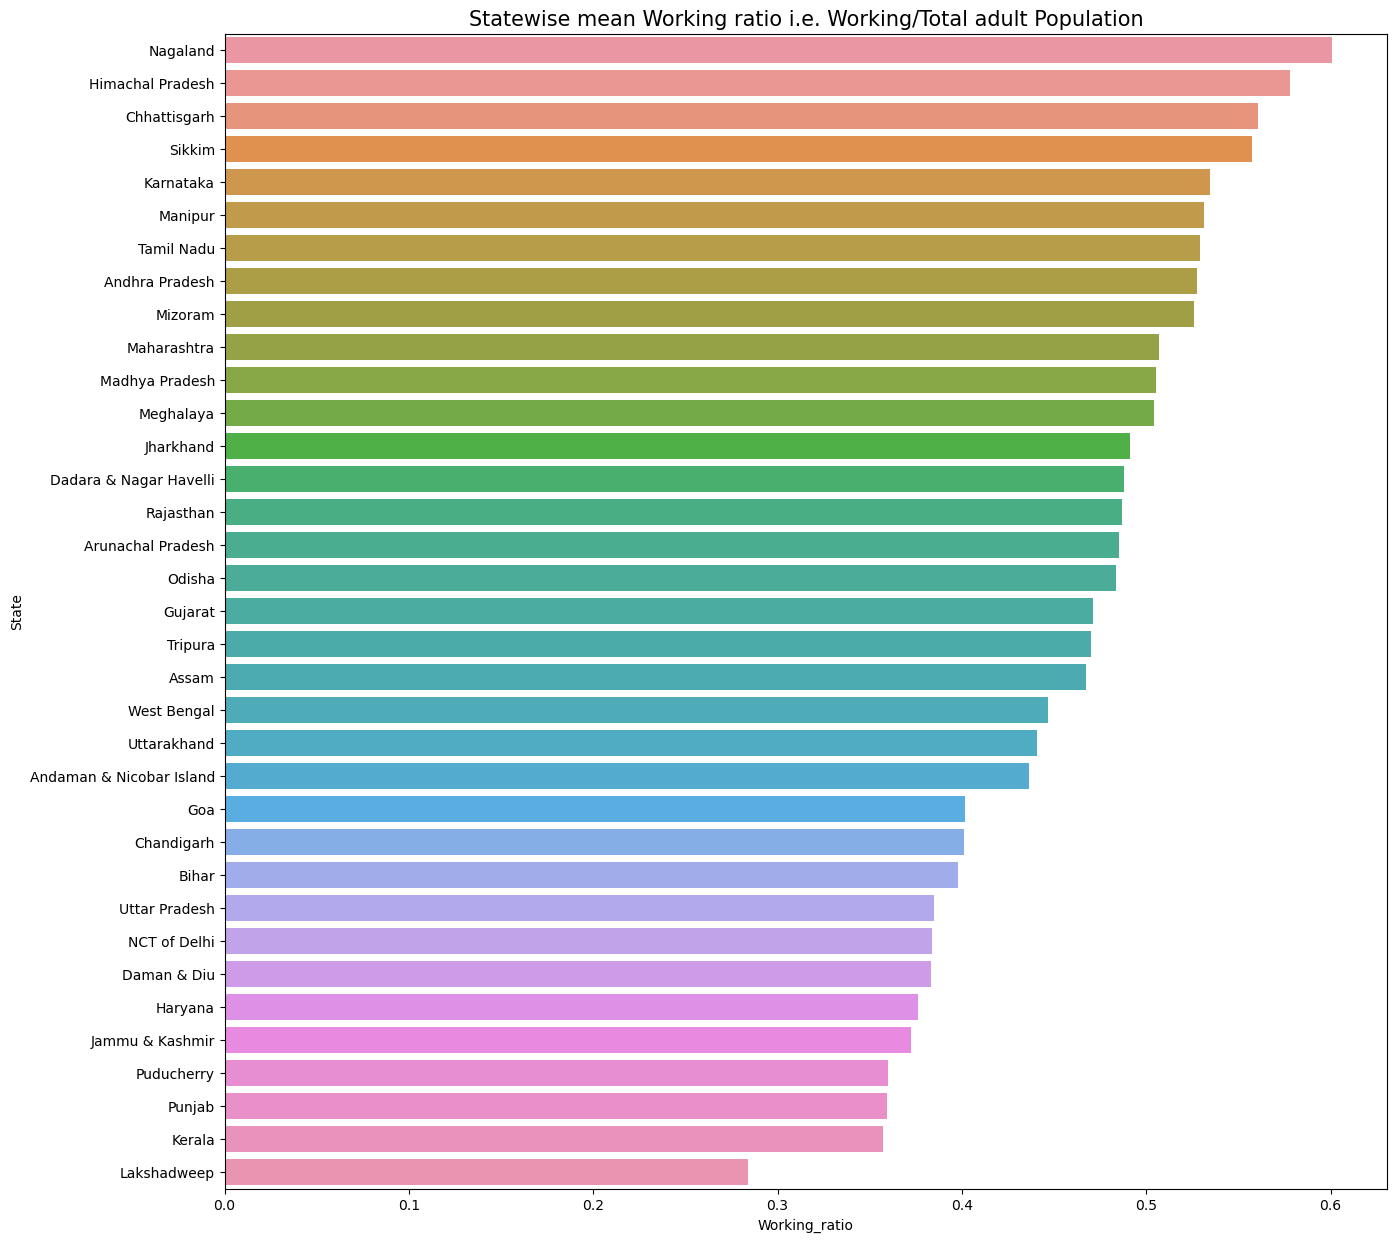

In [569]:
#Which state has the highest and lowest mean working ratio?
ind=df.groupby('State')['Working_ratio'].mean().sort_values(ascending=False).index
grp5=df.groupby('State')['Working_ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp5['Working_ratio'],y=grp5['State'],order=ind)
plt.title('Statewise mean Working ratio i.e. Working/Total adult Population',fontsize=15);

Observations:
- Nagaland has the highest working ratio, close to 60%, and Lakshadweep has the lowest working ratio of 28%

In [570]:
grp5

State  Working_ratio
0   Andaman & Nicobar Island       0.436197
1             Andhra Pradesh       0.527356
2          Arunachal Pradesh       0.485185
3                      Assam       0.467022
4                      Bihar       0.398071
5                 Chandigarh       0.401275
6               Chhattisgarh       0.560717
7     Dadara & Nagar Havelli       0.487685
8                Daman & Diu       0.382962
9                        Goa       0.401597
10                   Gujarat       0.470973
11                   Haryana       0.375905
12          Himachal Pradesh       0.577959
13           Jammu & Kashmir       0.372185
14                 Jharkhand       0.491113
15                 Karnataka       0.534525
16                    Kerala       0.357176
17               Lakshadweep       0.283873
18            Madhya Pradesh       0.505401
19               Maharashtra       0.506831
20                   Manipur       0.531384
21                 Meghalaya       0.504225
22                   Mizoram       0.525805
23              NCT of Delhi       0.383767
24                  Nagaland       0.600641
25                    Odisha       0.483474
26                Puducherry       0.359736
27                    Punjab       0.359522
28                 Rajasthan       0.486691
29                    Sikkim       0.557497
30                Tamil Nadu       0.529267
31                   Tripura       0.470261
32             Uttar Pradesh       0.384846
33               Uttarakhand       0.440660
34               West Bengal       0.446908

In [599]:
df1=df[['State','Agri_related','other','Household']]

In [600]:
grp6=df1.groupby('State').sum()

In [601]:
grp6

Agri_related    other  Household
State                                                     
Andaman & Nicobar Island          1543    12815        145
Andhra Pradesh                 2076907  1406401     149919
Arunachal Pradesh                24685    19729        472
Assam                           389965   598553      37379
Bihar                          1143669   519695      71819
Chandigarh                         391    33498        414
Chhattisgarh                    448216   276812      11402
Dadara & Nagar Havelli            1885     3844        110
Daman & Diu                        342     9668         67
Goa                               6722    82088       2100
Gujarat                         696724   894044      24139
Haryana                         260130   392829      20511
Himachal Pradesh                142862   155359       4422
Jammu & Kashmir                  46260   123804       5591
Jharkhand                       278602   316193      22017
Karnataka                      1529599  1740067     126662
Kerala                          235980  1462304      35239
Lakshadweep                          0     3663         48
Madhya Pradesh                  901399   728821      60556
Maharashtra                    1909525  2234749     116498
Manipur                          57884    60135       8262
Meghalaya                       108909    96468       2321
Mizoram                          30621    29326        864
NCT of Delhi                      6900   567896      18875
Nagaland                         45979    28245       1223
Odisha                          427895   484986      43511
Puducherry                       10099    50016       1139
Punjab                          325238   616948      39676
Rajasthan                       658396   657559      35575
Sikkim                           10094    14227        320
Tamil Nadu                     1408193  1880904     141510
Tripura                          44235    78203       2937
Uttar Pradesh                  2175423  1840500     263928
Uttarakhand                     210057   179651       9689
West Bengal                     823384  1890008     190047

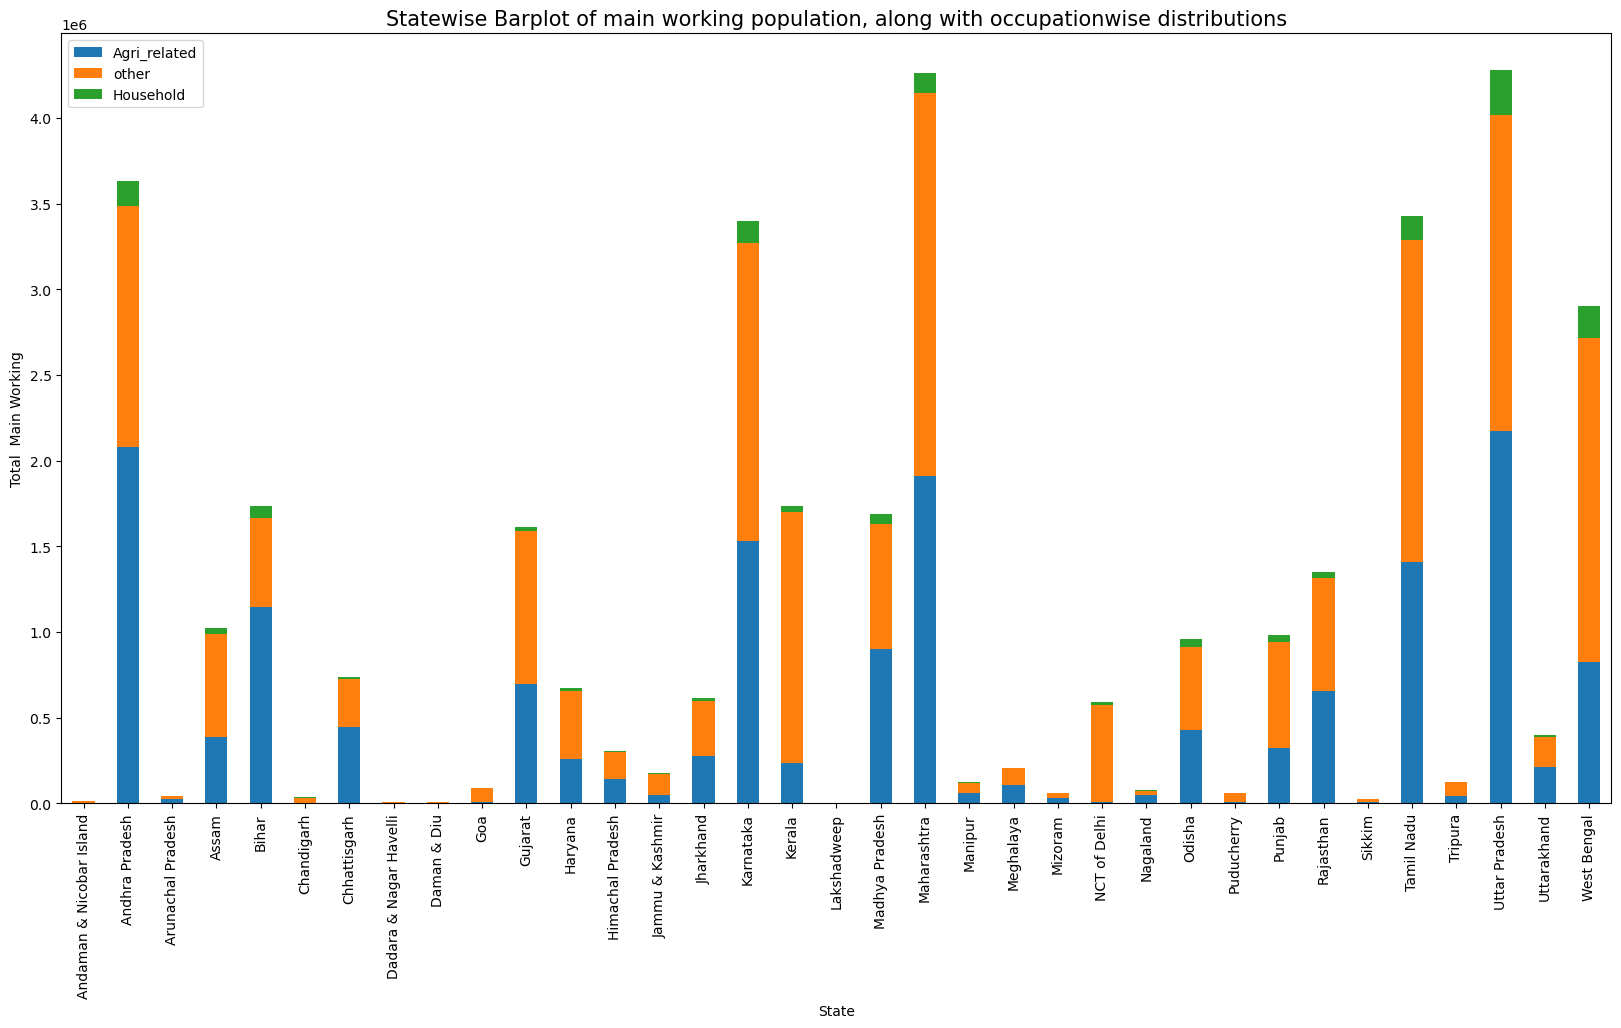

In [602]:
grp6.plot(kind='bar',stacked=True,figsize=(20,10))
plt.ylabel('Total  Main Working');
plt.title('Statewise Barplot of main working population, along with occupationwise distributions',fontsize=15);

Observations:
- States like Andhra Pradesh, Bihar, Uttar Pradesh, Uttarkhand, Rajasthan and Madhya Pradesh, are agriculture intensive, with majority of the people working as either Cultivators or agricultural labourers

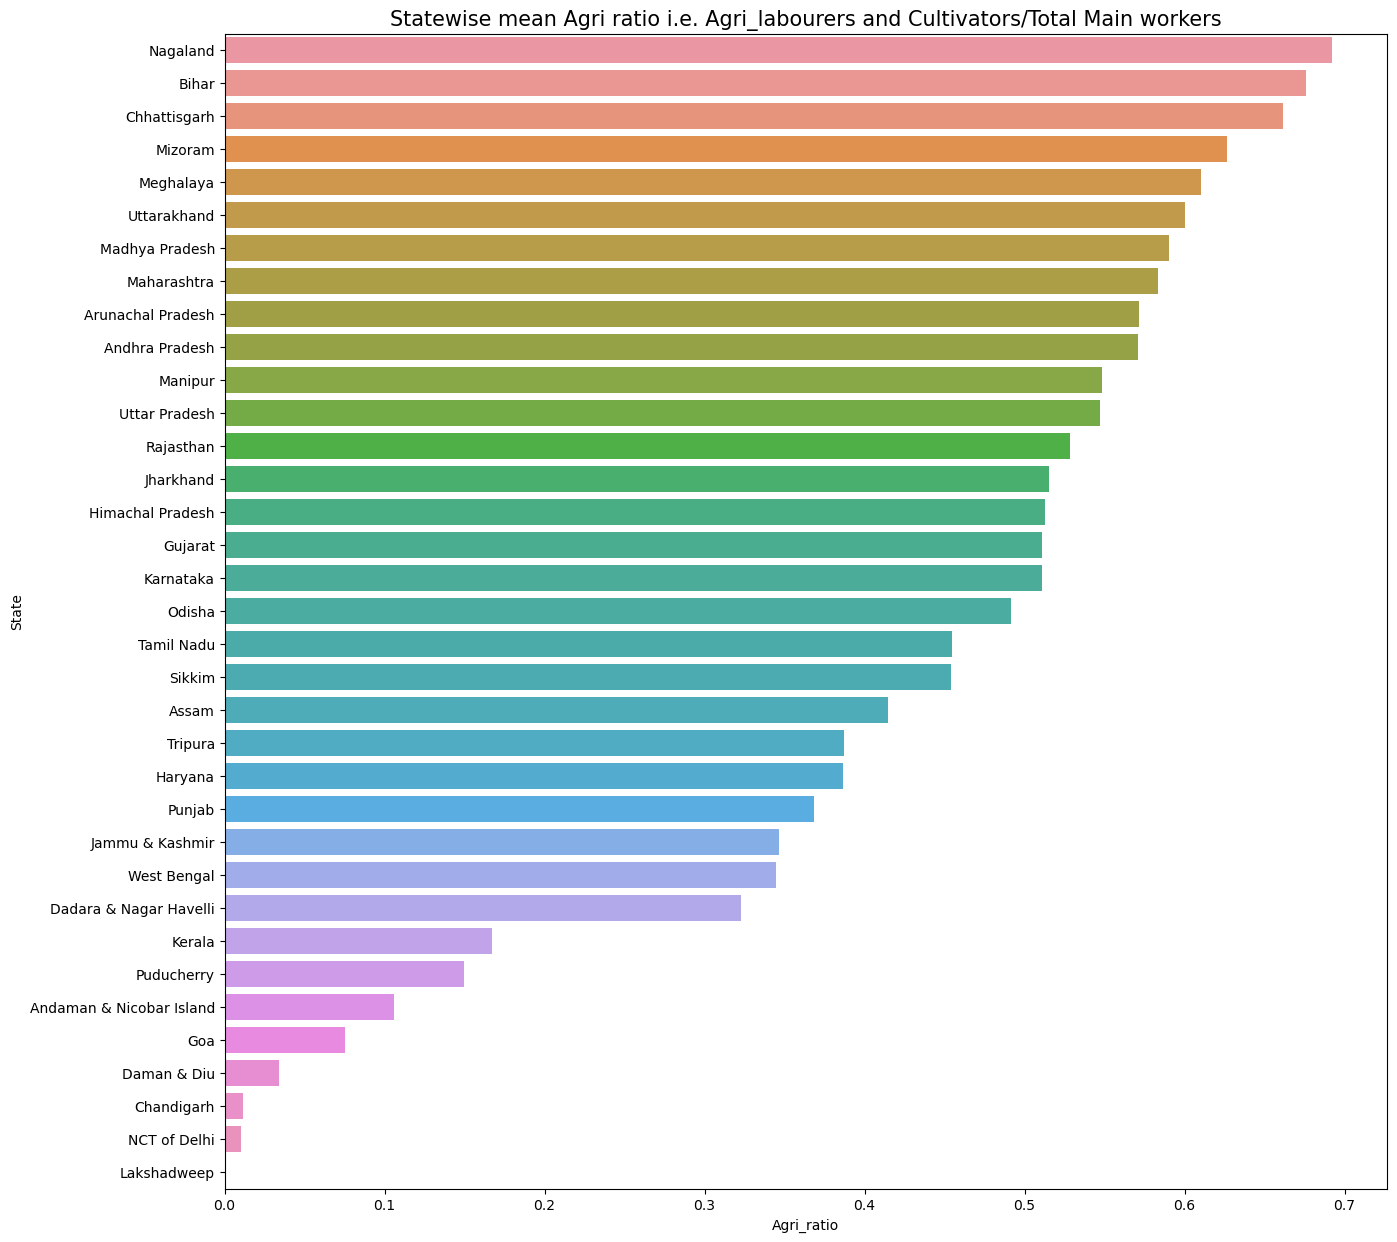

In [605]:
#Which state has the highest and lowest mean agri_Related working ratio?
ind=df.groupby('State')['Agri_ratio'].mean().sort_values(ascending=False).index
grp7=df.groupby('State')['Agri_ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp7['Agri_ratio'],y=grp7['State'],order=ind)
plt.title('Statewise mean Agri ratio i.e. Agri_labourers and Cultivators/Total Main workers',fontsize=15);

Observations:
- Nagaland has the highest mean number of working population, and most of them are in the agriculture related jobs
- The states with lower literacy ratio are agriculture intensive

##### Minority related

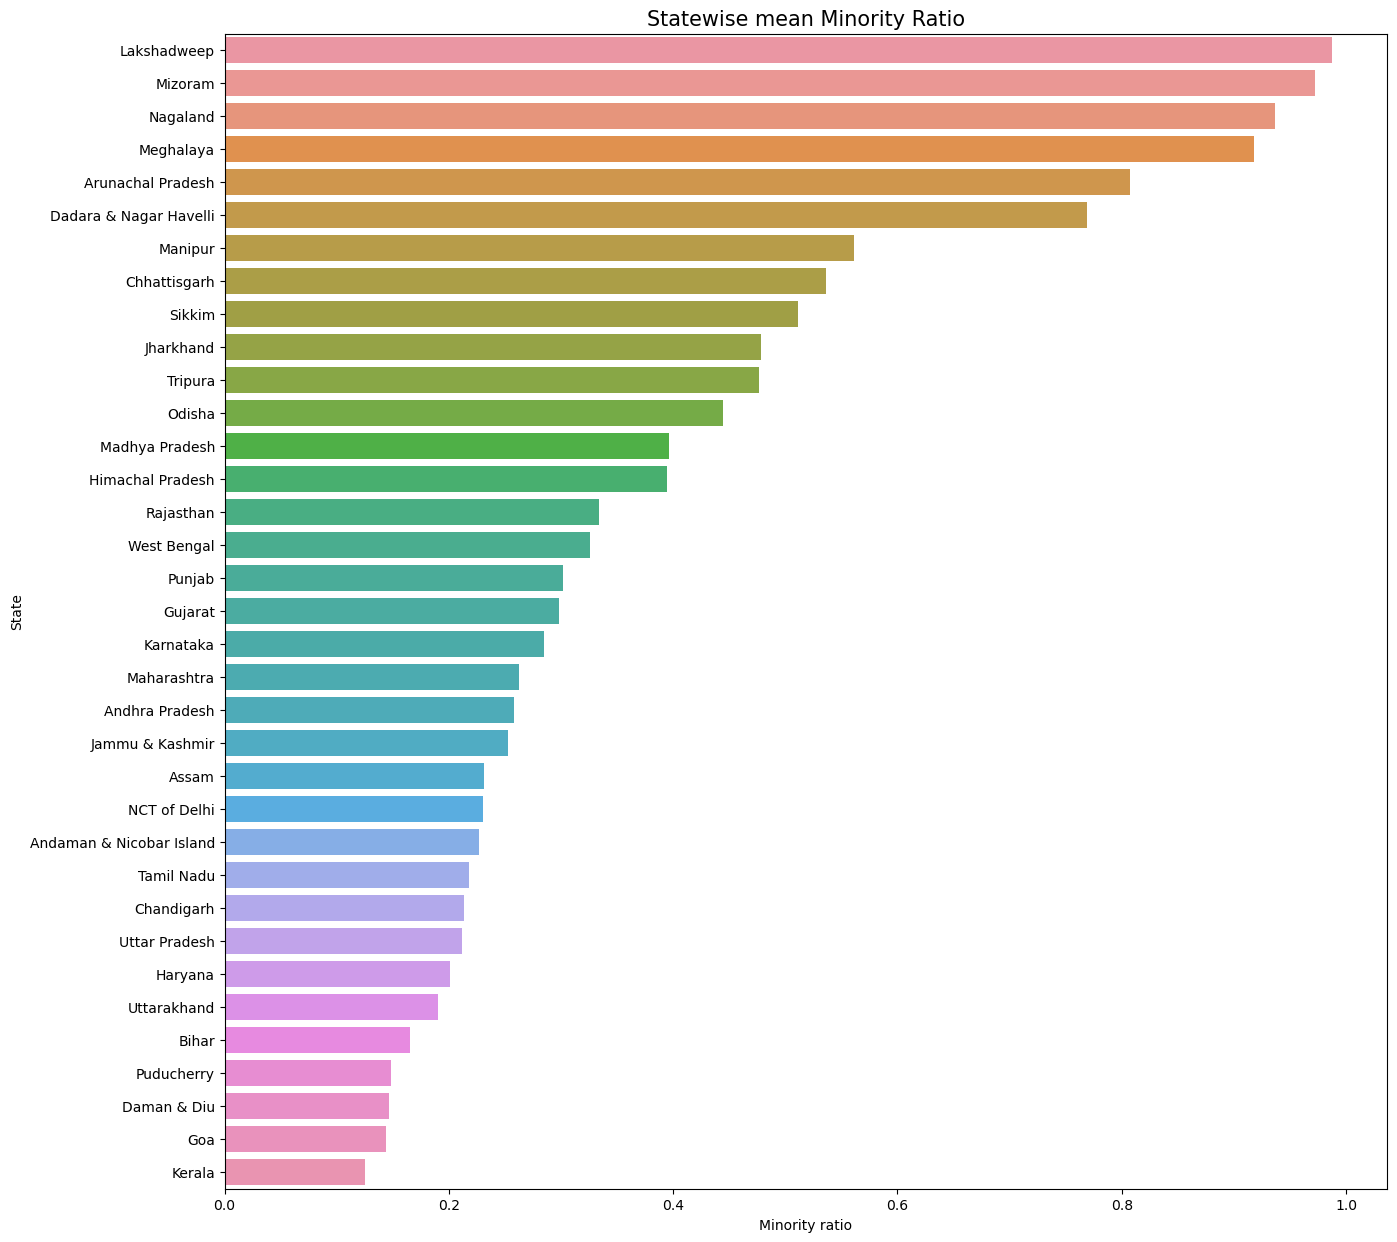

In [609]:
#Which state has the highest and lowest mean literacy rate?
ind=df.groupby('State')['Minority ratio'].mean().sort_values(ascending=False).index
grp9=df.groupby('State')['Minority ratio'].mean().reset_index()
plt.figure(figsize=(15,15))
sns.barplot(x=grp9['Minority ratio'],y=grp9['State'],order=ind)
plt.title('Statewise mean Minority Ratio',fontsize=15);

Observations:
- The north-eastern states have a high minority ratio

### Part 2 - PCA: We choose not to treat outliers for this case. Do you think that treating outliers for this case is necessary?

Generally,outliers have an impact on the results of the PCA, and hence need to be tackled. However, the outliers themselves may contain valuable data, that may provide useful insights. In a sensitive dataset like this census, eventhough PCA needs to be done, outliers may be left untreated in order to prevent loss of essential information.

## Scaling

### Part 2 - PCA: Scale the Data using z-score method. Does scaling have any impact on outliers? Compare boxplots before and after scaling and comment.

In [611]:
census_num_scaled=census_num.apply(zscore)

In [613]:
census_num_scaled.describe().T.round(2)

count  mean  std   min   25%   50%   75%    max
No_HH           640.0   0.0  1.0 -1.06 -0.66 -0.32  0.37   5.39
TOT_M           640.0  -0.0  1.0 -1.08 -0.68 -0.29  0.38   5.53
TOT_F           640.0  -0.0  1.0 -1.07 -0.67 -0.31  0.37   5.53
M_06            640.0  -0.0  1.0 -1.07 -0.66 -0.27  0.37   7.30
F_06            640.0   0.0  1.0 -1.05 -0.64 -0.29  0.35   7.35
M_SC            640.0  -0.0  1.0 -0.96 -0.72 -0.29  0.39   6.21
F_SC            640.0   0.0  1.0 -0.96 -0.70 -0.33  0.39   6.25
M_ST            640.0  -0.0  1.0 -0.63 -0.60 -0.39  0.15   9.15
F_ST            640.0  -0.0  1.0 -0.64 -0.61 -0.40  0.15   7.56
M_LIT           640.0   0.0  1.0 -1.03 -0.66 -0.27  0.36   6.18
F_LIT           640.0  -0.0  1.0 -0.88 -0.61 -0.30  0.25   6.73
M_ILL           640.0   0.0  1.0 -1.10 -0.68 -0.31  0.38   4.24
F_ILL           640.0  -0.0  1.0 -1.18 -0.71 -0.29  0.48   4.21
TOT_WORK_M      640.0  -0.0  1.0 -1.04 -0.67 -0.28  0.34   6.36
TOT_WORK_F      640.0  -0.0  1.0 -1.10 -0.68 -0.29  0.32   5.83
MAINWORK_M      640.0  -0.0  1.0 -0.96 -0.65 -0.28  0.32   6.92
MAINWORK_F      640.0   0.0  1.0 -0.93 -0.62 -0.32  0.23   6.60
MAIN_CL_M       640.0  -0.0  1.0 -1.15 -0.72 -0.27  0.48   5.00
MAIN_CL_F       640.0  -0.0  1.0 -1.03 -0.67 -0.30  0.34   5.77
MAIN_AL_M       640.0   0.0  1.0 -0.91 -0.75 -0.30  0.35   5.47
MAIN_AL_F       640.0   0.0  1.0 -0.69 -0.58 -0.39  0.13   6.15
MAIN_HH_M       640.0   0.0  1.0 -0.69 -0.55 -0.30  0.17  12.17
MAIN_HH_F       640.0  -0.0  1.0 -0.43 -0.36 -0.26  0.02  14.04
MAIN_OT_M       640.0  -0.0  1.0 -0.69 -0.54 -0.32  0.12   8.55
MAIN_OT_F       640.0   0.0  1.0 -0.65 -0.49 -0.32  0.10  10.39
MARGWORK_M      640.0   0.0  1.0 -1.05 -0.66 -0.29  0.27   5.37
MARGWORK_F      640.0  -0.0  1.0 -1.18 -0.70 -0.27  0.53   4.90
MARG_CL_M       640.0  -0.0  1.0 -0.79 -0.56 -0.33  0.18   9.28
MARG_CL_F       640.0  -0.0  1.0 -0.65 -0.47 -0.30  0.10  11.80
MARG_AL_M       640.0   0.0  1.0 -0.87 -0.64 -0.33  0.26   5.40
MARG_AL_F       640.0   0.0  1.0 -0.95 -0.75 -0.36  0.39   5.74
MARG_HH_M       640.0  -0.0  1.0 -0.69 -0.53 -0.33  0.09   8.61
MARG_HH_F       640.0   0.0  1.0 -0.66 -0.51 -0.30  0.15  12.24
MARG_OT_M       640.0   0.0  1.0 -0.86 -0.61 -0.30  0.24   5.99
MARG_OT_F       640.0  -0.0  1.0 -0.86 -0.60 -0.29  0.21   7.99
MARGWORK_3_6_M  640.0   0.0  1.0 -1.07 -0.66 -0.30  0.39   6.64
MARGWORK_3_6_F  640.0  -0.0  1.0 -0.97 -0.66 -0.29  0.32   7.18
MARG_CL_3_6_M   640.0  -0.0  1.0 -1.06 -0.67 -0.29  0.29   5.44
MARG_CL_3_6_F   640.0  -0.0  1.0 -1.21 -0.71 -0.24  0.56   4.70
MARG_AL_3_6_M   640.0   0.0  1.0 -0.87 -0.61 -0.34  0.22   7.33
MARG_AL_3_6_F   640.0   0.0  1.0 -0.70 -0.50 -0.31  0.12  10.19
MARG_HH_3_6_M   640.0  -0.0  1.0 -0.90 -0.66 -0.34  0.31   5.43
MARG_HH_3_6_F   640.0  -0.0  1.0 -0.97 -0.76 -0.35  0.44   5.83
MARG_OT_3_6_M   640.0   0.0  1.0 -0.68 -0.52 -0.32  0.09   9.18
MARG_OT_3_6_F   640.0   0.0  1.0 -0.65 -0.51 -0.30  0.15  12.80
MARGWORK_0_3_M  640.0   0.0  1.0 -0.86 -0.61 -0.31  0.23   5.94
MARGWORK_0_3_F  640.0   0.0  1.0 -0.85 -0.60 -0.30  0.23   6.92
MARG_CL_0_3_M   640.0  -0.0  1.0 -0.93 -0.61 -0.30  0.22   5.70
MARG_CL_0_3_F   640.0  -0.0  1.0 -0.98 -0.65 -0.30  0.30   6.77
MARG_AL_0_3_M   640.0   0.0  1.0 -0.55 -0.45 -0.30  0.04  12.19
MARG_AL_0_3_F   640.0  -0.0  1.0 -0.50 -0.40 -0.28  0.01  14.86
MARG_HH_0_3_M   640.0   0.0  1.0 -0.74 -0.56 -0.33  0.11   7.29
MARG_HH_0_3_F   640.0  -0.0  1.0 -0.82 -0.63 -0.36  0.26   7.84
MARG_OT_0_3_M   640.0  -0.0  1.0 -0.66 -0.53 -0.34  0.07   7.64
MARG_OT_0_3_F   640.0  -0.0  1.0 -0.65 -0.51 -0.28  0.13  10.19
NON_WORK_M      640.0  -0.0  1.0 -0.84 -0.57 -0.30  0.15   9.75
NON_WORK_F      640.0  -0.0  1.0 -0.77 -0.53 -0.26  0.16  10.81

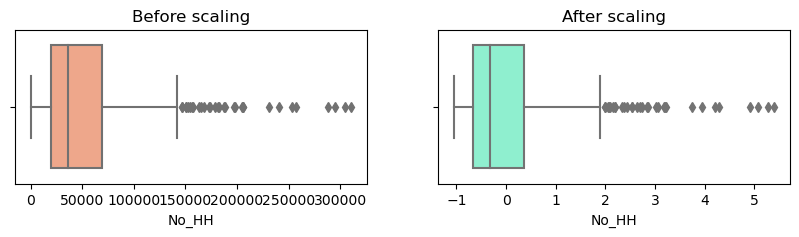

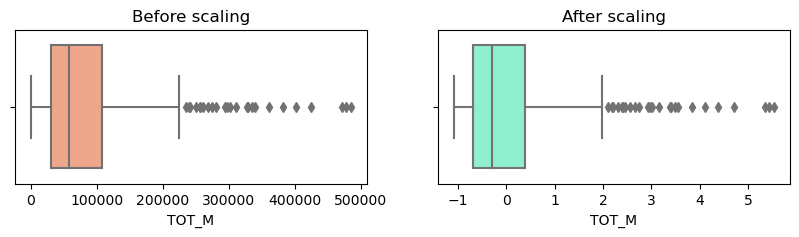

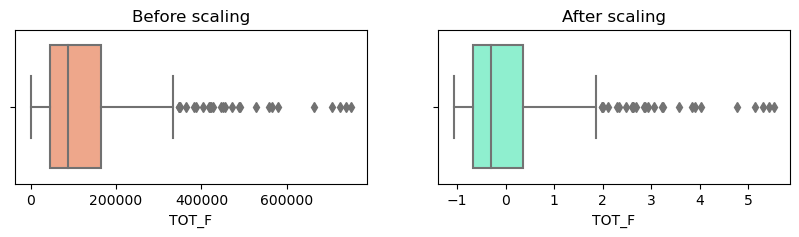

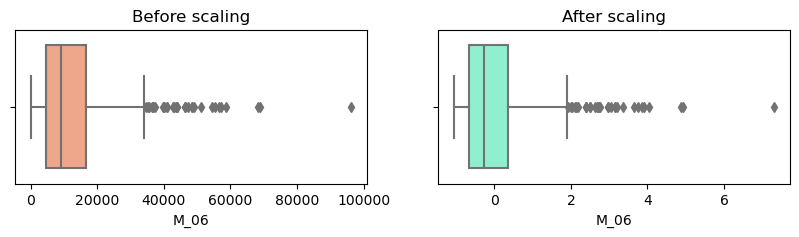

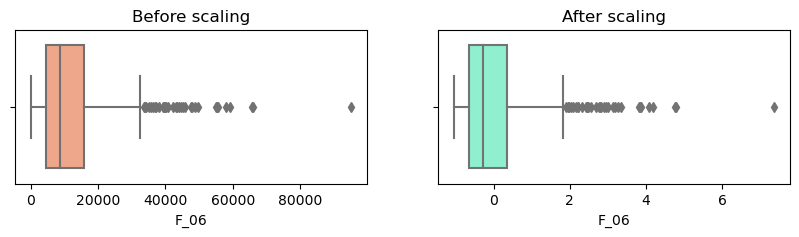

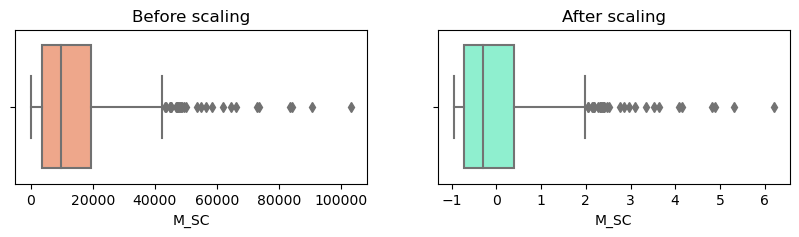

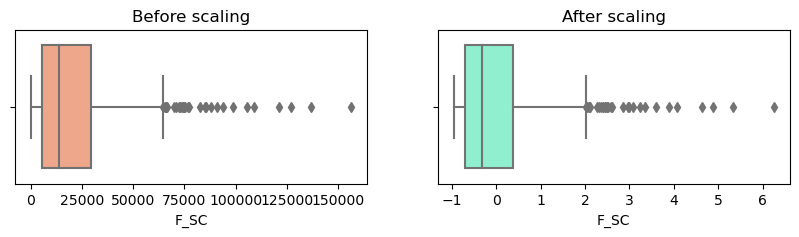

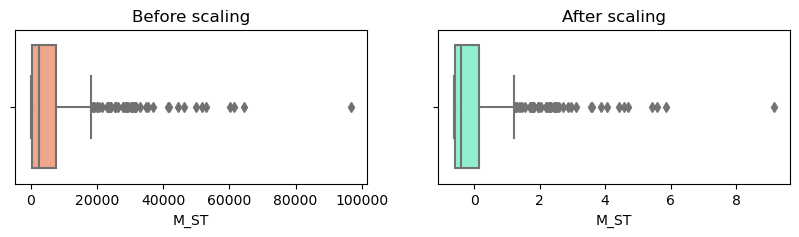

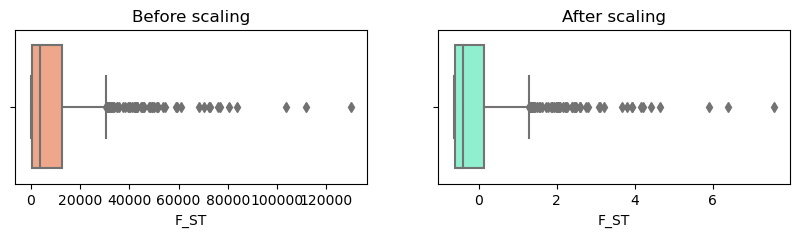

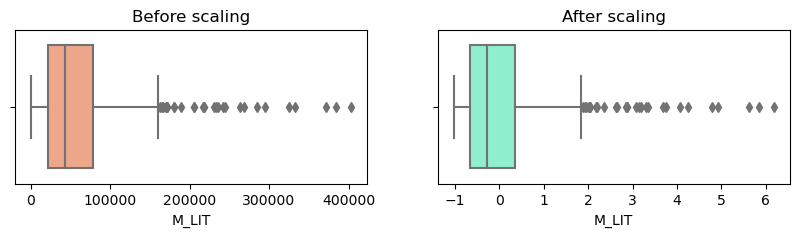

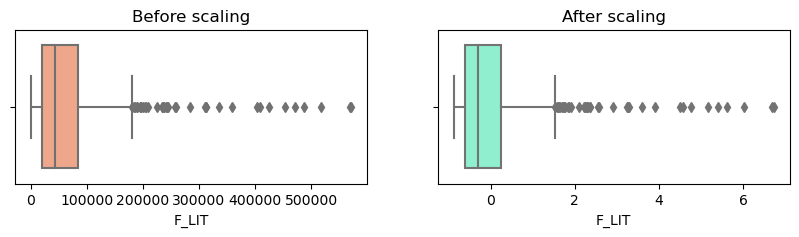

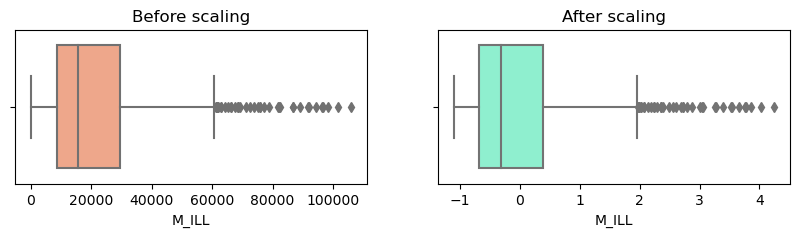

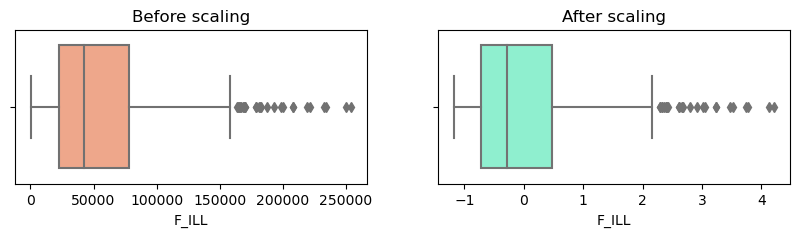

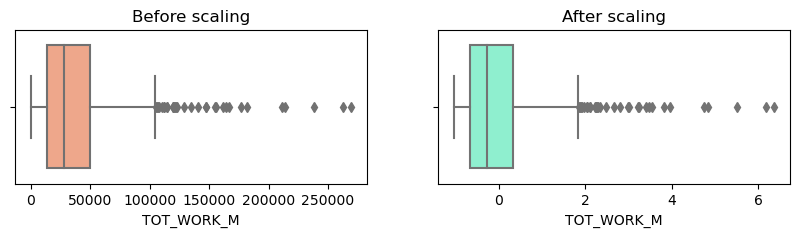

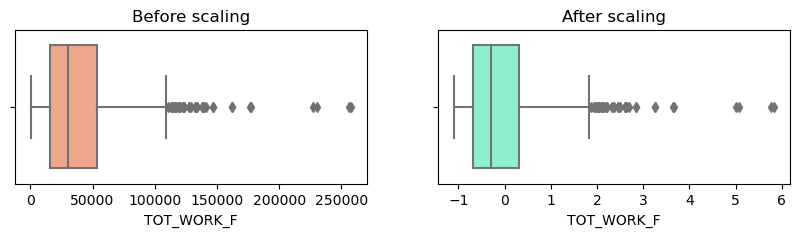

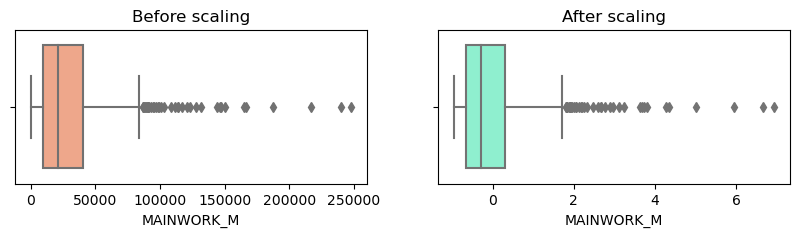

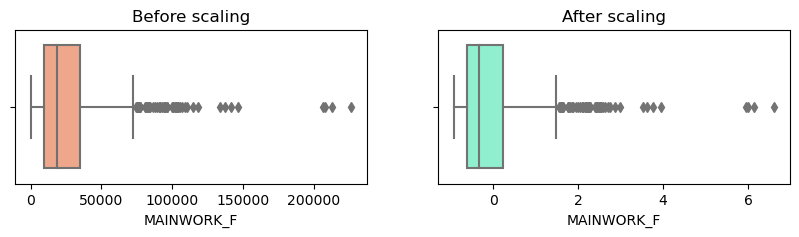

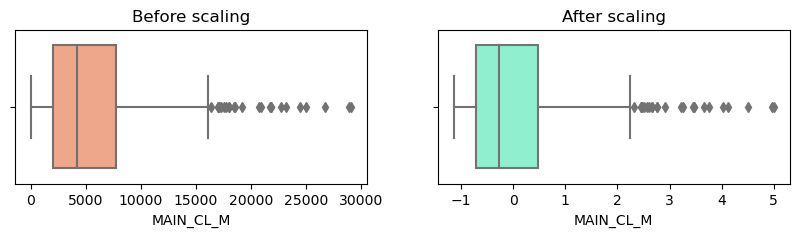

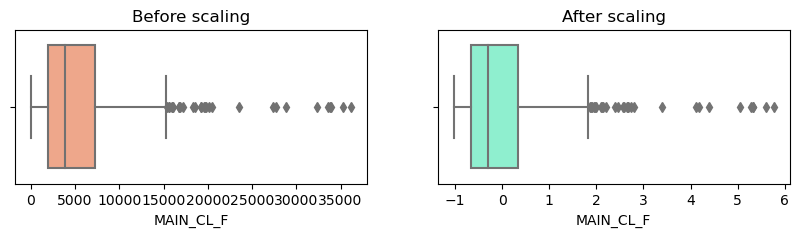

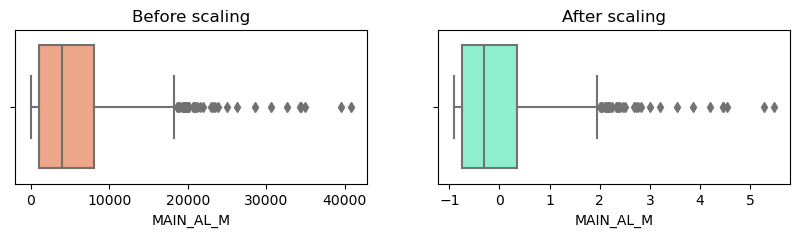

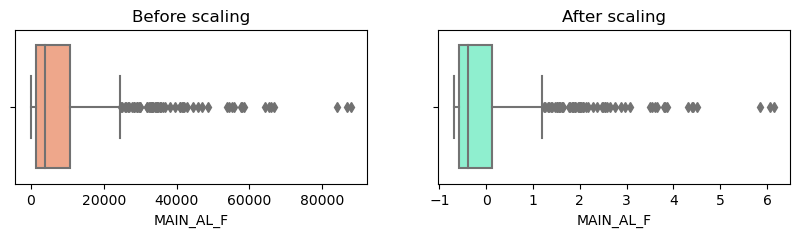

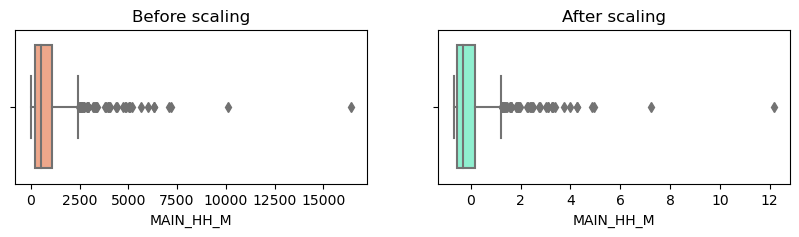

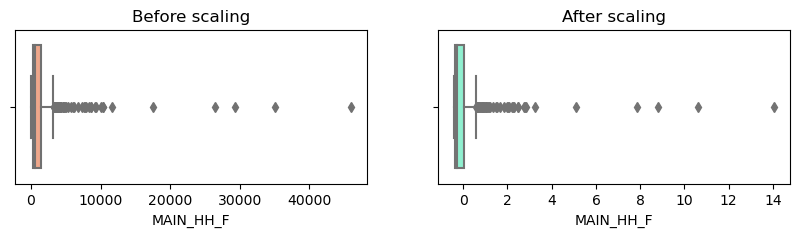

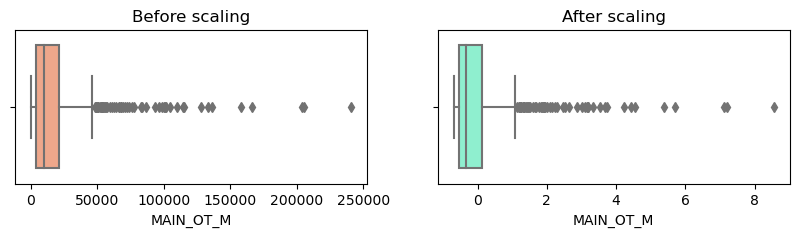

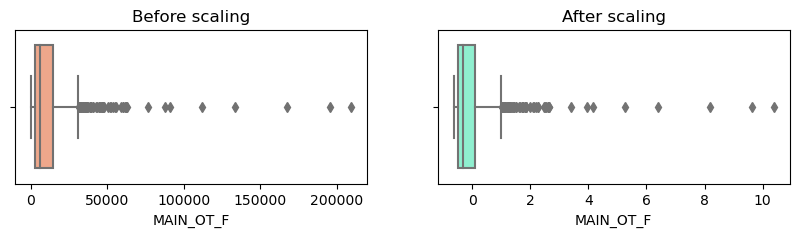

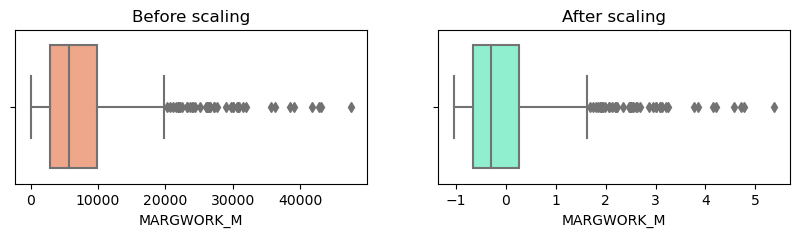

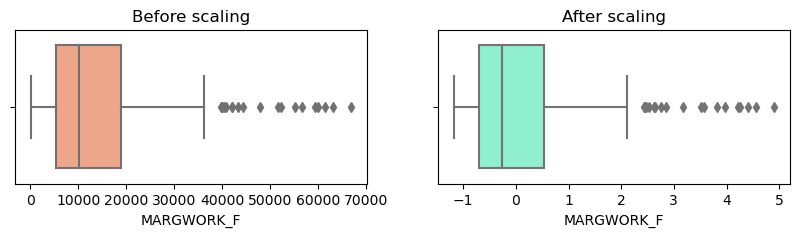

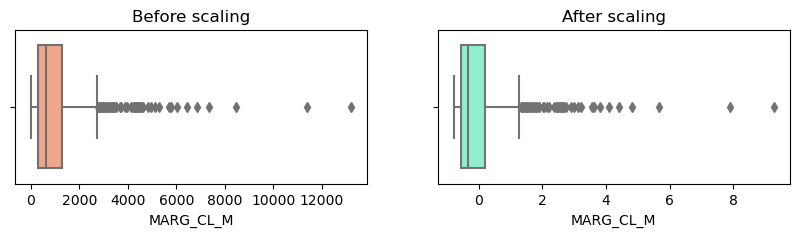

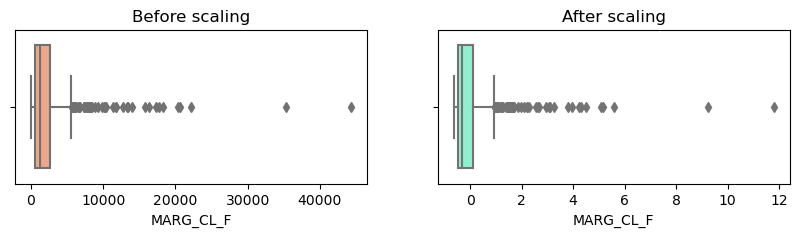

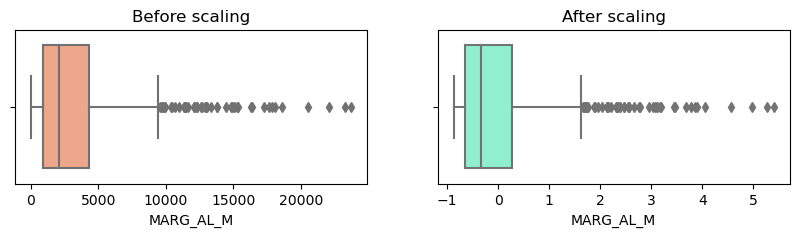

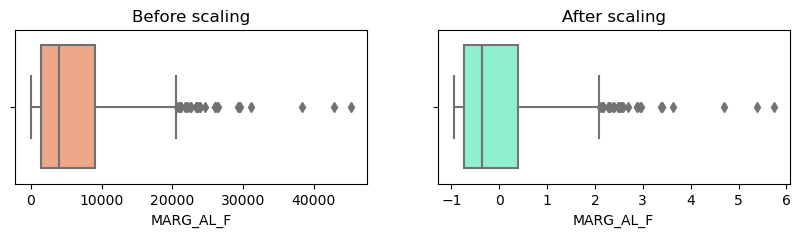

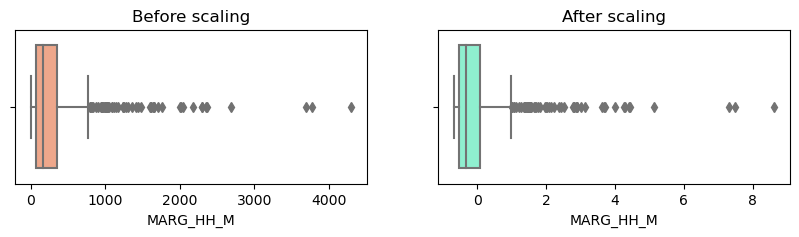

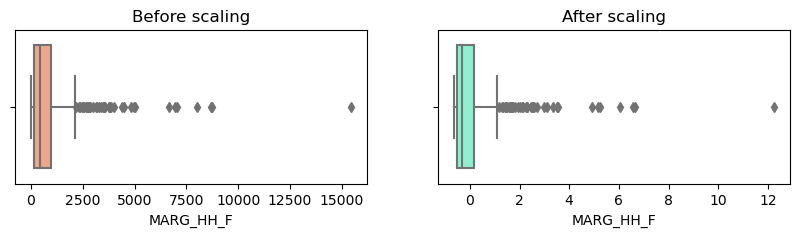

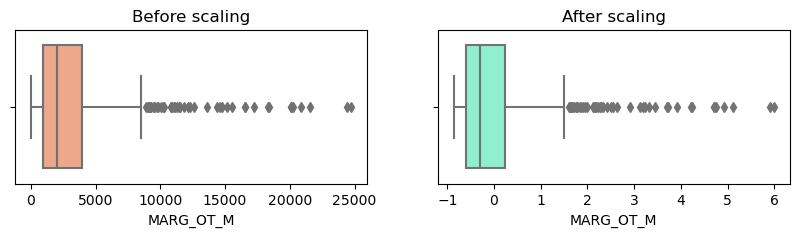

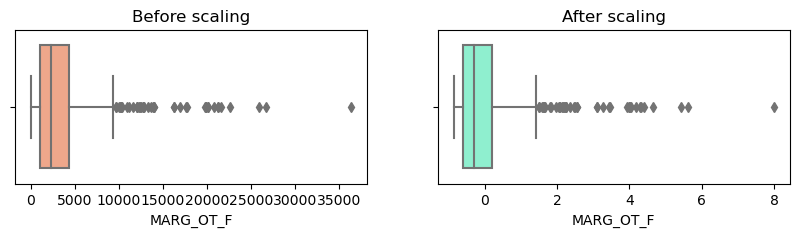

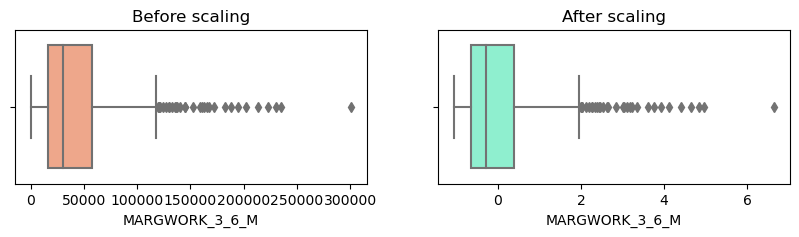

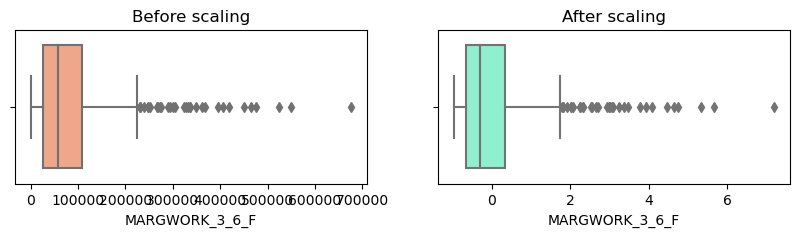

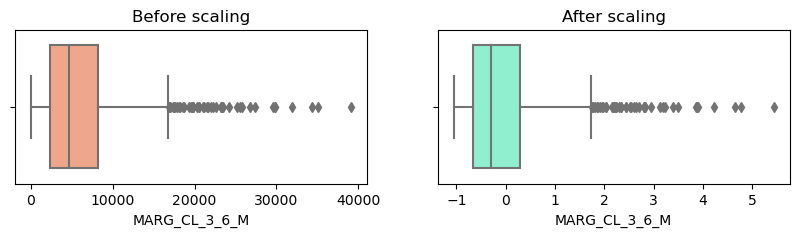

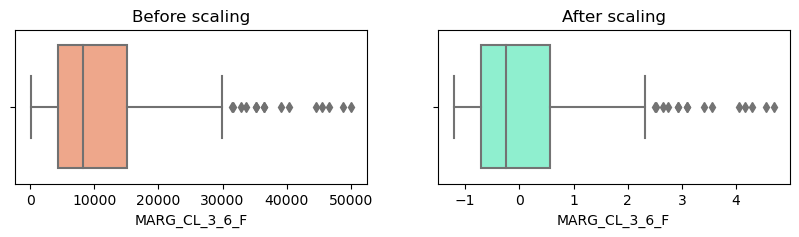

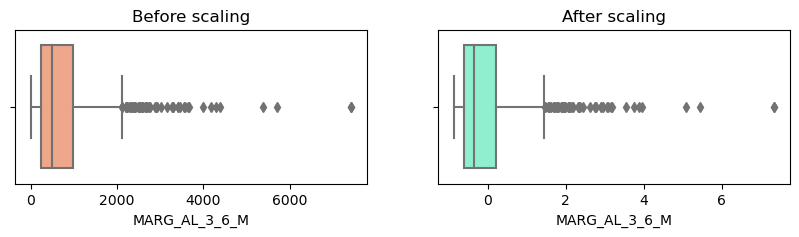

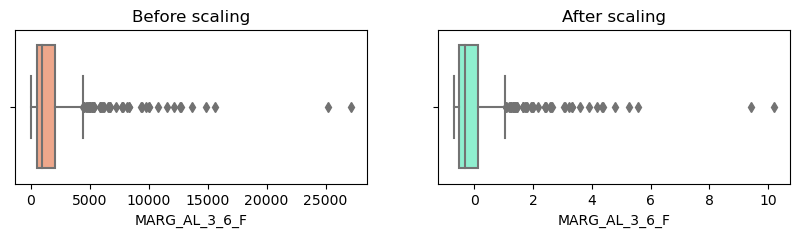

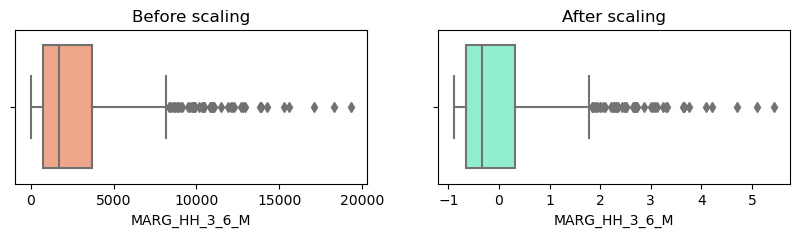

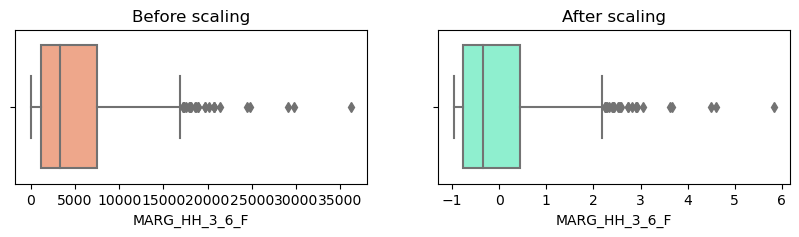

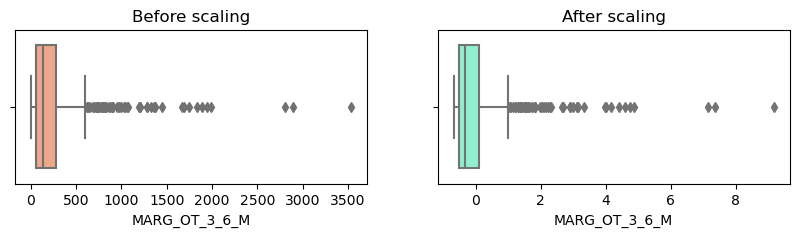

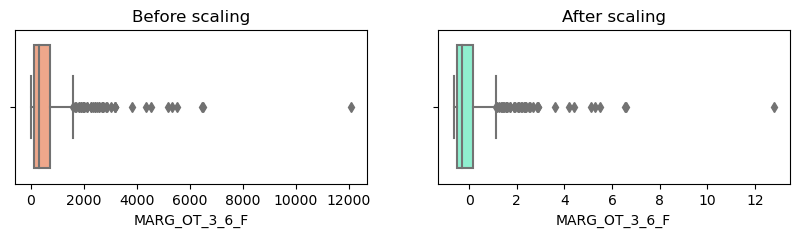

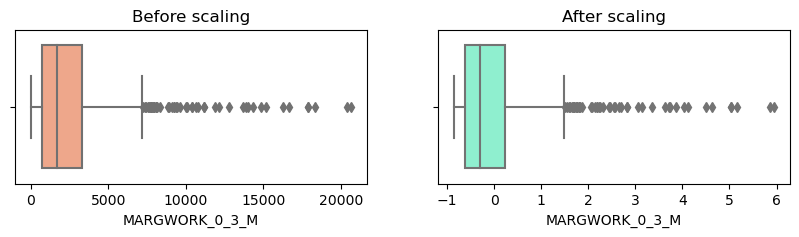

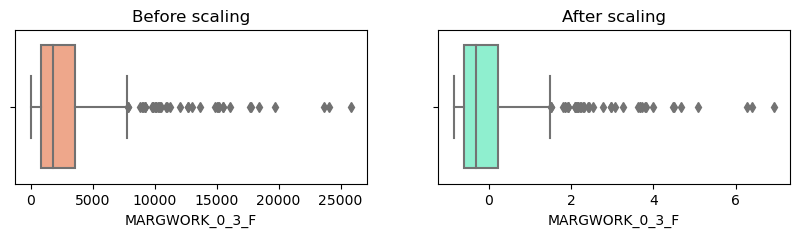

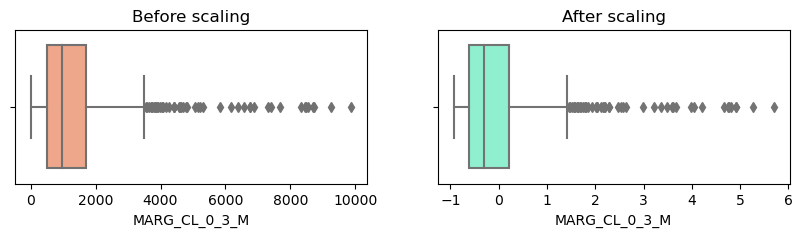

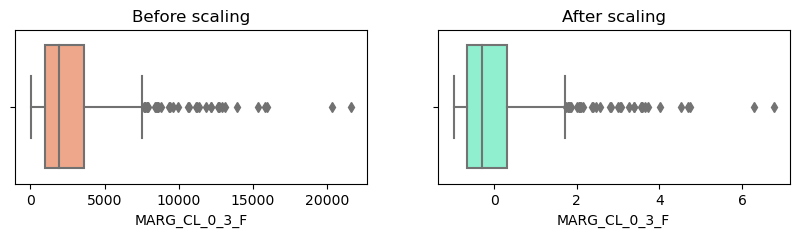

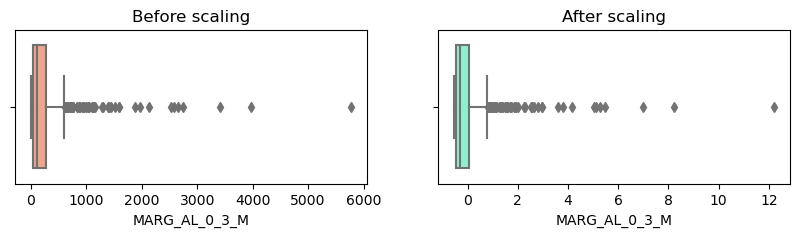

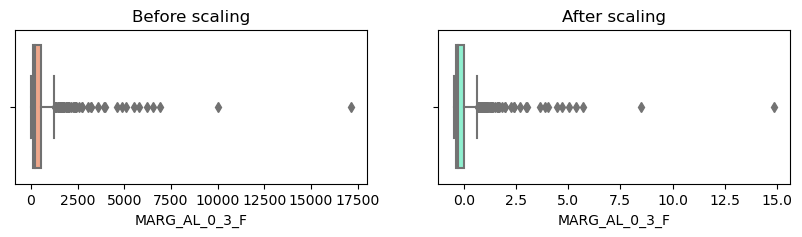

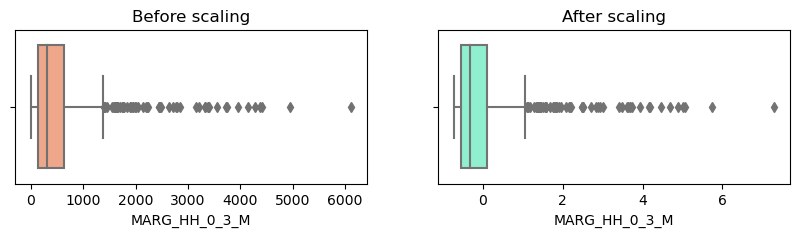

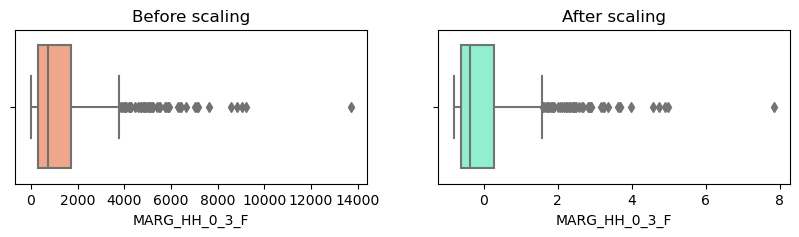

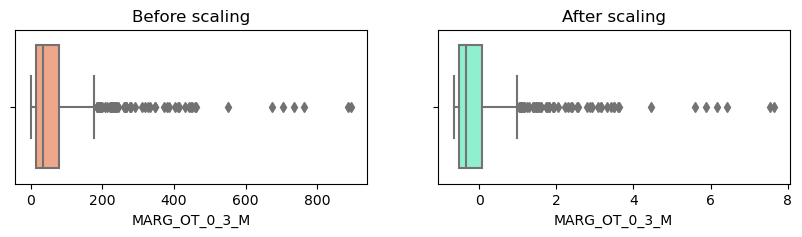

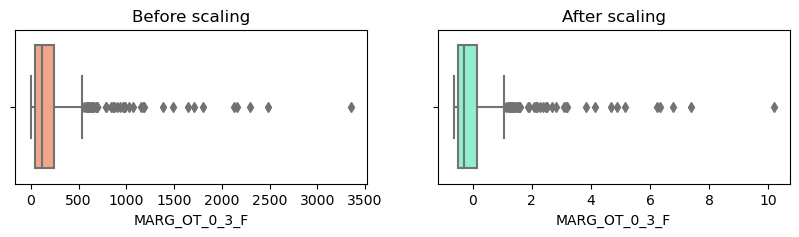

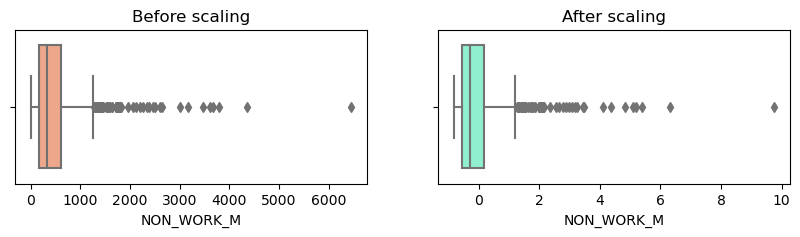

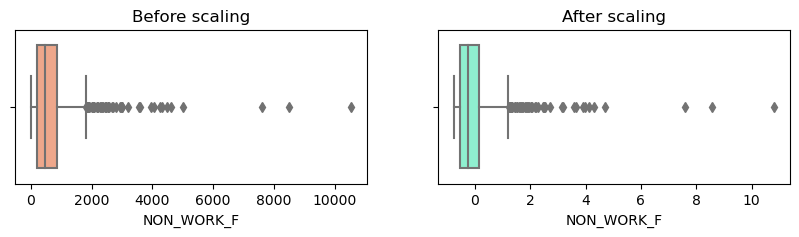

In [619]:
for i in census_num.columns:
    plt.figure(figsize=(10,2))
    plt.subplot(1,2,1)
    plt.title('Before scaling')
    sns.boxplot(x=census_num[i],color='lightsalmon')
    plt.subplot(1,2,2)
    plt.title('After scaling')
    sns.boxplot(x=census_num_scaled[i],color='aquamarine')
    plt.show()

Observations:
- As seen from the above boxplots, though the data is scaled, it does not impact the outliers in any field

## PCA

### Part 2 - PCA: Perform all the required steps for PCA (use sklearn only) Create the covariance Matrix Get eigen values and eigen vector.

#### Bartlett Sphericity test

In [620]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_sq_val,p_val=calculate_bartlett_sphericity(census_num_scaled)
p_val

0.0

Since p value is less than 0.05, we reject the null hypothesis and conclude that there is a significant correlation between the factors.

#### kmo Test

In [621]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model=calculate_kmo(census_num_scaled)
kmo_model

0.803988993278217

Since the output of the kmo test is 0.8, the given dataset has a great suitability for factor analysis

#### co-variance matrix

In [623]:
cov=np.cov(census_num_scaled)

In [627]:
print('Covariance matrix:\n',cov)

Covariance matrix:
 [[0.06173772 0.05024455 0.03317398 ... 0.03498547 0.03025035 0.02714776]
 [0.05024455 0.07966605 0.03858426 ... 0.0504162  0.03813376 0.03399651]
 [0.03317398 0.03858426 0.05855969 ... 0.04253603 0.03684299 0.03313212]
 ...
 [0.03498547 0.0504162  0.04253603 ... 0.04525044 0.03695346 0.03424301]
 [0.03025035 0.03813376 0.03684299 ... 0.03695346 0.03262291 0.03059199]
 [0.02714776 0.03399651 0.03313212 ... 0.03424301 0.03059199 0.03110606]]


#### Eigen values and eigen vectors

In [630]:
census_num_scaled1=census_num_scaled.copy()

In [637]:
pca=PCA(n_components=57,random_state=123)
pca_trans=pca.fit_transform(census_num_scaled1)
pca_trans.T.round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       ...,
       [-0.  ,  0.  ,  0.  , ...,  0.  , -0.  , -0.  ],
       [ 0.  ,  0.  , -0.  , ...,  0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ]])

In [636]:
print('The eigen vectors are:\n',pca.components_.round(2))

The eigen vectors are:
 [[ 0.16  0.17  0.17 ...  0.13  0.15  0.13]
 [-0.13 -0.09 -0.1  ...  0.05 -0.07 -0.07]
 [-0.    0.06  0.04 ... -0.08  0.11  0.1 ]
 ...
 [ 0.    0.21  0.25 ... -0.07  0.   -0.07]
 [ 0.    0.29 -0.21 ...  0.04 -0.03  0.01]
 [-0.    0.19  0.03 ... -0.03 -0.14 -0.02]]


In [635]:
print('The eigen values are:\n', pca.explained_variance_.round(2))

The eigen values are:
 [3.181e+01 7.870e+00 4.150e+00 3.670e+00 2.210e+00 1.940e+00 1.180e+00
 7.500e-01 6.200e-01 5.300e-01 4.300e-01 3.500e-01 3.000e-01 2.800e-01
 1.900e-01 1.400e-01 1.100e-01 1.100e-01 1.000e-01 8.000e-02 6.000e-02
 4.000e-02 4.000e-02 3.000e-02 3.000e-02 2.000e-02 1.000e-02 1.000e-02
 1.000e-02 1.000e-02 1.000e-02 1.000e-02 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00]


### Part 2 - PCA: Identify the optimum number of PCs (for this project, take at least 90% explained variance). Show Scree plot.

#### Optimum no of PCs

In [639]:
expvar= pca.explained_variance_ratio_
print(expvar.round(2))

[0.56 0.14 0.07 0.06 0.04 0.03 0.02 0.01 0.01 0.01 0.01 0.01 0.01 0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.  ]


In [644]:
cum_expvar=np.cumsum(expvar)
print('Cumulative sum of explained variance ratio: \n',(cum_expvar*100).round(2))

Cumulative sum of explained variance ratio: 
 [ 55.73  69.51  76.79  83.21  87.08  90.47  92.53  93.85  94.93  95.85
  96.61  97.23  97.75  98.24  98.57  98.81  99.01  99.2   99.37  99.51
  99.61  99.69  99.75  99.81  99.85  99.89  99.92  99.94  99.96  99.97
  99.98  99.99 100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.   100.   100.   100.
 100.   100.   100.   100.   100.   100.   100.  ]


We can see that 90.47% of the variance can be explained by the first 6 principal components, and hence we can assume that 6 is the optimum number of PCs. The same is represented in the scree plot below.

#### Scree plot

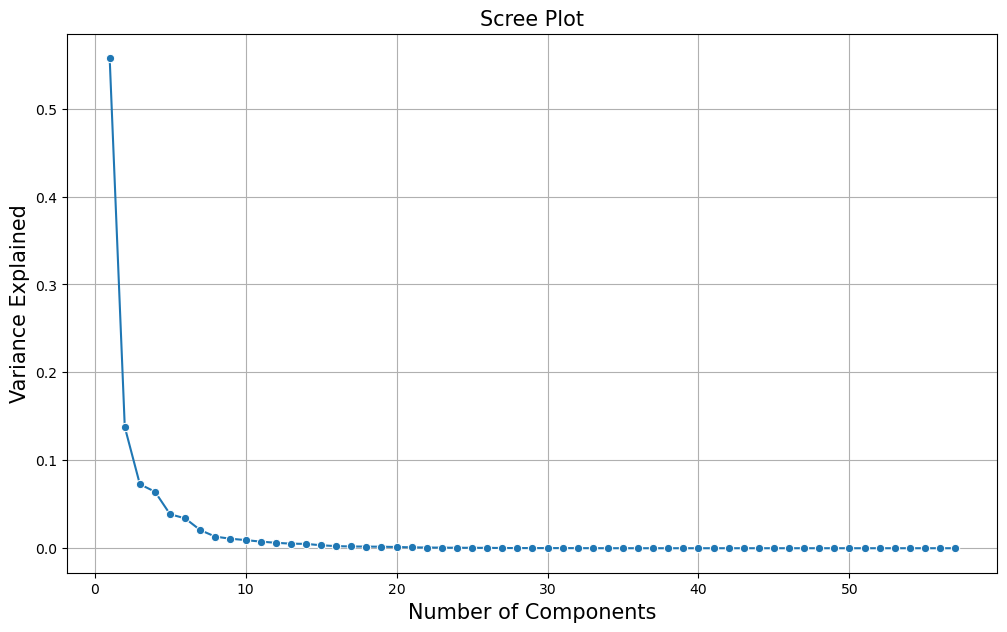

In [645]:
plt.figure(figsize=(12,7))
sns.lineplot(y=expvar,x=range(1,len(expvar)+1),marker='o')
plt.xlabel('Number of Components',fontsize=15)
plt.ylabel('Variance Explained',fontsize=15)
plt.title('Scree Plot',fontsize=15)
plt.grid()
plt.show()

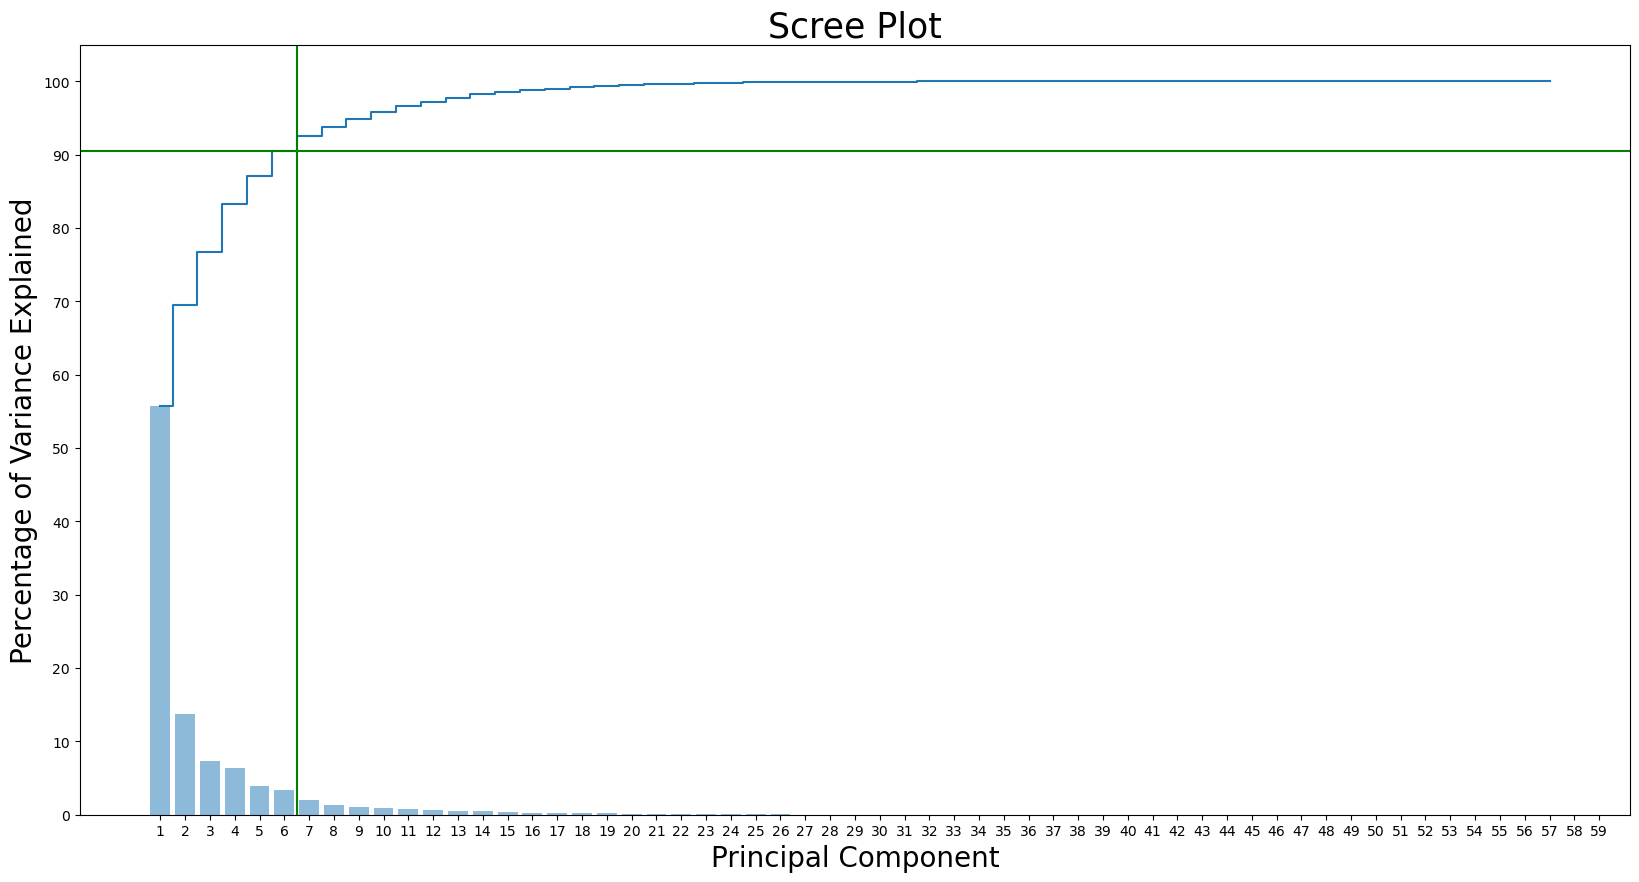

In [673]:
plt.figure(figsize=(20, 10))
plt.bar(range(1, len(expvar) + 1), expvar*100, alpha=0.5, align='center', label='Individual PCs')
plt.step(range(1, len(expvar) + 1), cum_expvar*100, where='mid', linestyle='-', label='Cumulative')
plt.yticks(np.arange(0,101,10))
plt.xticks(np.arange(1,60,1))
plt.axvline(x=6.5,color='g')
plt.axhline(y=90.47,color='g')
plt.xlabel('Principal Component',fontsize=20)
plt.ylabel('Percentage of Variance Explained',fontsize=20)
plt.title('Scree Plot',fontsize=25);

### Part 2 - PCA: Compare PCs with Actual Columns and identify which is explaining most variance. Write inferences about all the Principal components in terms of actual variables.

In [798]:
pca=PCA(n_components=6,random_state=100)
census_pca=pca.fit_transform(census_num_scaled)

In [799]:
census_pca.transpose().round(2)

array([[-4.62, -4.77, -5.96, ..., -6.29, -6.22, -5.9 ],
       [ 0.14, -0.11, -0.29, ..., -0.64, -0.67, -0.94],
       [ 0.33,  0.24,  0.37, ...,  0.11,  0.27,  0.35],
       [ 1.54,  1.96,  0.62, ...,  1.37,  1.14,  1.11],
       [ 0.35, -0.15,  0.48, ...,  0.15,  0.06,  0.15],
       [-0.42,  0.42,  0.28, ...,  0.14, -0.12, -0.15]])

In [800]:
census_pca.shape

(640, 6)

In [801]:
#Eigen vectors
pca.components_.round(2)

array([[ 0.16,  0.17,  0.17,  0.16,  0.16,  0.15,  0.15,  0.03,  0.03,
         0.16,  0.15,  0.16,  0.17,  0.16,  0.15,  0.15,  0.12,  0.1 ,
         0.07,  0.11,  0.07,  0.13,  0.08,  0.12,  0.11,  0.16,  0.16,
         0.08,  0.05,  0.13,  0.11,  0.14,  0.13,  0.16,  0.15,  0.16,
         0.16,  0.17,  0.16,  0.09,  0.05,  0.13,  0.11,  0.14,  0.12,
         0.15,  0.15,  0.15,  0.14,  0.05,  0.04,  0.12,  0.12,  0.14,
         0.13,  0.15,  0.13],
       [-0.13, -0.09, -0.1 , -0.02, -0.02, -0.05, -0.05,  0.03,  0.03,
        -0.12, -0.15, -0.01, -0.01, -0.13, -0.09, -0.18, -0.15,  0.06,
         0.09, -0.03, -0.06, -0.08, -0.08, -0.21, -0.21,  0.09,  0.13,
         0.27,  0.25,  0.17,  0.14,  0.07,  0.02, -0.09, -0.12, -0.04,
        -0.11,  0.08,  0.1 ,  0.26,  0.24,  0.16,  0.13,  0.06,  0.01,
        -0.09, -0.13,  0.15,  0.18,  0.25,  0.24,  0.19,  0.18,  0.08,
         0.05, -0.07, -0.07],
       [-0.  ,  0.06,  0.04,  0.06,  0.05,  0.  , -0.03, -0.12, -0.14,
         0.08,  0

In [802]:
expvar_val=pca.explained_variance_ #Eigen values
expvar_ratio=pca.explained_variance_ratio_.round(2)

In [803]:
expvar_val

array([31.81356474,  7.86942415,  4.15340812,  3.66879058,  2.20652588,
        1.93827502])

In [804]:
expvar_ratio

array([0.56, 0.14, 0.07, 0.06, 0.04, 0.03])

In [805]:
census_pca_loaded = pd.DataFrame(pca.components_.round(2),columns=list(census_num_scaled),index=['PC1','PC2','PC3','PC4','PC5','PC6'])
census_pca_loaded.shape

(6, 57)

In [806]:
census_pca_loaded

No_HH  TOT_M  TOT_F  M_06  F_06  M_SC  F_SC  M_ST  F_ST  M_LIT  ...  \
PC1   0.16   0.17   0.17  0.16  0.16  0.15  0.15  0.03  0.03   0.16  ...   
PC2  -0.13  -0.09  -0.10 -0.02 -0.02 -0.05 -0.05  0.03  0.03  -0.12  ...   
PC3  -0.00   0.06   0.04  0.06  0.05  0.00 -0.03 -0.12 -0.14   0.08  ...   
PC4  -0.13  -0.02  -0.07  0.01  0.01  0.01 -0.03 -0.22 -0.23  -0.04  ...   
PC5  -0.01  -0.03  -0.01 -0.05 -0.04 -0.17 -0.16  0.43  0.44  -0.01  ...   
PC6   0.00  -0.07  -0.04 -0.16 -0.15 -0.06 -0.04  0.22  0.23  -0.06  ...   

     MARG_CL_0_3_M  MARG_CL_0_3_F  MARG_AL_0_3_M  MARG_AL_0_3_F  \
PC1           0.15           0.14           0.05           0.04   
PC2           0.15           0.18           0.25           0.24   
PC3           0.05           0.02           0.27           0.28   
PC4           0.09          -0.02          -0.10          -0.14   
PC5           0.08           0.13          -0.05          -0.05   
PC6          -0.06          -0.00           0.07           0.08   

     MARG_HH_0_3_M  MARG_HH_0_3_F  MARG_OT_0_3_M  MARG_OT_0_3_F  NON_WORK_M  \
PC1           0.12           0.12           0.14           0.13        0.15   
PC2           0.19           0.18           0.08           0.05       -0.07   
PC3          -0.14          -0.20          -0.02          -0.08        0.11   
PC4           0.13           0.00           0.23           0.21        0.08   
PC5           0.06           0.13          -0.04           0.00        0.16   
PC6          -0.12          -0.11           0.06           0.30       -0.05   

     NON_WORK_F  
PC1        0.13  
PC2       -0.07  
PC3        0.10  
PC4        0.02  
PC5        0.24  
PC6       -0.02  

[6 rows x 57 columns]

In [794]:
from matplotlib.patches import Rectangle

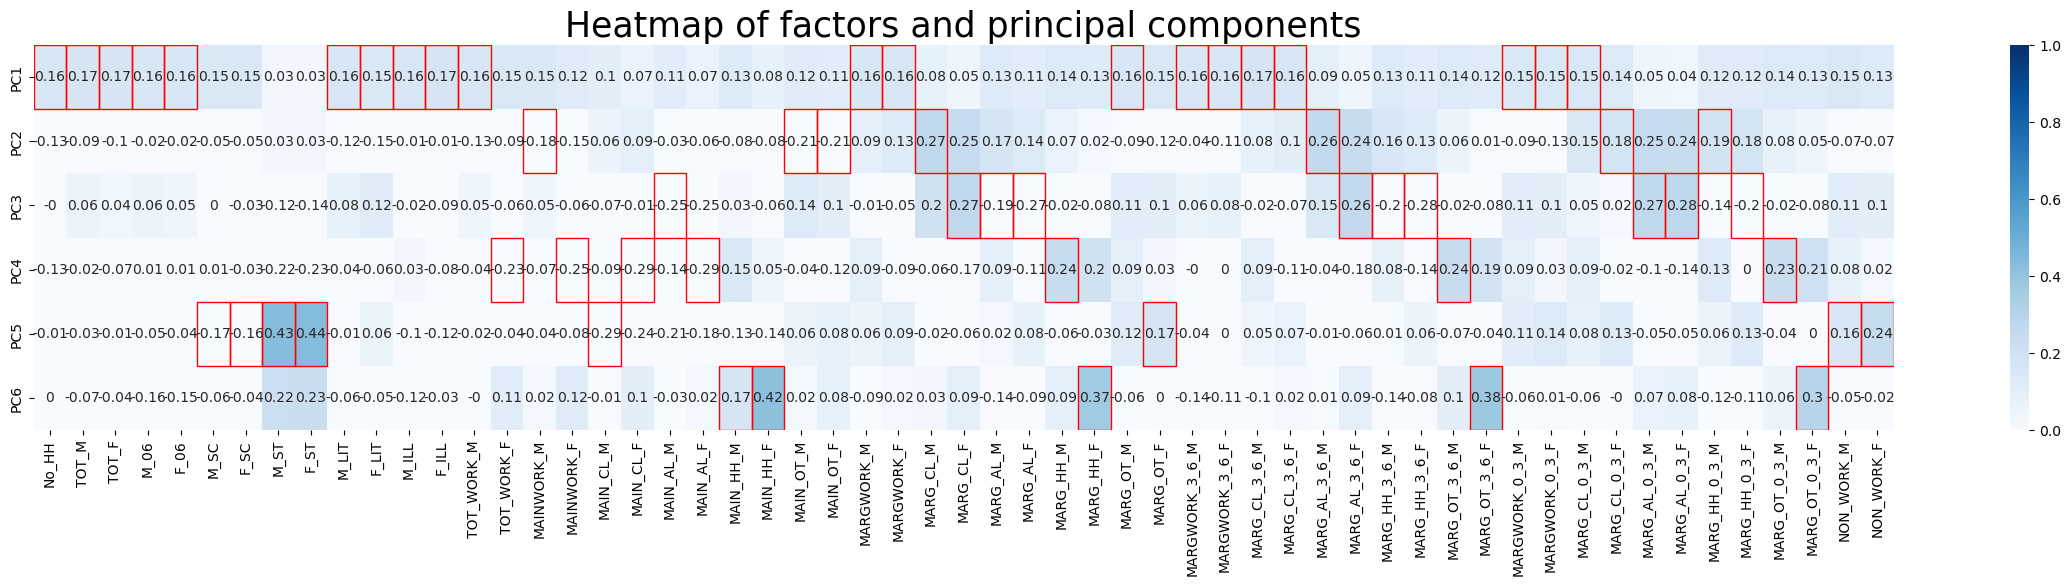

In [795]:
plt.figure(figsize=(30,5))
ax=sns.heatmap(census_pca_loaded, annot=True, fmt='.2g',vmax=1,vmin=0, yticklabels=['PC1','PC2','PC3','PC4','PC5','PC6'],cmap='Blues',facecolor='w')
plt.title('Heatmap of factors and principal components',fontsize=25)
col_max=census_pca_loaded.abs().idxmax(axis=0)
for col, variable in enumerate(census_pca_loaded.columns):
    position = census_pca_loaded.index.get_loc(col_max[variable])
    ax.add_patch(Rectangle((col, position),1,1, fill=False, edgecolor='red', lw=1))

Observations:
- PC1 explains close to 56% of the variance, as gathered from the PCA
- PC1- Mostly contains all aggregate population parameters- like No_HH,Total males and females, total children, Total literates and illiterates etc
- PC2- Contains the aggregate working related parameters- like mainwork males,main_ot males and females, marg_work cultivators and agriculturalists
- PC3- Mostly contains fields related to Agriculture cultivators and lobourers
- PC4- Mostly contains factors involving female workers across different segments
- PC5- Contains minority groups and non-working population
- PC6- Contains household and other workers

In [776]:
census_pca=pd.DataFrame(census_pca.round(2),columns=['Population','Working','Agri_related','Female_workers','Minorities&Not_working','Household_other'])

In [777]:
census_pca

Population  Working  Agri_related  Female_workers  Not_working  \
0         -4.62     0.14          0.33            1.54         0.35   
1         -4.77    -0.11          0.24            1.96        -0.15   
2         -5.96    -0.29          0.37            0.62         0.48   
3         -6.28    -0.50          0.21            1.07         0.30   
4         -4.48     0.89          1.08            0.54         0.80   
..          ...      ...           ...             ...          ...   
635       -6.26    -0.85          0.24            1.17         0.06   
636       -5.77    -0.90          0.17            1.10         0.06   
637       -6.29    -0.64          0.11            1.37         0.15   
638       -6.22    -0.67          0.27            1.14         0.06   
639       -5.90    -0.94          0.35            1.11         0.15   

     Household_other  
0              -0.42  
1               0.42  
2               0.28  
3               0.05  
4               0.34  
..               ...  
635            -0.16  
636            -0.16  
637             0.14  
638            -0.12  
639            -0.15  

[640 rows x 6 columns]

<AxesSubplot:>

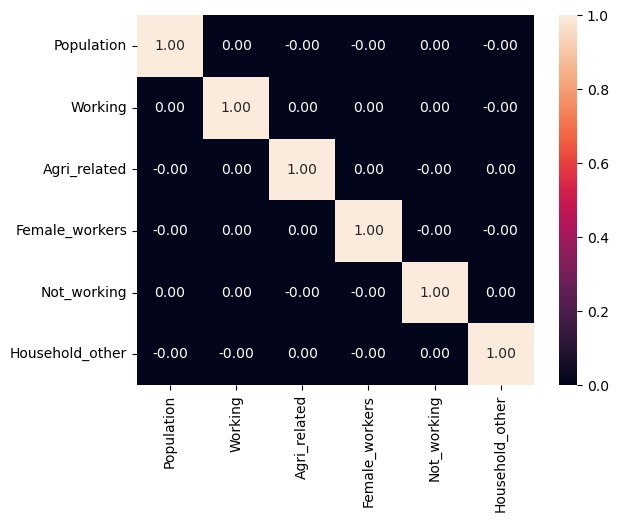

In [778]:
sns.heatmap(census_pca.corr(),annot=True,fmt='.2f')

In [779]:
df_cat=census[['State Code','Dist.Code','State','Area Name']]

In [780]:
census_final=pd.concat([df_cat,census_pca],axis=1)

In [807]:
census_final.head()

State Code  Dist.Code            State    Area Name  Population  Working  \
0           1          1  Jammu & Kashmir      Kupwara       -4.62     0.14   
1           1          2  Jammu & Kashmir       Badgam       -4.77    -0.11   
2           1          3  Jammu & Kashmir  Leh(Ladakh)       -5.96    -0.29   
3           1          4  Jammu & Kashmir       Kargil       -6.28    -0.50   
4           1          5  Jammu & Kashmir        Punch       -4.48     0.89   

   Agri_related  Female_workers  Not_working  Household_other  
0          0.33            1.54         0.35            -0.42  
1          0.24            1.96        -0.15             0.42  
2          0.37            0.62         0.48             0.28  
3          0.21            1.07         0.30             0.05  
4          1.08            0.54         0.80             0.34